In [ ]:
# https://scenedetect.com/projects/Manual/en/latest/api.html
# https://github.com/chickenbestlover/awesome-scene-change-detections
# https://zwolf12.medium.com/video-scene-detection-and-classification-pyscenedetect-places365-and-mozilla-deepspeech-engine-51338e3dbacc

## PySceneDetect

In [ ]:
pip install --upgrade scenedetect[opencv]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.0 MB/s 


In [ ]:
from scenedetect import detect, ContentDetector
scene_list = detect('tvsum1.mp4', ContentDetector())
for i, scene in enumerate(scene_list):
    print('    Scene %2d: Start %s / Frame %d, End %s / Frame %d' % (
        i+1,
        scene[0].get_timecode(), scene[0].get_frames(),
        scene[1].get_timecode(), scene[1].get_frames(),))

    Scene  1: Start 00:00:00.000 / Frame 0, End 00:00:01.101 / Frame 33
    Scene  2: Start 00:00:01.101 / Frame 33, End 00:00:02.135 / Frame 64
    Scene  3: Start 00:00:02.135 / Frame 64, End 00:00:03.403 / Frame 102
    Scene  4: Start 00:00:03.403 / Frame 102, End 00:00:19.786 / Frame 593
    Scene  5: Start 00:00:19.786 / Frame 593, End 00:00:22.890 / Frame 686
    Scene  6: Start 00:00:22.890 / Frame 686, End 00:00:41.041 / Frame 1230
    Scene  7: Start 00:00:41.041 / Frame 1230, End 00:00:56.490 / Frame 1693
    Scene  8: Start 00:00:56.490 / Frame 1693, End 00:00:57.658 / Frame 1728
    Scene  9: Start 00:00:57.658 / Frame 1728, End 00:00:58.692 / Frame 1759
    Scene 10: Start 00:00:58.692 / Frame 1759, End 00:01:13.907 / Frame 2215
    Scene 11: Start 00:01:13.907 / Frame 2215, End 00:01:29.790 / Frame 2691
    Scene 12: Start 00:01:29.790 / Frame 2691, End 00:02:00.120 / Frame 3600
    Scene 13: Start 00:02:00.120 / Frame 3600, End 00:02:20.607 / Frame 4214
    Scene 14: St

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs


from google.colab import files
from statistics import mode, mean
from matplotlib.pyplot import figure

import scipy.cluster.hierarchy as sch
from scipy import stats as s

import random
import pandas as pd 
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [ ]:
from scenedetect import detect, ContentDetector,AdaptiveDetector
scene_list = detect('tvsum1.mp4', ContentDetector(threshold = 17.3))

In [ ]:
scene_list

In [ ]:
import os

from scenedetect import open_video, ContentDetector, SceneManager, StatsManager

def find_scenes(video_path):
    # type: (str) -> List[Tuple[FrameTimecode, FrameTimecode]]

    video_stream = open_video(video_path)
    stats_manager = StatsManager()
    # Construct our SceneManager and pass it our StatsManager.
    scene_manager = SceneManager(stats_manager)

    # Add ContentDetector algorithm (each detector's constructor
    # takes various options, e.g. threshold).
    scene_manager.add_detector(ContentDetector(threshold=17.3))

    # Save calculated metrics for each frame to {VIDEO_PATH}.stats.csv.
    stats_file_path = '%s.stats.csv' % video_path

    # Perform scene detection.
    scene_manager.detect_scenes(video=video_stream)
    scene_list = scene_manager.get_scene_list()
    for i, scene in enumerate(scene_list):
        print(
            'Scene %2d: Start %s / Frame %d, End %s / Frame %d' % (
            i+1,
            scene[0].get_timecode(), scene[0].get_frames(),
            scene[1].get_timecode(), scene[1].get_frames(),))

    # Store the frame metrics we calculated for the next time the program runs.
    stats_manager.save_to_csv(csv_file=stats_file_path)

    return scene_list

In [ ]:
find_scenes('tvsum1.mp4')

Scene  1: Start 00:00:00.000 / Frame 0, End 00:00:01.101 / Frame 33
Scene  2: Start 00:00:01.101 / Frame 33, End 00:00:02.135 / Frame 64
Scene  3: Start 00:00:02.135 / Frame 64, End 00:00:03.403 / Frame 102
Scene  4: Start 00:00:03.403 / Frame 102, End 00:00:19.786 / Frame 593
Scene  5: Start 00:00:19.786 / Frame 593, End 00:00:22.890 / Frame 686
Scene  6: Start 00:00:22.890 / Frame 686, End 00:00:41.041 / Frame 1230
Scene  7: Start 00:00:41.041 / Frame 1230, End 00:00:56.490 / Frame 1693
Scene  8: Start 00:00:56.490 / Frame 1693, End 00:00:57.658 / Frame 1728
Scene  9: Start 00:00:57.658 / Frame 1728, End 00:00:58.692 / Frame 1759
Scene 10: Start 00:00:58.692 / Frame 1759, End 00:01:13.907 / Frame 2215
Scene 11: Start 00:01:13.907 / Frame 2215, End 00:01:22.082 / Frame 2460
Scene 12: Start 00:01:22.082 / Frame 2460, End 00:01:22.582 / Frame 2475
Scene 13: Start 00:01:22.582 / Frame 2475, End 00:01:23.083 / Frame 2490
Scene 14: Start 00:01:23.083 / Frame 2490, End 00:01:23.884 / Frame 

[(00:00:00.000 [frame=0, fps=29.970], 00:00:01.101 [frame=33, fps=29.970]),
 (00:00:01.101 [frame=33, fps=29.970], 00:00:02.135 [frame=64, fps=29.970]),
 (00:00:02.135 [frame=64, fps=29.970], 00:00:03.403 [frame=102, fps=29.970]),
 (00:00:03.403 [frame=102, fps=29.970], 00:00:19.786 [frame=593, fps=29.970]),
 (00:00:19.786 [frame=593, fps=29.970], 00:00:22.890 [frame=686, fps=29.970]),
 (00:00:22.890 [frame=686, fps=29.970], 00:00:41.041 [frame=1230, fps=29.970]),
 (00:00:41.041 [frame=1230, fps=29.970],
  00:00:56.490 [frame=1693, fps=29.970]),
 (00:00:56.490 [frame=1693, fps=29.970],
  00:00:57.658 [frame=1728, fps=29.970]),
 (00:00:57.658 [frame=1728, fps=29.970],
  00:00:58.692 [frame=1759, fps=29.970]),
 (00:00:58.692 [frame=1759, fps=29.970],
  00:01:13.907 [frame=2215, fps=29.970]),
 (00:01:13.907 [frame=2215, fps=29.970],
  00:01:22.082 [frame=2460, fps=29.970]),
 (00:01:22.082 [frame=2460, fps=29.970],
  00:01:22.582 [frame=2475, fps=29.970]),
 (00:01:22.582 [frame=2475, fps=2

In [ ]:
df=pd.read_csv('tvsum1.mp4.stats.csv', header=None)

In [ ]:
df

0             1                      2  \
0      Frame Number      Timecode            content_val   
1                 2  00:00:00.033      3.538148148148148   
2                 3  00:00:00.067      4.226954732510288   
3                 4  00:00:00.100     1.4358641975308641   
4                 5  00:00:00.133     3.1632373113854597   
...             ...           ...                    ...   
10592         10593  00:05:53.420    0.02535665294924554   
10593         10594  00:05:53.453  0.0035733882030178333   
10594         10595  00:05:53.486     7.8768998628257885   
10595         10596  00:05:53.520   0.041117969821673525   
10596         10597  00:05:53.553   0.012030178326474622   

                           3                     4                      5  
0                  delta_hue             delta_lum              delta_sat  
1         3.4318312757201648    3.5507818930041153     3.6318312757201645  
2          4.647510288065844    3.8576748971193418      4.175679012345679  
3         1.4195267489711934    1.2743621399176954     1.6137037037037036  
4          3.576358024691358    2.7372427983539094      3.176111111111111  
...                      ...                   ...                    ...  
10592    0.01286008230452675  0.026584362139917696    0.03662551440329218  
10593  0.0013168724279835392  0.004855967078189301  0.0045473251028806585  
10594      3.966934156378601    13.999012345679013      5.664753086419753  
10595    0.01493827160493827   0.05547325102880658    0.05294238683127572  
10596  0.0012962962962962963  0.023868312757201648   0.010925925925925926  

[10597 rows x 6 columns]

In [ ]:
df1 = df.drop(labels=0, axis=0)

In [ ]:
df1.columns = ['frame_number', 'timecode', 'content_val', 'delta_hue','delta_lum','delta-sat']

In [ ]:
x = df1['frame_number']
y = df1['content_val']

In [ ]:
x = list(x)
y = list(y)

In [ ]:
for i in range(len(y)):
  y[i] = float(y[i])
  

In [ ]:
!gdown --id 1hWy9xeGKWFcg_PiWo7fhrTsh_e0N452i #eccv16_dataset_tvsum_google_pool5.h5
import h5py
tvsum_h5 = h5py.File('eccv16_dataset_tvsum_google_pool5.h5', 'r')
change_points = []
gt_score = []
for i in range(1,51):
  change_points.append(list(tvsum_h5["video_"+str(i)]['change_points'][:])) #getting the change points from the h5 file
  gt_score.append(list(tvsum_h5["video_"+str(i)]['gtscore'][:])) #GT scores from the h5 file

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hWy9xeGKWFcg_PiWo7fhrTsh_e0N452i
To: /content/eccv16_dataset_tvsum_google_pool5.h5
100% 125M/125M [00:01<00:00, 91.5MB/s]


In [ ]:
z = change_points[0]

In [ ]:
scene_list

[(00:00:00.000 [frame=0, fps=29.970], 00:00:01.101 [frame=33, fps=29.970]),
 (00:00:01.101 [frame=33, fps=29.970], 00:00:02.135 [frame=64, fps=29.970]),
 (00:00:02.135 [frame=64, fps=29.970], 00:00:03.403 [frame=102, fps=29.970]),
 (00:00:03.403 [frame=102, fps=29.970], 00:00:19.786 [frame=593, fps=29.970]),
 (00:00:19.786 [frame=593, fps=29.970], 00:00:22.890 [frame=686, fps=29.970]),
 (00:00:22.890 [frame=686, fps=29.970], 00:00:41.041 [frame=1230, fps=29.970]),
 (00:00:41.041 [frame=1230, fps=29.970],
  00:00:56.490 [frame=1693, fps=29.970]),
 (00:00:56.490 [frame=1693, fps=29.970],
  00:00:57.658 [frame=1728, fps=29.970]),
 (00:00:57.658 [frame=1728, fps=29.970],
  00:00:58.692 [frame=1759, fps=29.970]),
 (00:00:58.692 [frame=1759, fps=29.970],
  00:01:13.907 [frame=2215, fps=29.970]),
 (00:01:13.907 [frame=2215, fps=29.970],
  00:01:22.082 [frame=2460, fps=29.970]),
 (00:01:22.082 [frame=2460, fps=29.970],
  00:01:22.582 [frame=2475, fps=29.970]),
 (00:01:22.582 [frame=2475, fps=2

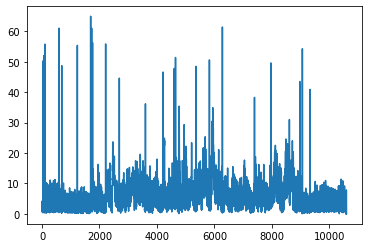

In [ ]:
plt.plot(y)

In [ ]:
sum, count = 0,0
for i in range(len(y)):
  if y[i] == z[i]:
    count += 1
  else:
    sum = (y[i]-z[i])**2
  

ValueError: ignored

In [ ]:
len(y)

10596

In [ ]:
len(z)

71

## Color histogram

In [ ]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

In [ ]:
import cv2

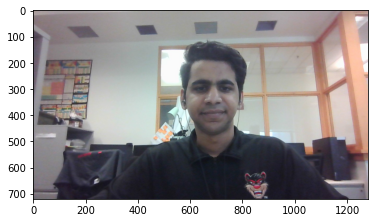

In [ ]:
image = skimage.io.imread(fname="WIN_20220531_12_41_50_Pro.jpg")

# display the image
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

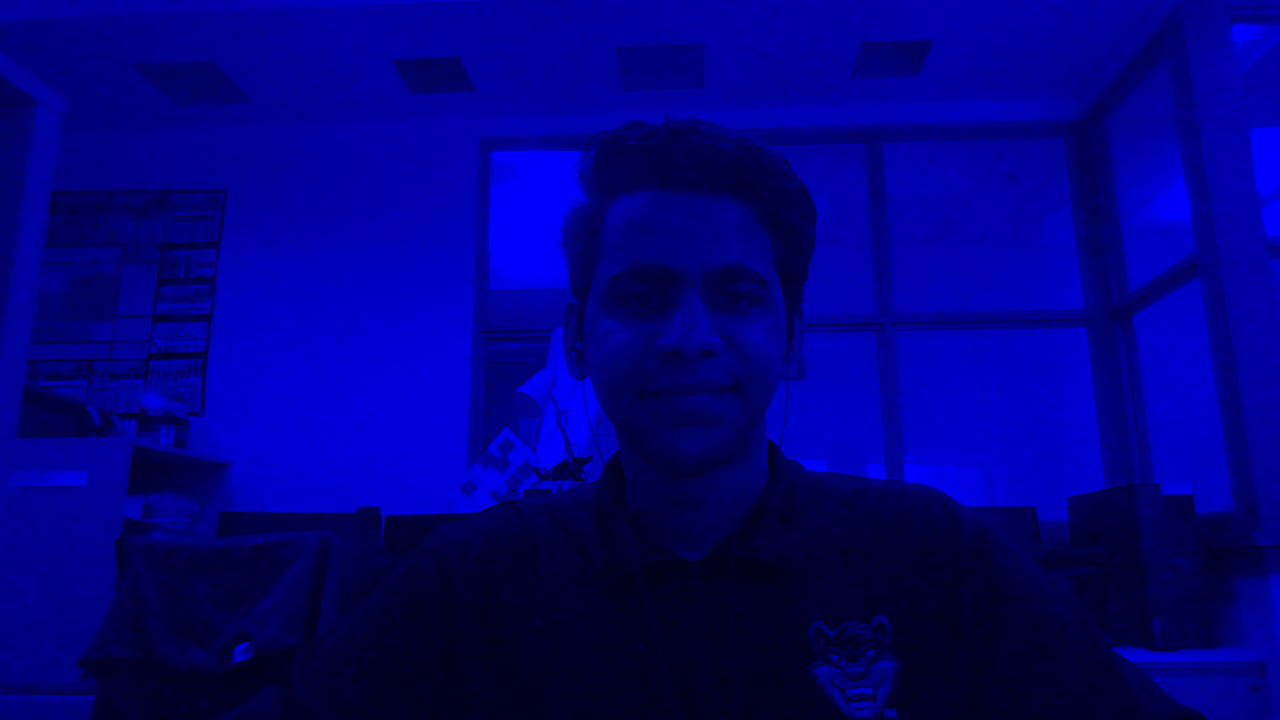

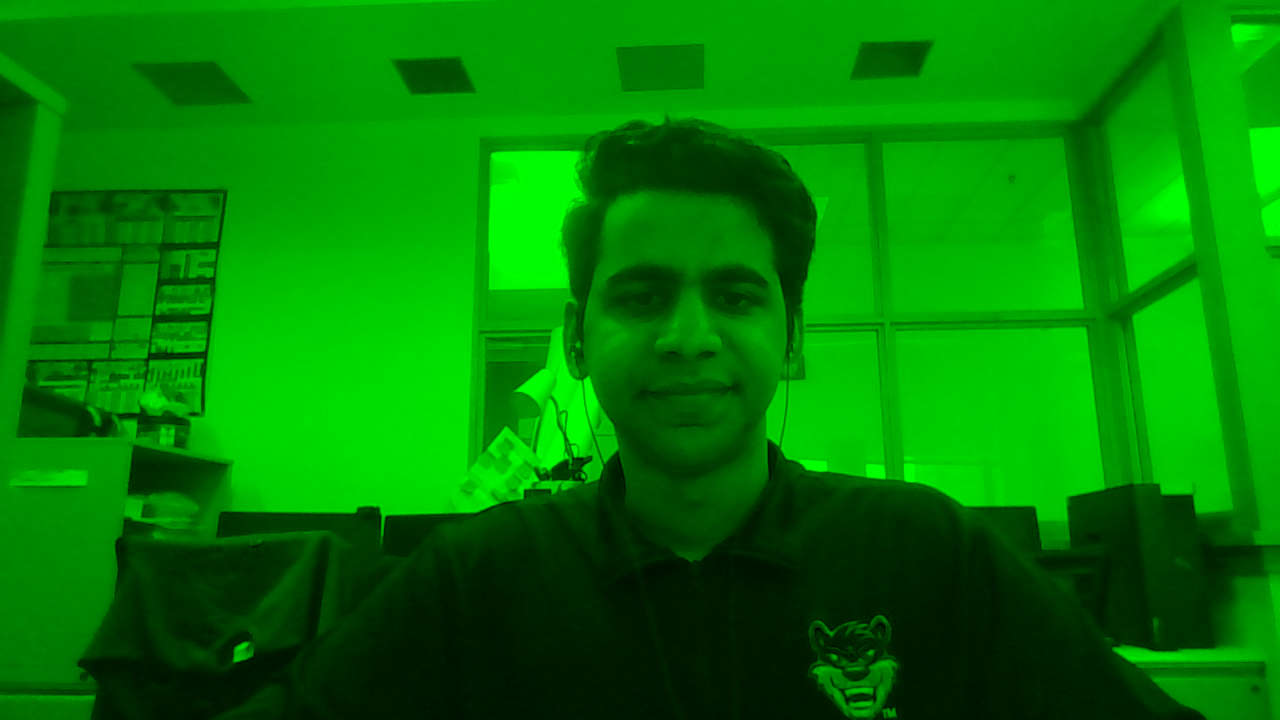

KeyboardInterrupt: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('WIN_20220531_12_41_50_Pro.jpg')

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# RGB - Blue
cv2_imshow(b)

# RGB - Green
cv2_imshow(g)

# RGB - Red
cv2_imshow(r)

cv2.waitKey(0)

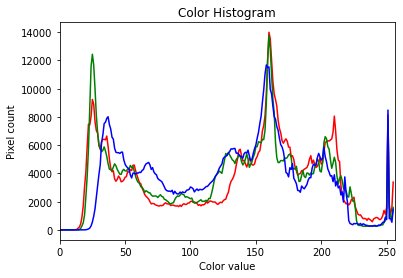

In [ ]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram1, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram1, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

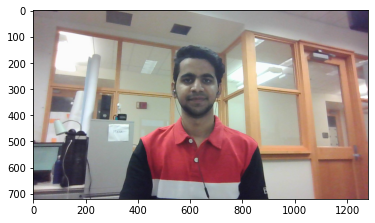

In [ ]:
image1 = skimage.io.imread(fname="WIN_20220725_09_21_20_Pro.jpg")

# display the image
fig, ax = plt.subplots()
plt.imshow(image1)
plt.show()

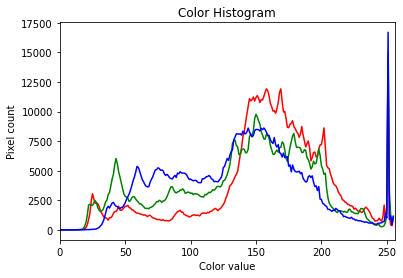

In [ ]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram2, bin_edges = np.histogram(
        image1[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram2, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

In [ ]:
residue = histogram1 - histogram2

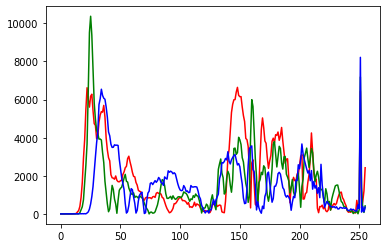

In [ ]:
total = []
for channel_id, c in zip(channel_ids, colors):
    histogram2, bin_edges = np.histogram(image1[:, :, channel_id], bins=256, range=(0, 256))
    histogram1, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
    residue = abs(histogram1 - histogram2)
    total.append(residue)
    plt.plot(bin_edges[0:-1], residue, color=c)

In [ ]:

for i in total:
  distance = 0
  for j in i:
    distance += j
  print(distance)
  

471536
399630
373032


## Final

In [ ]:
!gdown --id 1hWy9xeGKWFcg_PiWo7fhrTsh_e0N452i #eccv16_dataset_tvsum_google_pool5.h5
import h5py
tvsum_h5 = h5py.File('eccv16_dataset_tvsum_google_pool5.h5', 'r')
change_points = []
for i in range(1,51):
  change_points.append(list(tvsum_h5["video_"+str(i)]['change_points'][:])) #getting the change points from the h5 file

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hWy9xeGKWFcg_PiWo7fhrTsh_e0N452i
To: /content/eccv16_dataset_tvsum_google_pool5.h5
100% 125M/125M [00:01<00:00, 124MB/s] 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
different distance functions to compare histograms in cv2
1. Correlation ( CV_COMP_CORREL ) - 0
2. Chi-Square ( CV_COMP_CHISQR ) - 1
3. Intersection ( method=CV_COMP_INTERSECT ) - 2
4. Bhattacharyya distance ( CV_COMP_BHATTACHARYYA ) - 3

might have to change threshold value and symbol in detect_shtos based on the distance function
'''

In [ ]:
def get_distance(x,y):
  distance = 0
  for i in range(len(x)):
    for j in range(len(x[i])):
      distance += abs(int(x[i][j] - y[i][j]))
  return distance

In [ ]:
def detect_shots(metric_vals, threshold = .5):
  change_points = []
  for i in range(len(metric_vals)):
    if metric_vals[i] > threshold:
        change_points.append(i)
  return change_points

In [ ]:
def get_histogram_1(image):
  
  # define colors to plot the histograms
  colors = ('b','g','r')
  histogram = []
  # compute and plot the image histograms
  for i,color in enumerate(colors):
      hist = cv2.calcHist([image],[i],None,[256],[0,256])
      histogram.append(hist)

  return histogram

In [ ]:
def create_segments(change_points):
  segments = []
  segments.append([0,change_points[0]])
  for i in range(len(change_points)-1):
    segments.append([change_points[i]+1,change_points[i+1]])
  return segments

In [ ]:
def final(video_file, threshold = 0.2, frame_rate = 30):
  cap = cv2.VideoCapture(video_file) # read the video file
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) #  get the total number of frames in the video
  temp = []
  metric_vals = []
  for fno in range(0, total_frames, frame_rate): # iterate through frames in the video
    cap.set(cv2.CAP_PROP_POS_FRAMES, fno)
    x, image = cap.read() # reading the particular frame
    hist = get_histogram_1(image) # get the color histogram for the particular frame
    temp.append(hist)
    if len(temp) == 2:
        metric_val = get_distance(temp[0],temp[1]) # compare color histogram of consecutive frames
        metric_vals.append(metric_val) # add it to a final list 
        temp.pop(0) 
  metric_vals = [float(i)/max(metric_vals) for i in metric_vals]
  plt.plot(metric_vals) #plotting the data 
  plt.axhline (y = threshold, xmin =0, xmax = total_frames/frame_rate, color='red', label= "Threshold")
  plt.legend()
  plt.xlabel("frames")
  plt.ylabel("distance score")
  plt.title("changes between consecutive frames for video 1")
  plt.show() 
  change_points = detect_shots(metric_vals, threshold) # create a new shot when the difference is more than the threshold
  # might have to change the symbol in the detect_shots function based on the distance function 
  segments = create_segments(change_points) # create a nested list with all shots
  return metric_vals,segments

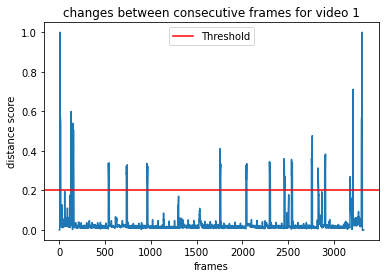

In [ ]:
metric_vals,segments0 = final('tvsum5.mp4',frame_rate = 1)

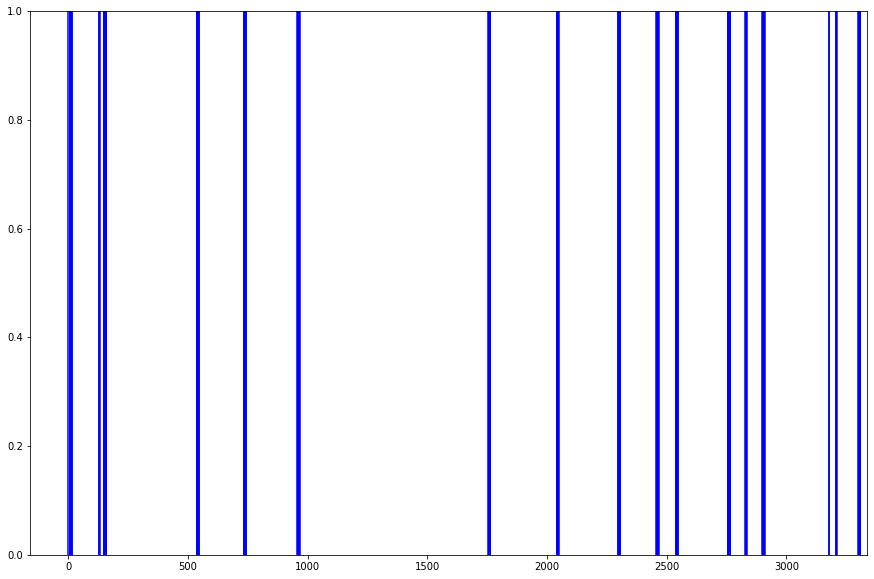

In [ ]:
for i in segments0:
  plt.rcParams["figure.figsize"] = (15,10)
  plt.axvline(x = i[0], color = 'b', label = 'axvline - full height')
plt.show()

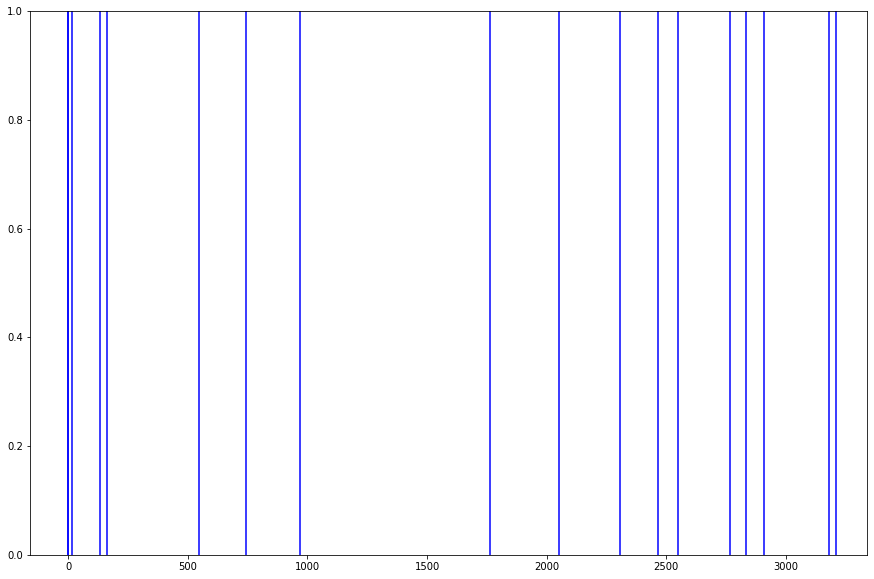

In [ ]:
for i in clean_segments:
  plt.rcParams["figure.figsize"] = (15,10)
  plt.axvline(x = i[0], color = 'b', label = 'axvline - full height')
plt.show()

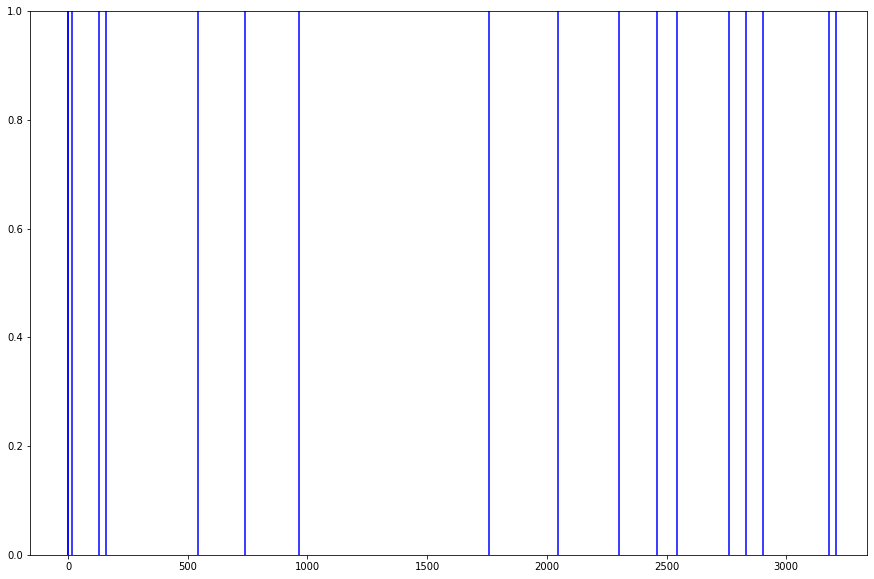

In [ ]:
for i in updated_change_points:
  plt.rcParams["figure.figsize"] = (15,10)
  plt.axvline(x = i[0], color = 'b', label = 'axvline - full height')
plt.show()

## Clean Segments

In [ ]:
def clean_segments_1(my_change, h5_change):
  z =[]
  for i in my_change:
    for j in i:
      z.append(j)
  i = 0
  while i < len(z)-1:
      if z[i+1] - z[i] <= 1:
        del z[i]
      else:
          i = i+1
  clean_segments = create_segments(z)
  return clean_segments

In [ ]:
clean_segments = clean_segments_1(segments0, change_points[4])

In [ ]:
def clean_segments_2(my_change, h5_change):
  updated_change_points = []
  for i in my_change:
    mini = 0
    temp = []
    for j in h5_change:
      temp.append(abs(i[0] - j[0]))
    mini = min(temp)
    index = temp.index(mini)
    if mini < 15:
      updated_change_points.append(h5_change[index])
    else:
      updated_change_points.append(i)
  return updated_change_points

In [ ]:
updated_change_points = clean_segments_2(clean_segments, change_points[4])

In [ ]:
def plot_change_points(change_points, c = 'b', l = None):
  plt.rcParams["figure.figsize"] = (15,10)
  for i in change_points:
    plt.axvline(x = i[0], color = c, label = l)
  plt.show()

## Evalutating results

In [ ]:
h5_change = change_points[4]

In [ ]:
def pre_perf_measure(my_change, h5_change, frame_rate = 1):

  y =[]
  for i in h5_change:
    for j in i:
      y.append(j)
  z =[]
  for i in my_change:
    for j in i:
      z.append(j)

  predicted = []
  original = []
  for i in range(y[-1]+1):
    if i in z:
      predicted.append(1)
    else:
      predicted.append(0)
    if i in y:
      original.append(1)
    else:
      original.append(0)

  return original, predicted

In [ ]:
original_1, predicted_1 = pre_perf_measure(segments0, h5_change )

In [ ]:
original_2, predicted_2 = pre_perf_measure(clean_segments, h5_change )

In [ ]:
original_3, predicted_3 = pre_perf_measure(updated_change_points, h5_change )

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
TP1, FP1, TN1, FN1 = perf_measure(original_1,predicted_1)

In [ ]:
TP2, FP2, TN2, FN2 = perf_measure(original_2,predicted_2)

In [ ]:
TP3, FP3, TN3, FN3 = perf_measure(original_3,predicted_3)

In [ ]:
def perf_coeff(tup):
  TP,FP,TN,FN = tup
  precision = TP/(TP + FP)
  recall = TP/(TP + FN)
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  F1 = 2*(precision*recall)/(precision+recall)

  return precision, recall, accuracy, F1

In [ ]:
perf_coeff((TP1, FP1, TN1, FN1))

(0.1927710843373494,
 0.6956521739130435,
 0.9555154794108807,
 0.30188679245283023)

In [ ]:
perf_coeff((TP2, FP2, TN2, FN2))

(0.14285714285714285,
 0.10869565217391304,
 0.9786594529606252,
 0.12345679012345678)

In [ ]:
perf_coeff((TP3, FP3, TN3, FN3))

(0.9411764705882353,
 0.6956521739130435,
 0.9951908626390141,
 0.7999999999999999)

In [ ]:
perf_measure(original, predicted) # frame rate was 10

NameError: ignored

In [ ]:
perf_measure(original, predicted) # frame rate was 1

(7, 34, 3247, 39)

In [ ]:
7/(7+34) - #precision

0.17073170731707318

In [ ]:
7/(7+39) - #recall

0.15217391304347827

In [ ]:
(7+3274)/(7+34+3274+39) #accuracy

0.9782349433512224

In [ ]:
2*(0.17073170731707318*0.15217391304347827)/(0.17073170731707318+0.15217391304347827) #F1 score

0.16091954022988506

In [ ]:
perf_measure(original, predicted) # frame rate was 1 - not cleaned segments

(25, 128, 3153, 21)

In [ ]:
25/(25+128) #precision

0.16339869281045752

In [ ]:
25/(25+21)

0.5434782608695652

In [ ]:
(25+3153)/(25+128+3153+21)

0.955214908325819

In [ ]:
2*(0.16339869281045752*0.5434782608695652)/(0.5434782608695652+0.16339869281045752)

0.2512562814070352

In [ ]:
perf_measure(original, predicted) # using updated cleaning

(32, 2, 3279, 14)

In [ ]:
(32)/(32+2) #precision

0.9411764705882353

In [ ]:
32/(32+14)

0.6956521739130435

In [ ]:
(32+3279)/(32+2+3279+14)

0.9951908626390141

## To get all videos

Video -  1


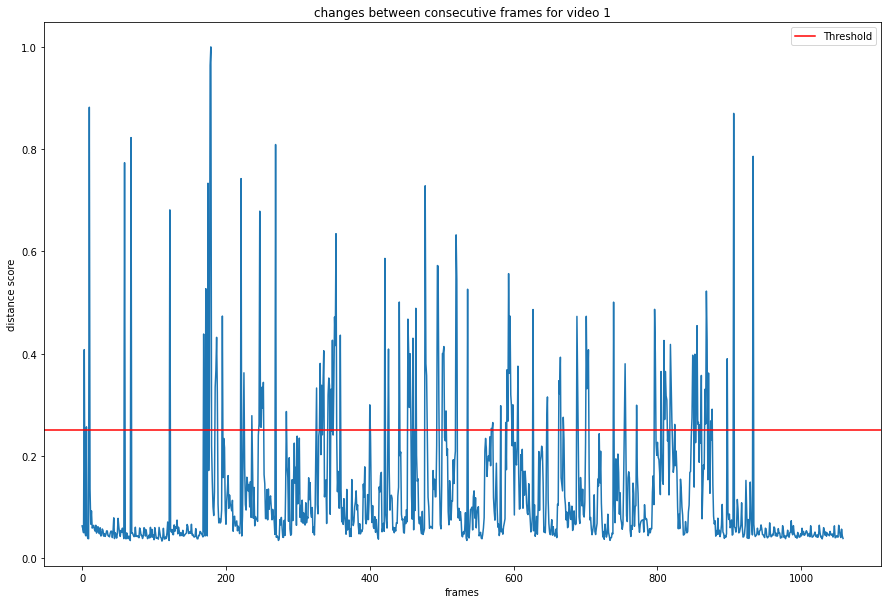

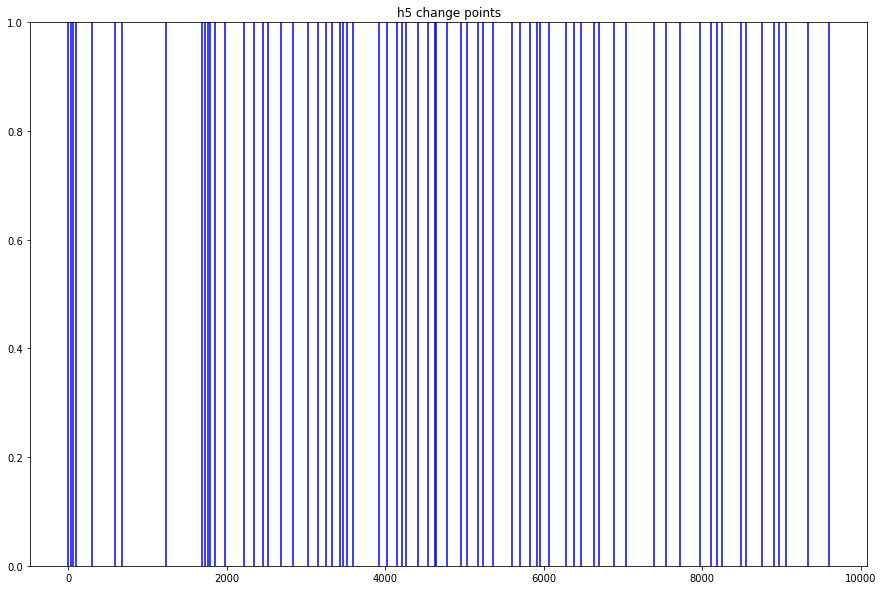

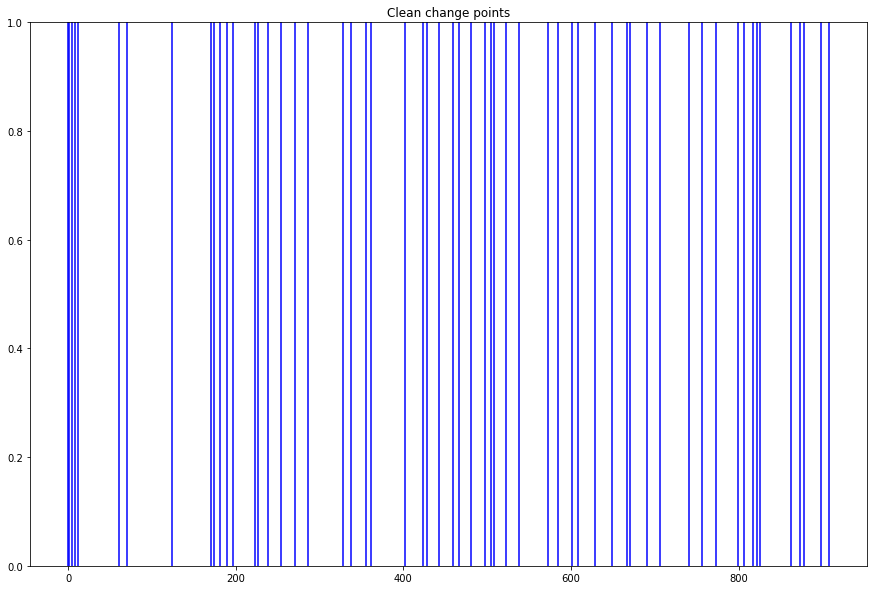

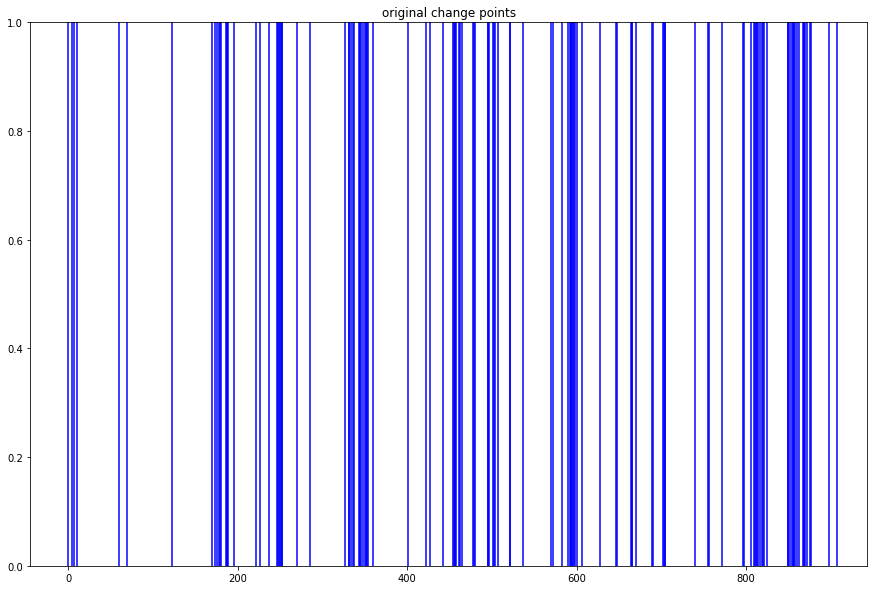

Video -  2


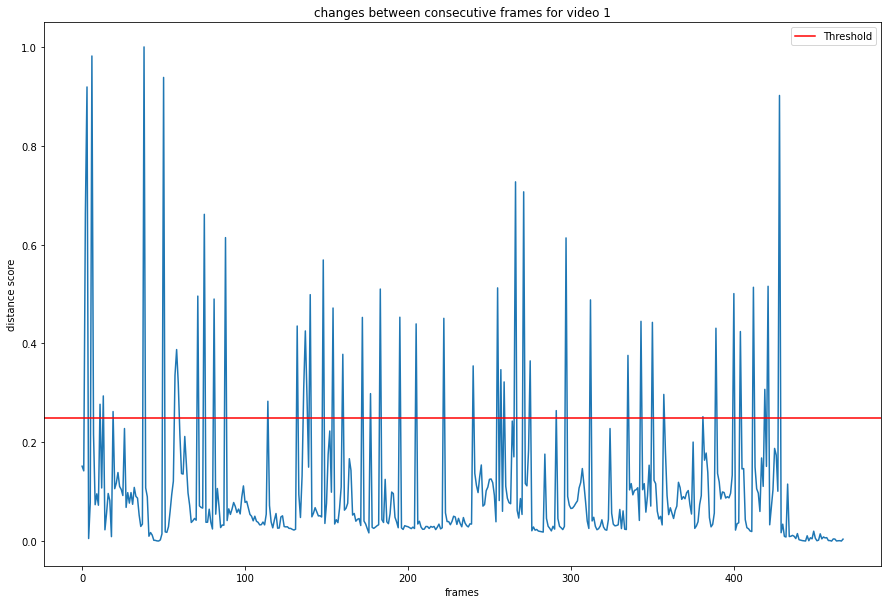

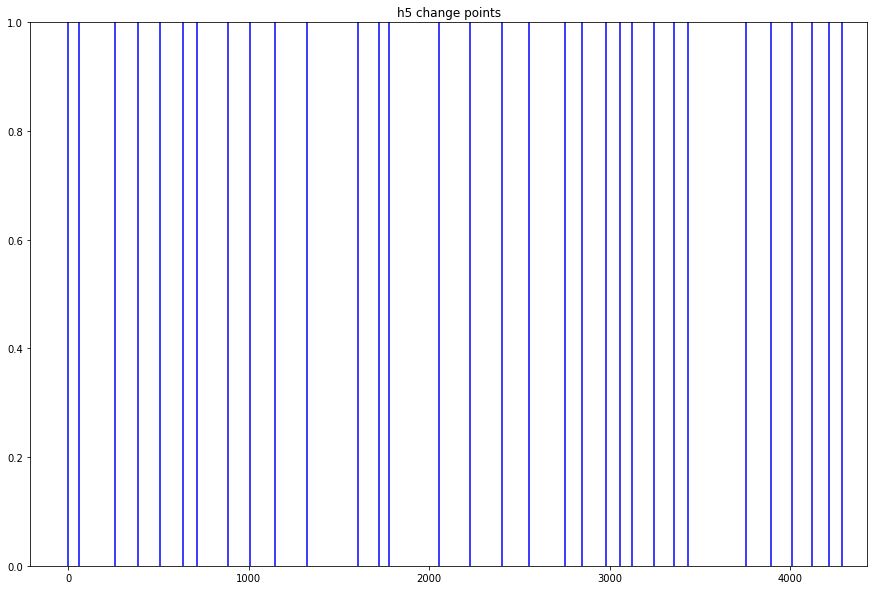

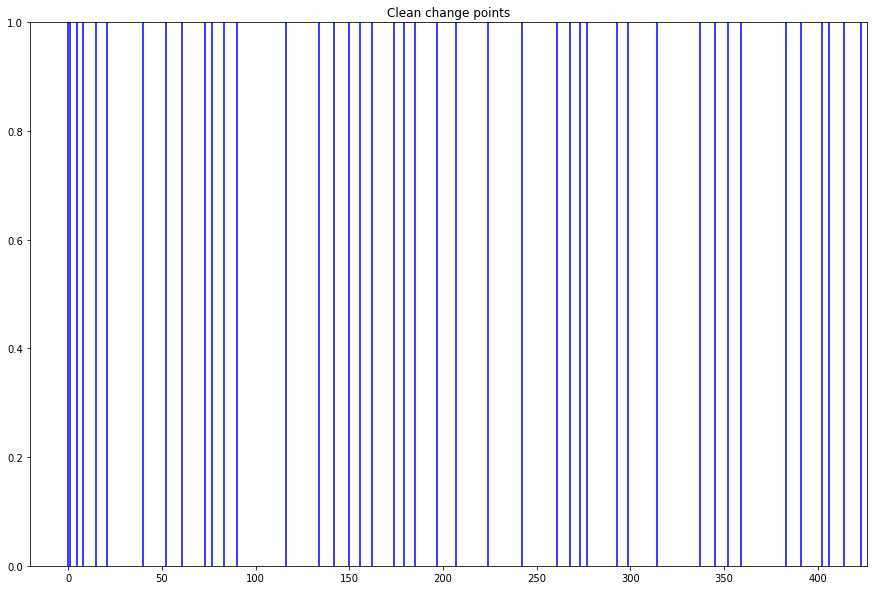

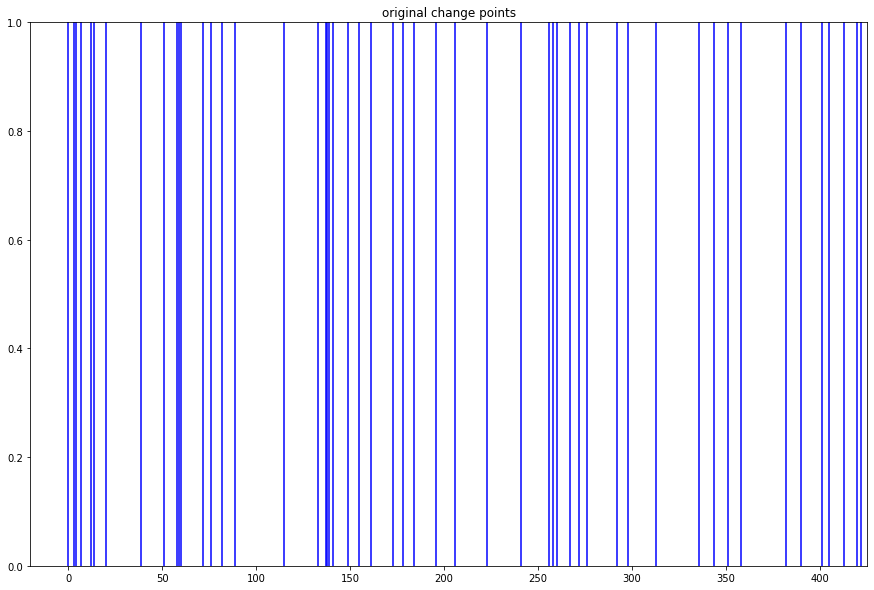

Video -  3


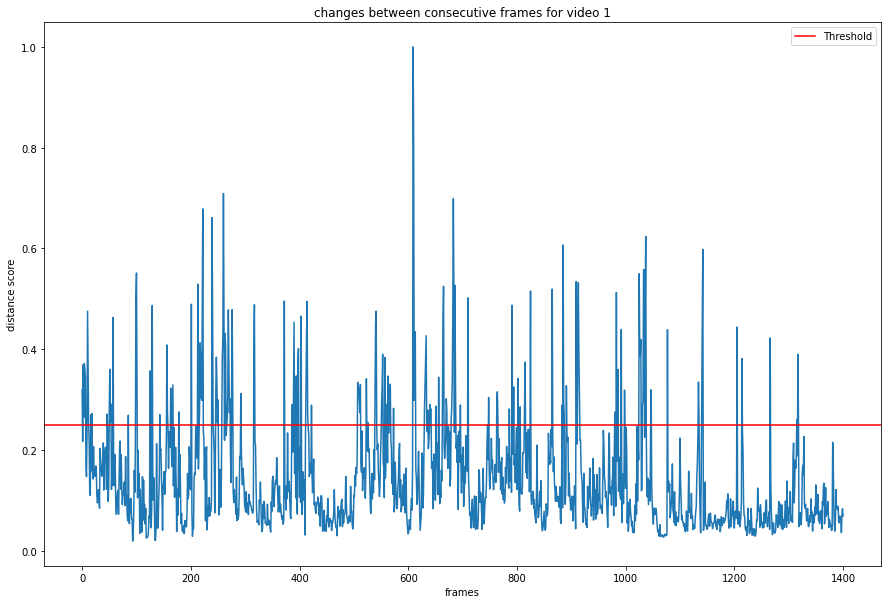

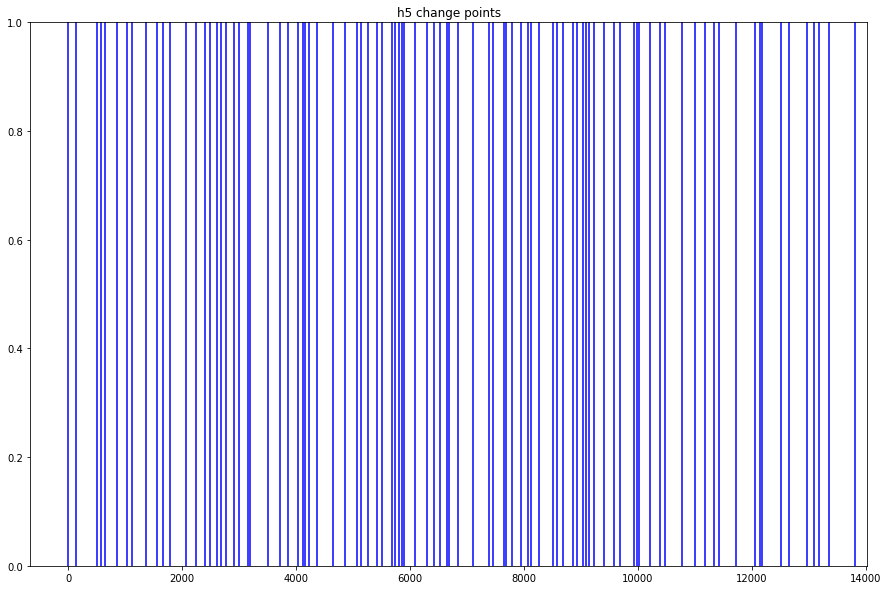

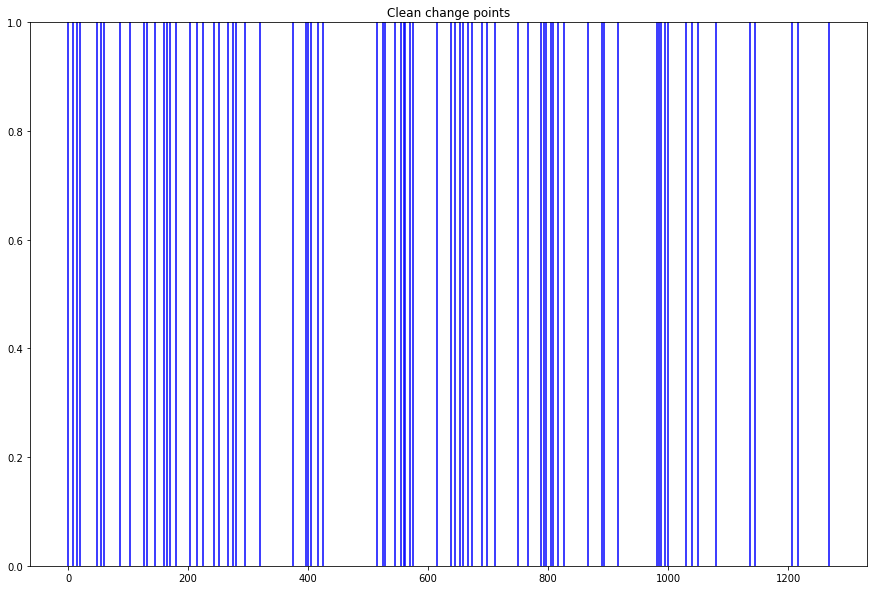

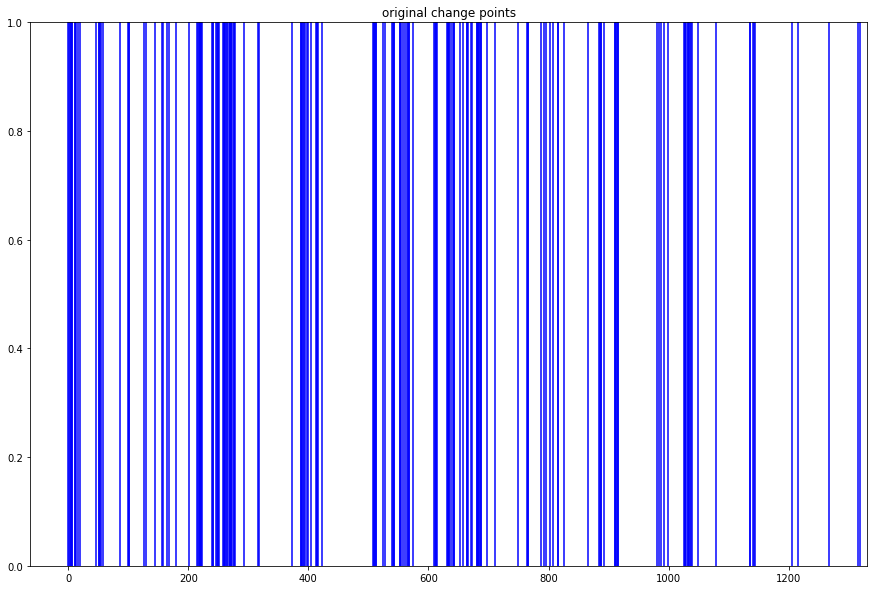

Video -  4


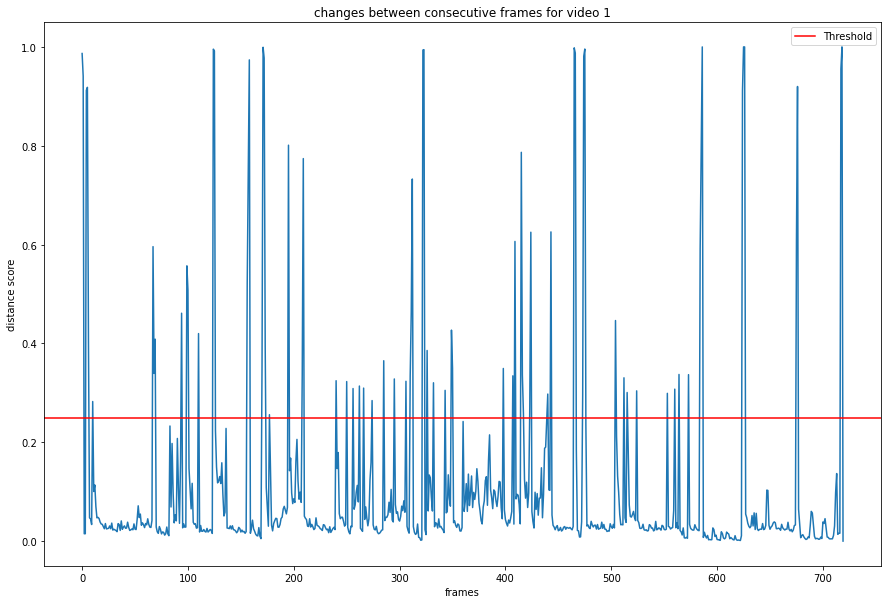

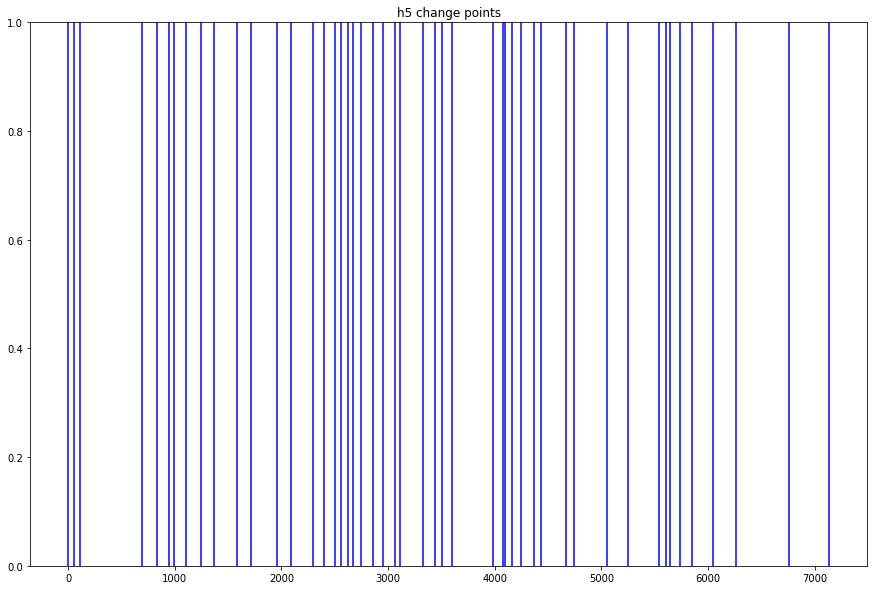

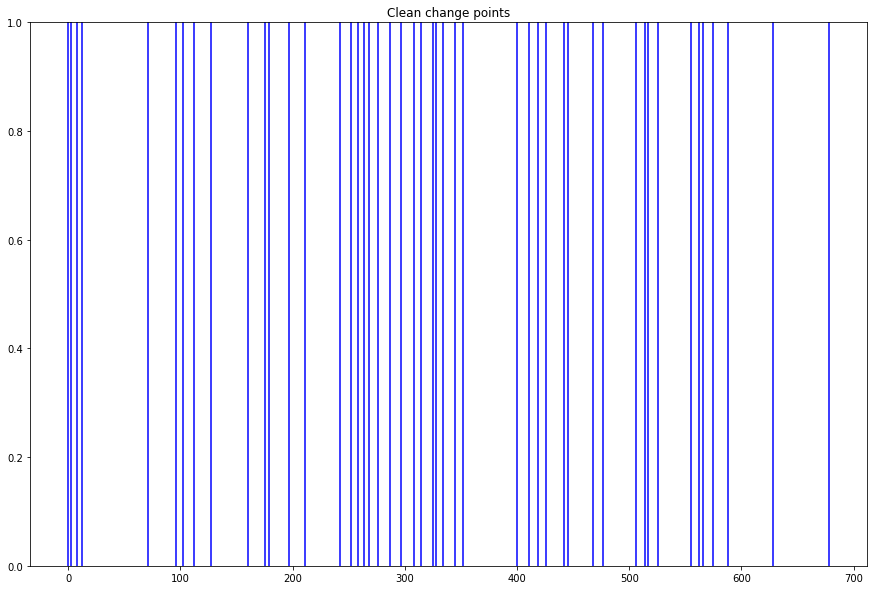

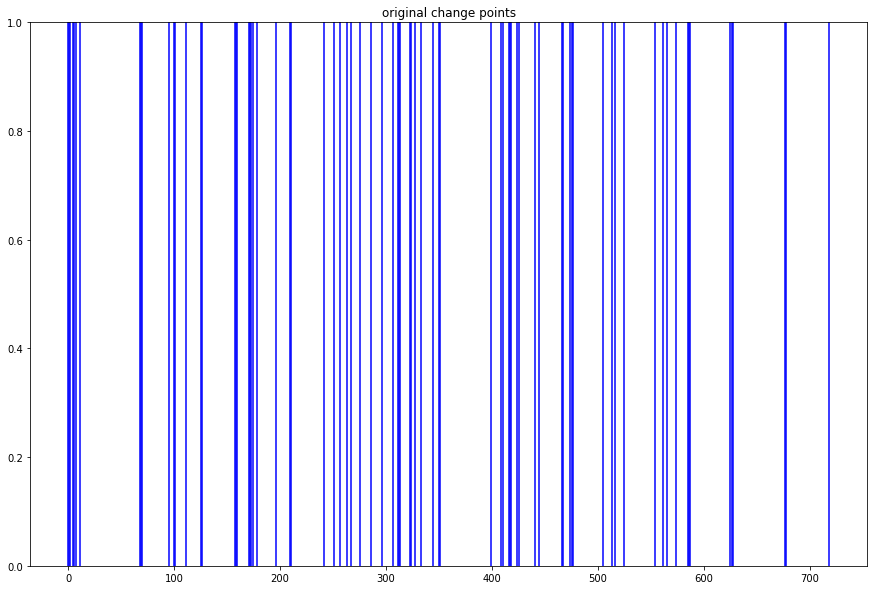

Video -  5


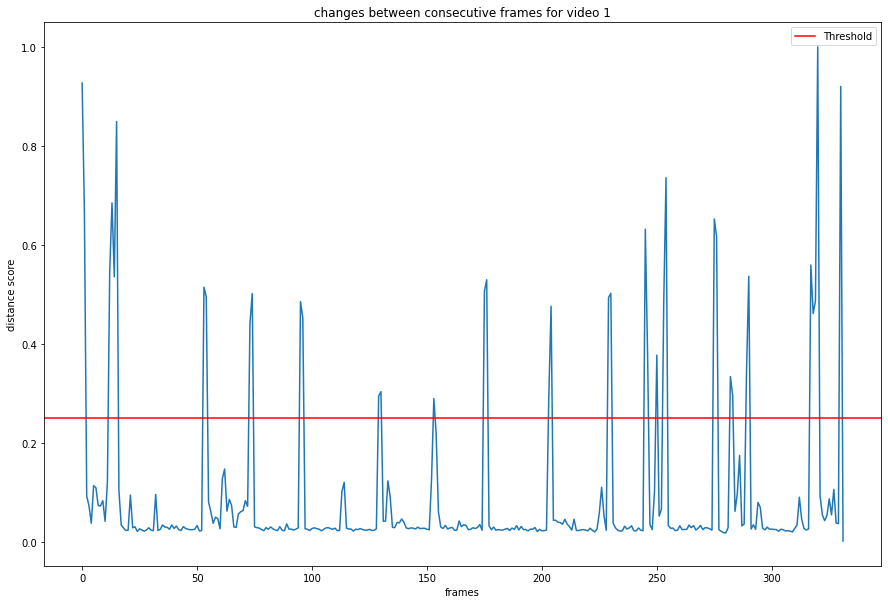

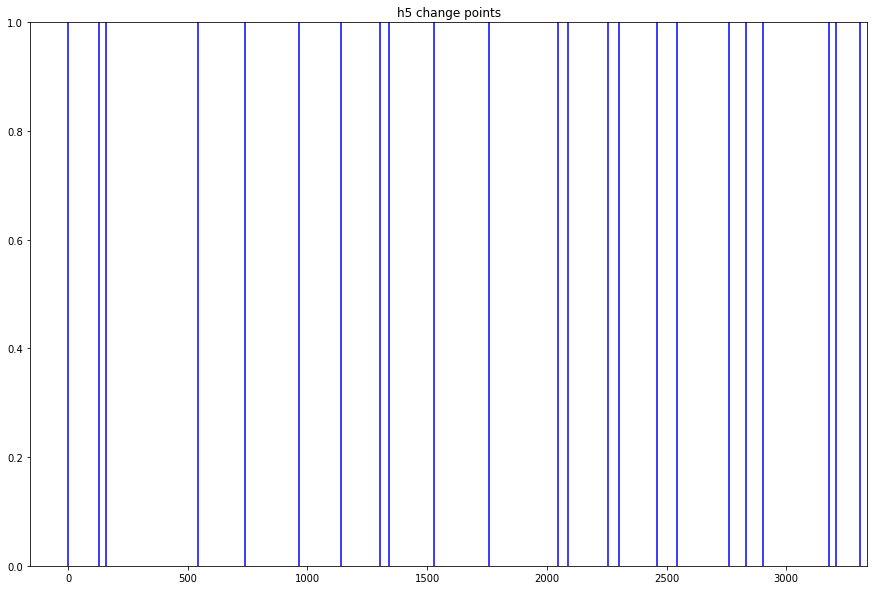

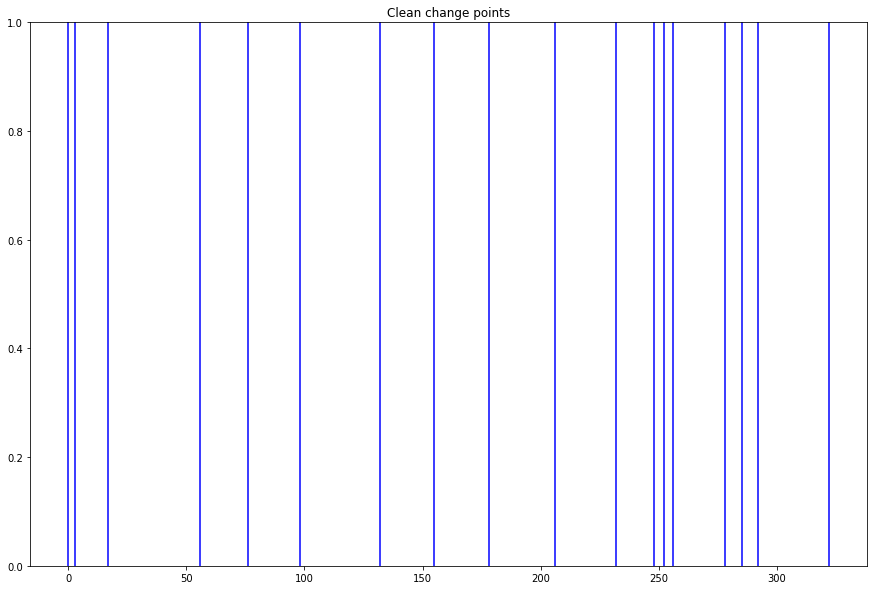

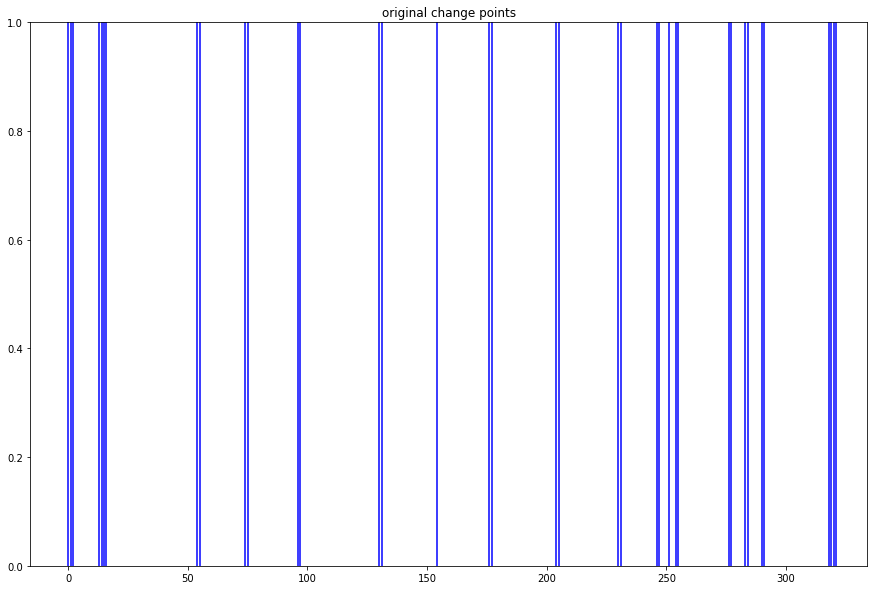

Video -  6


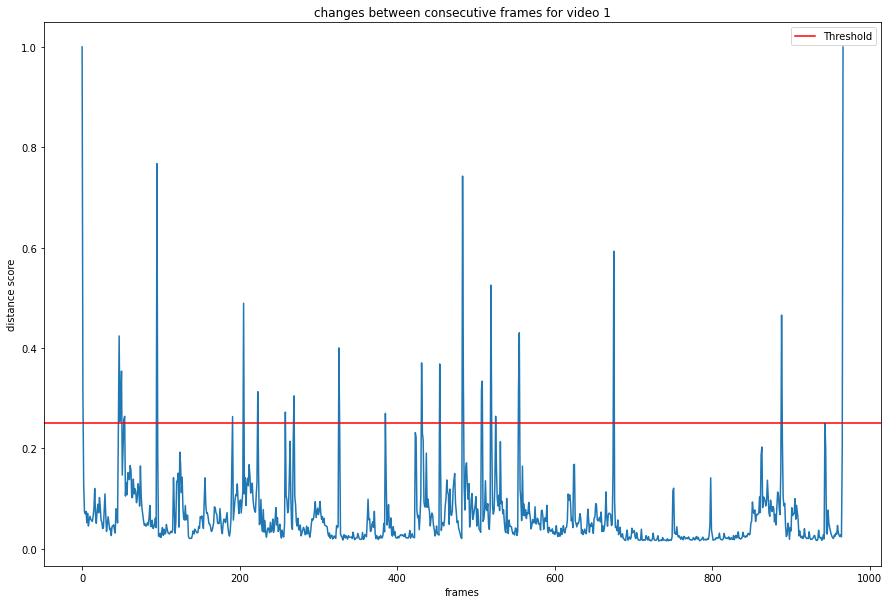

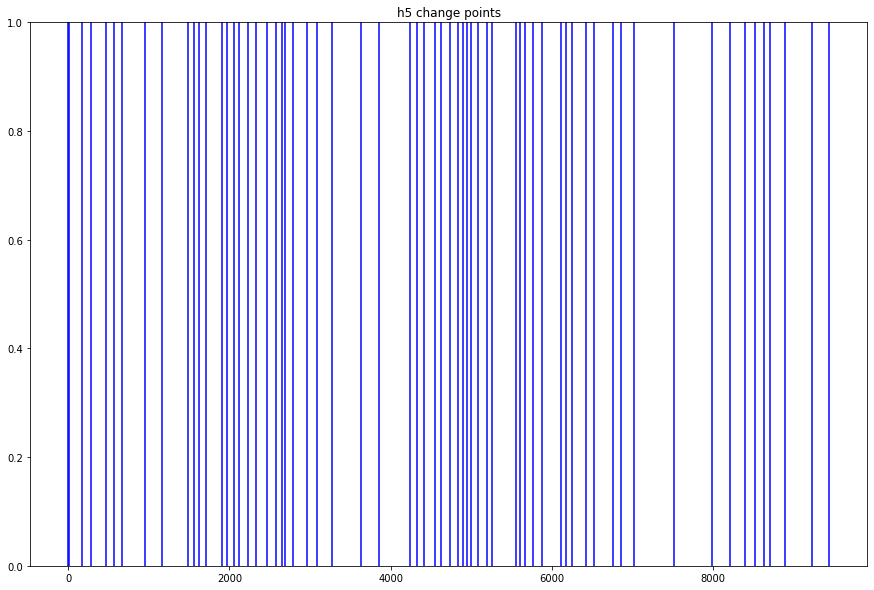

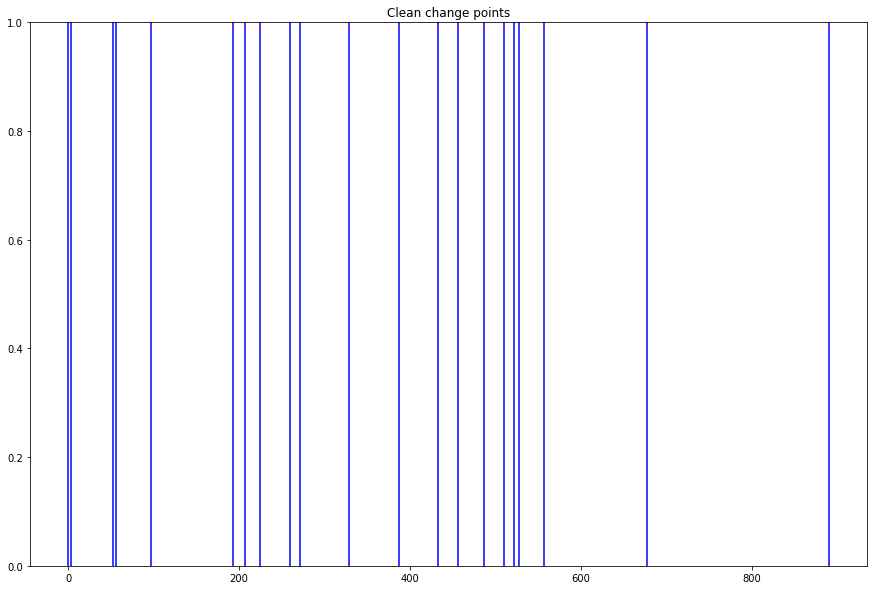

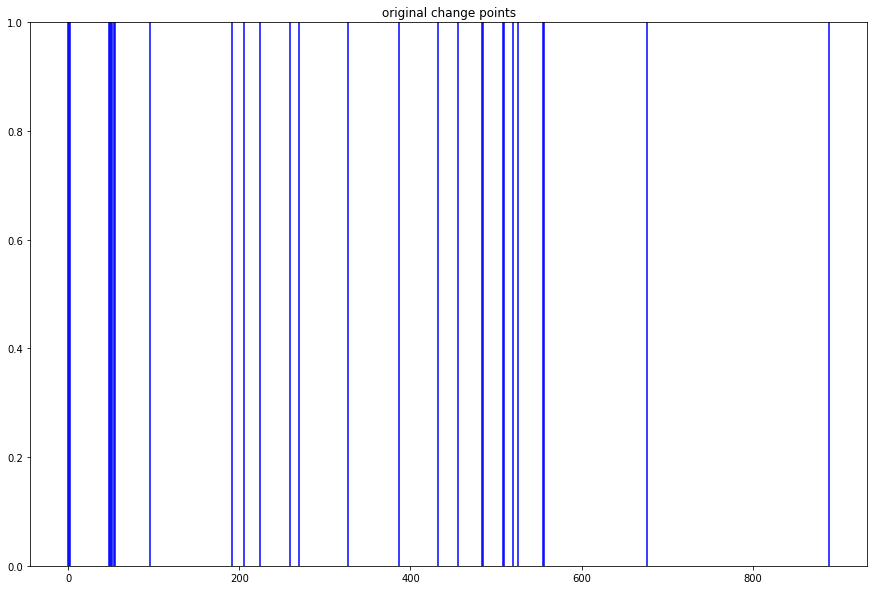

Video -  7


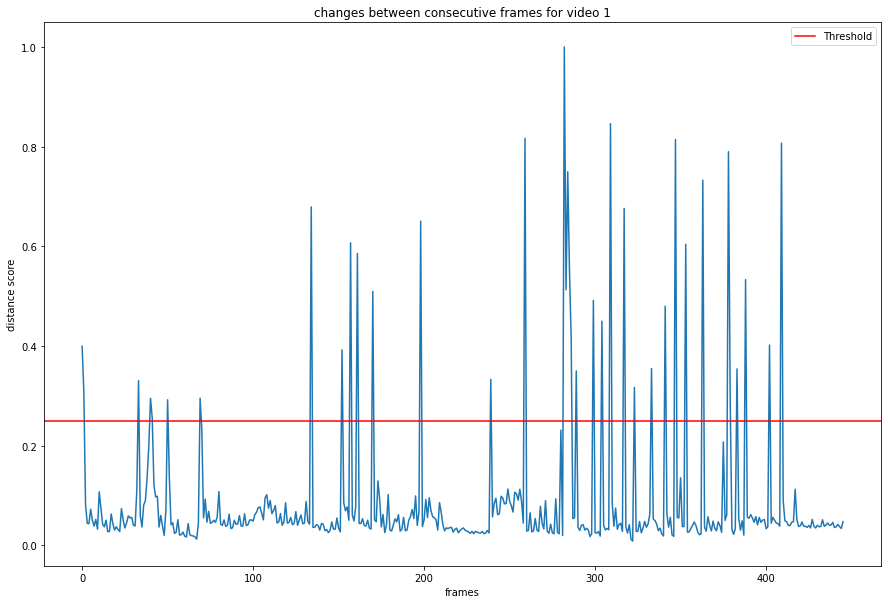

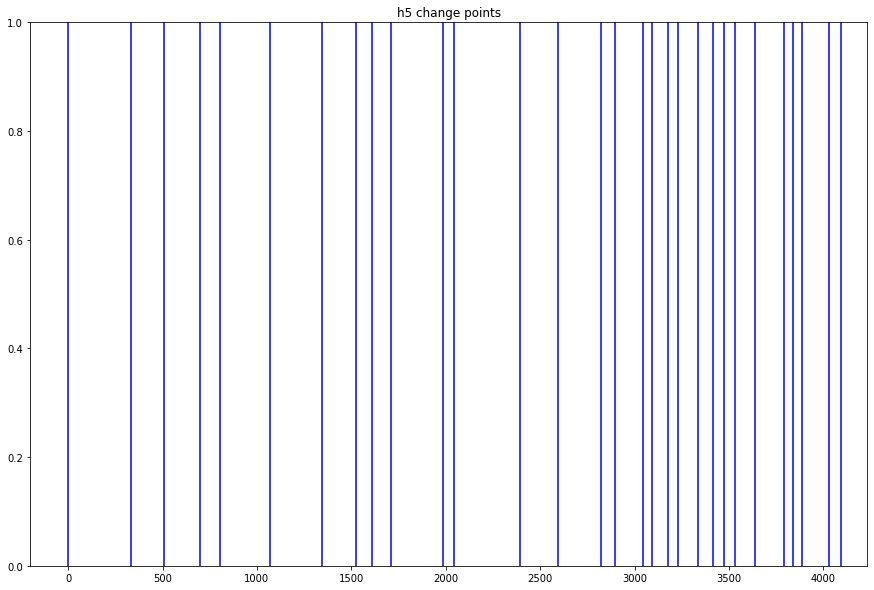

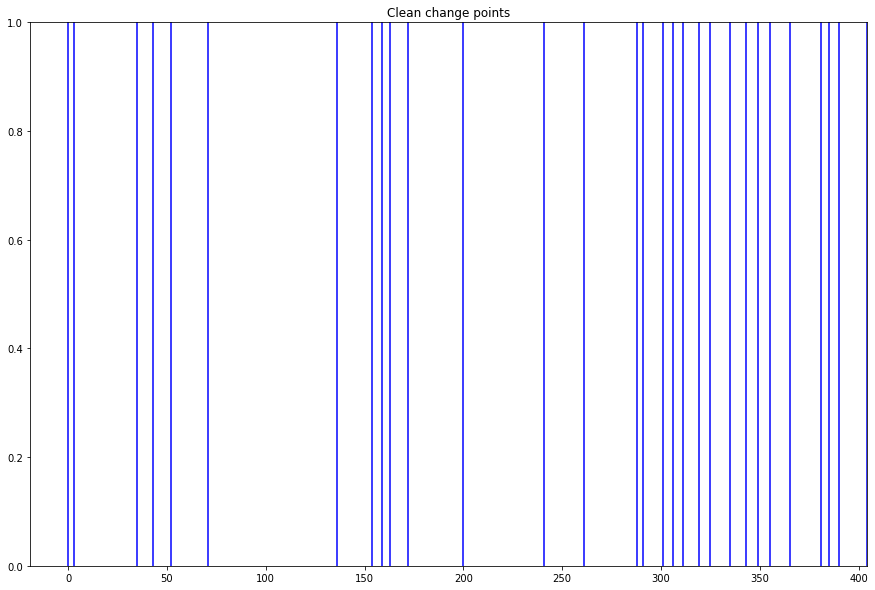

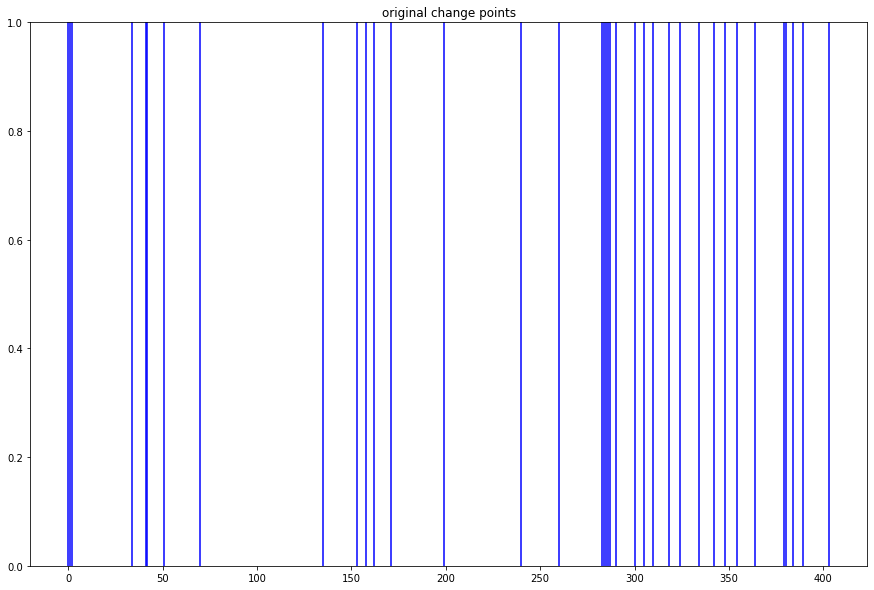

Video -  8


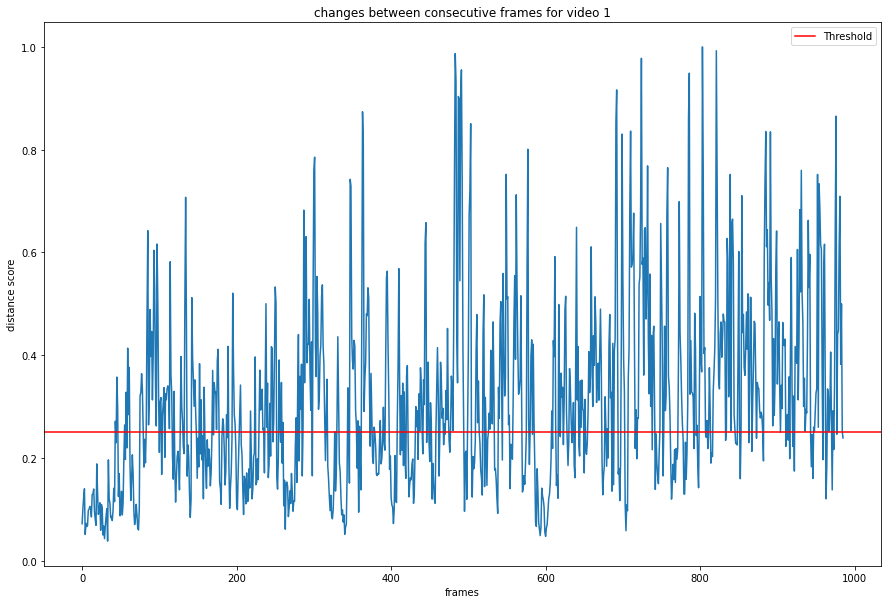

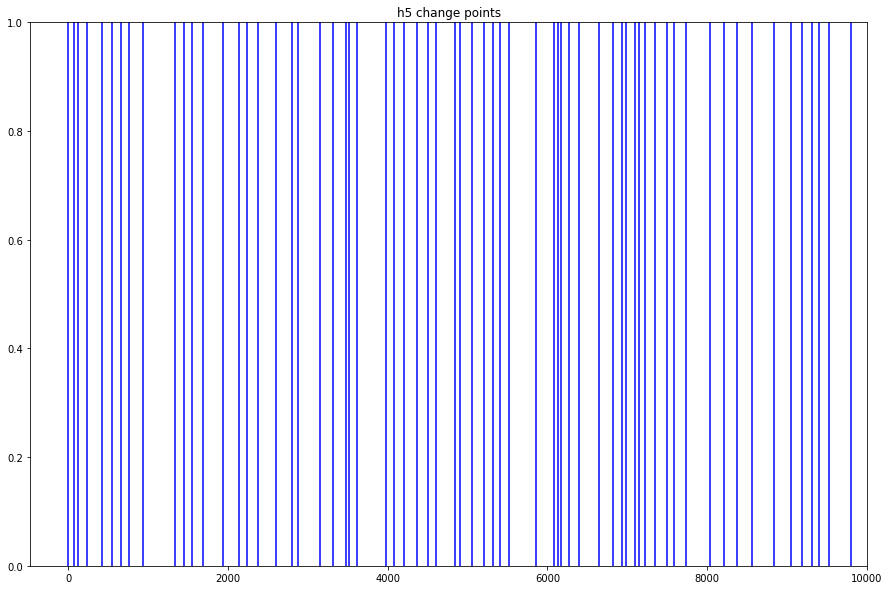

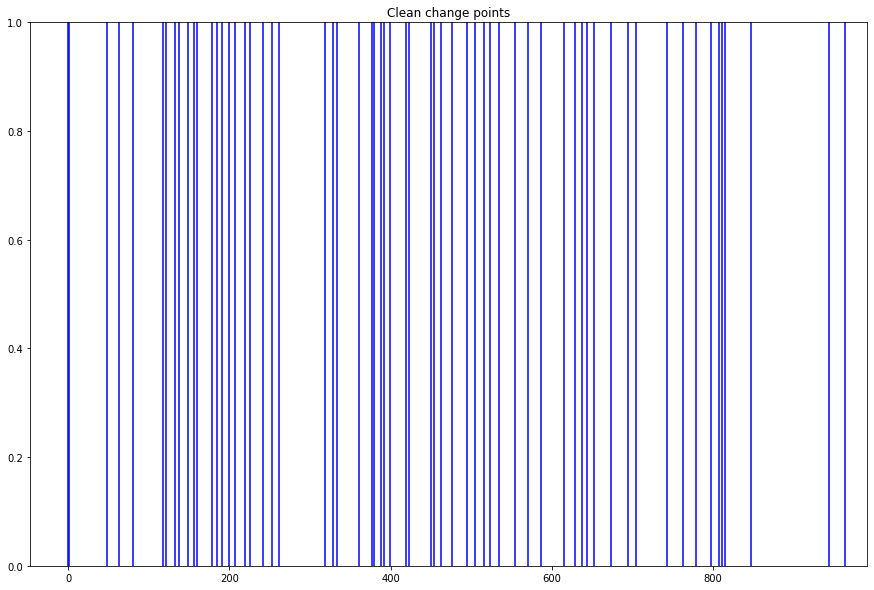

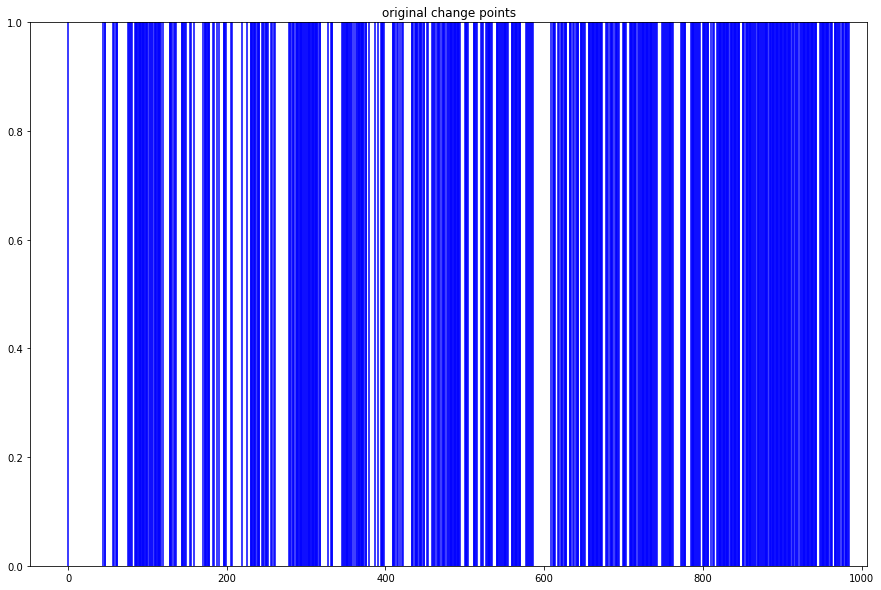

Video -  9


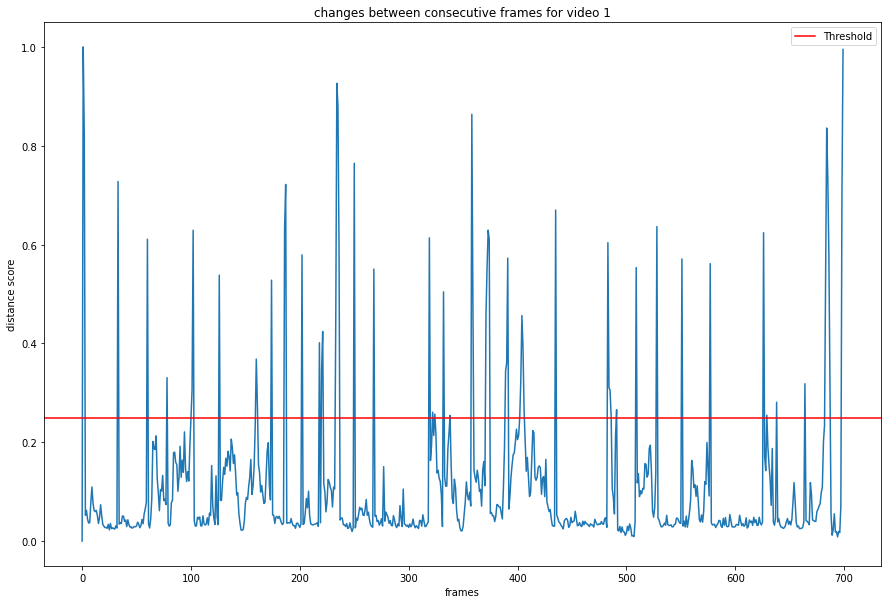

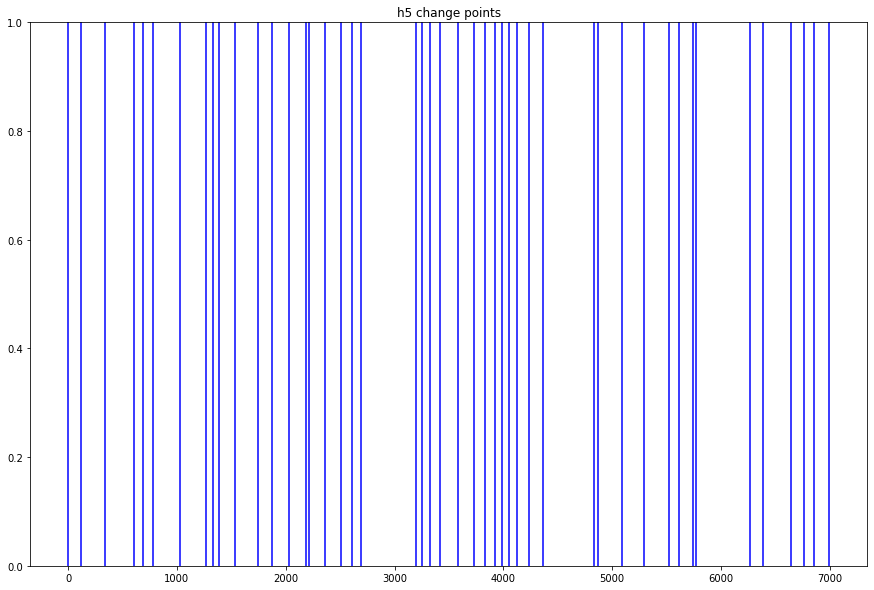

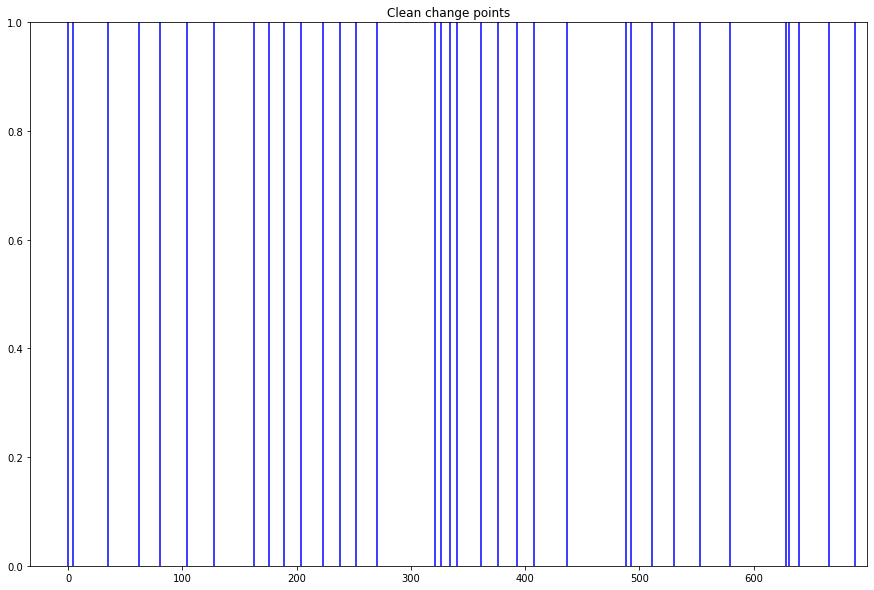

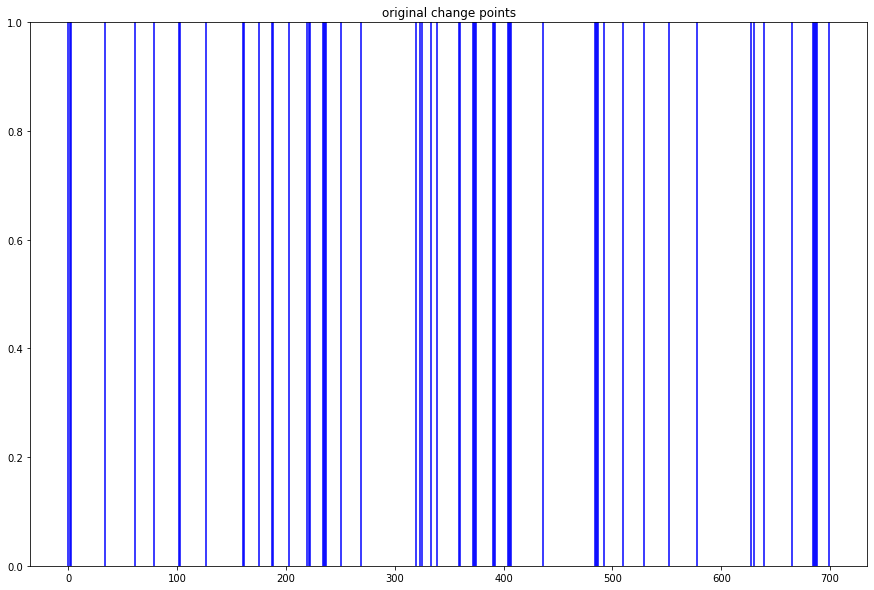

Video -  10


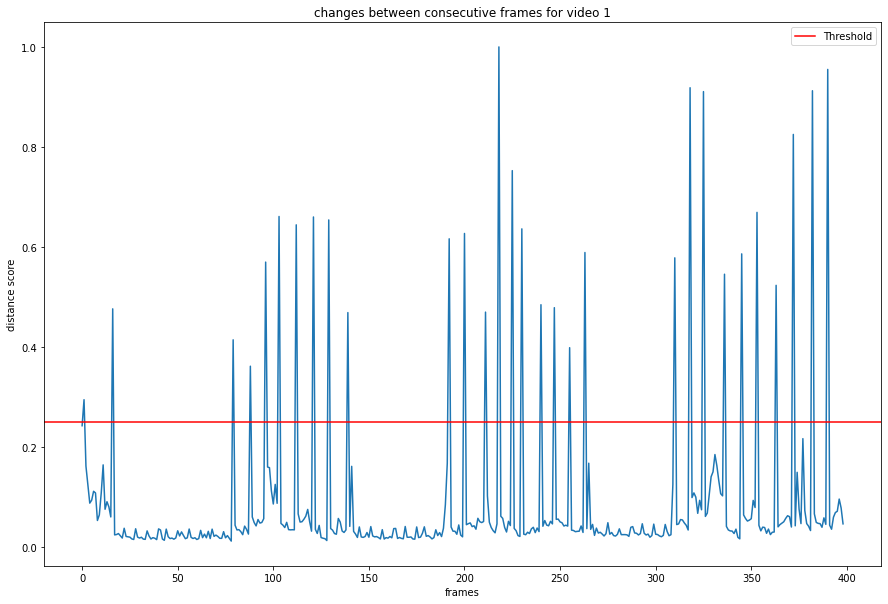

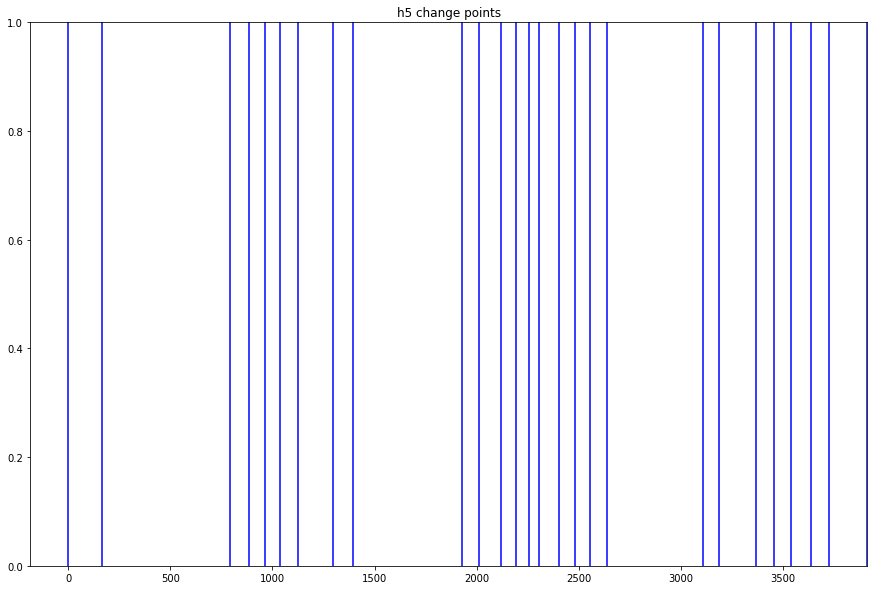

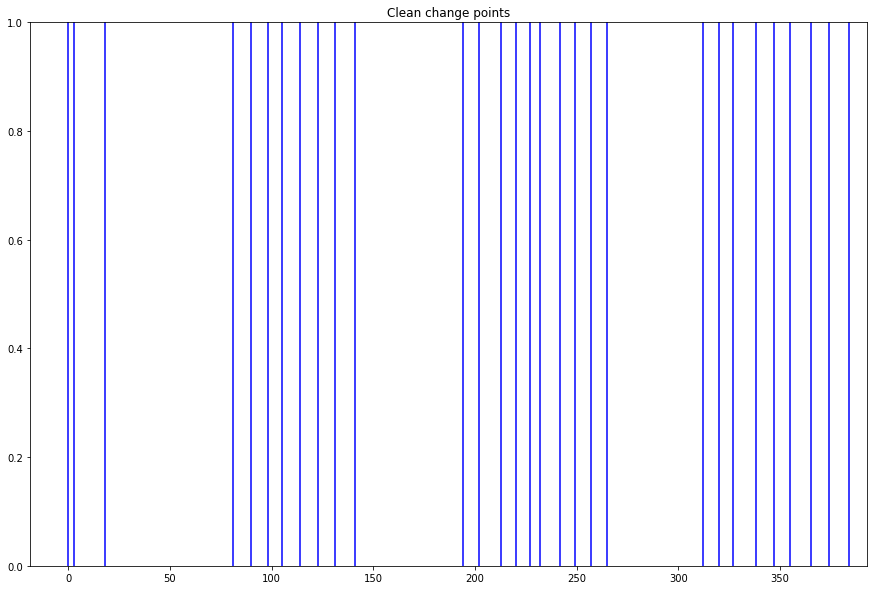

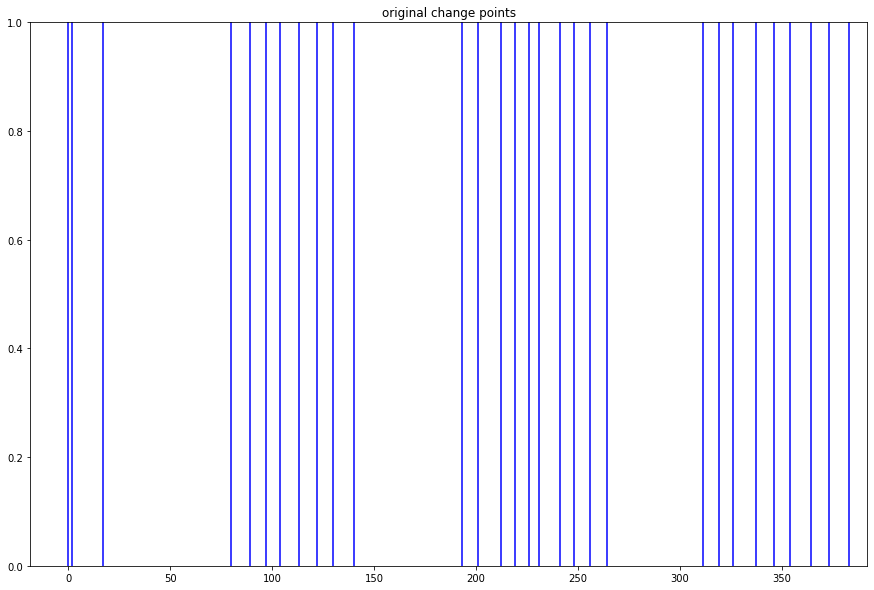

Video -  11


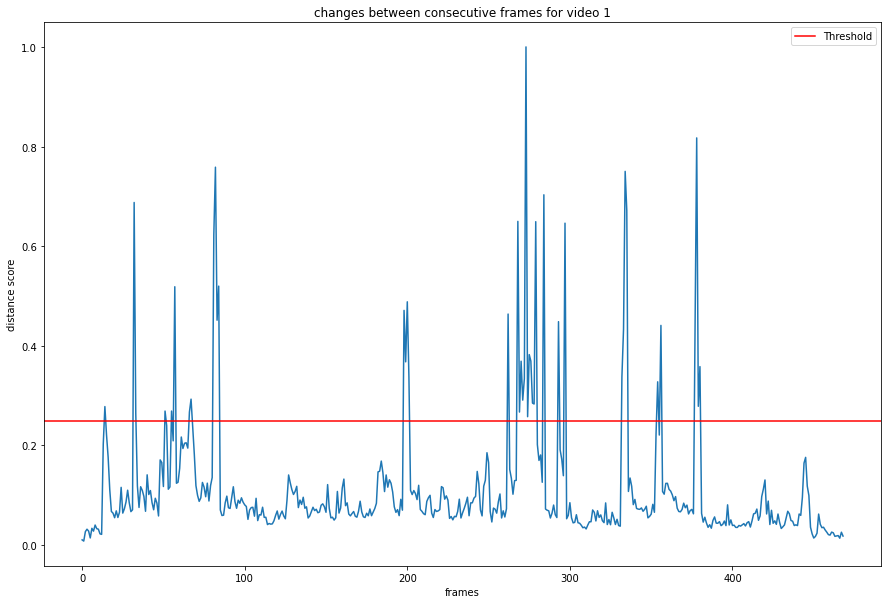

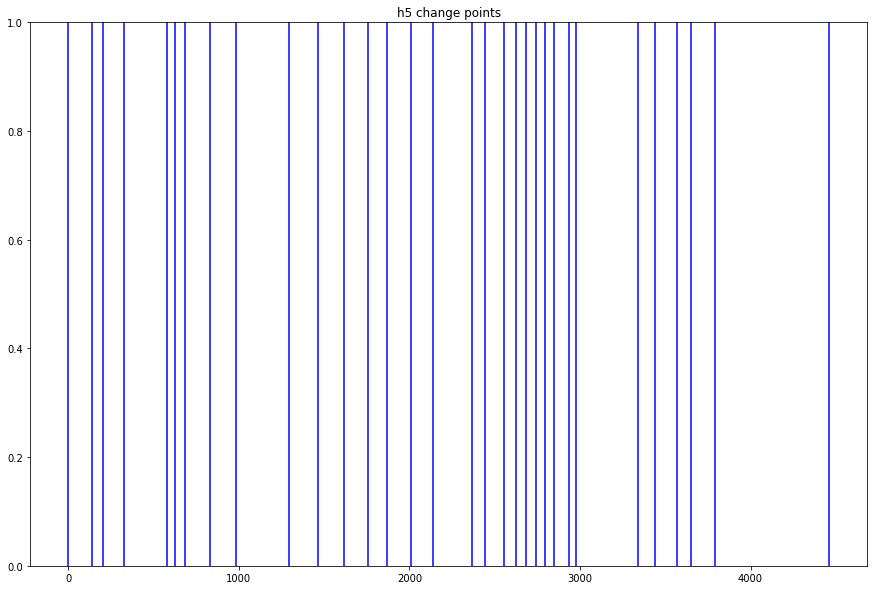

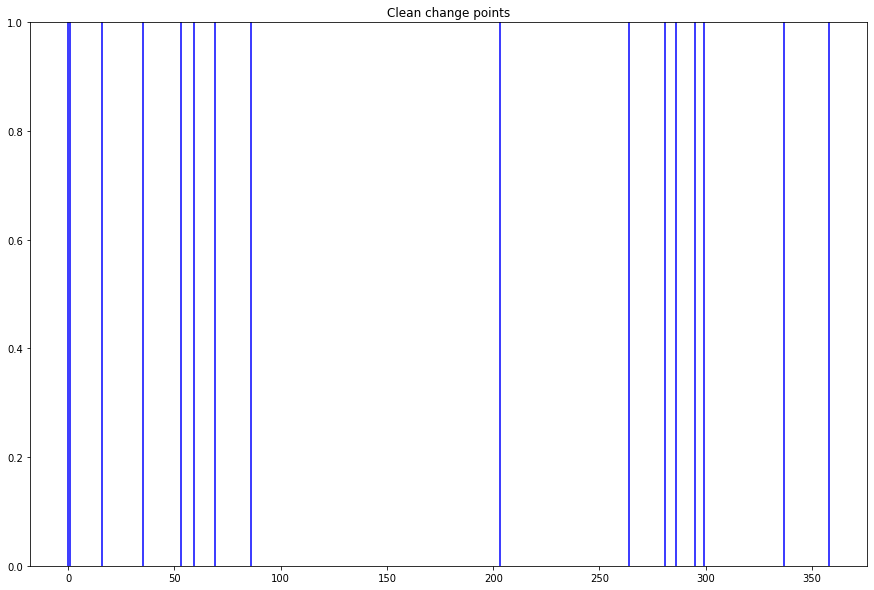

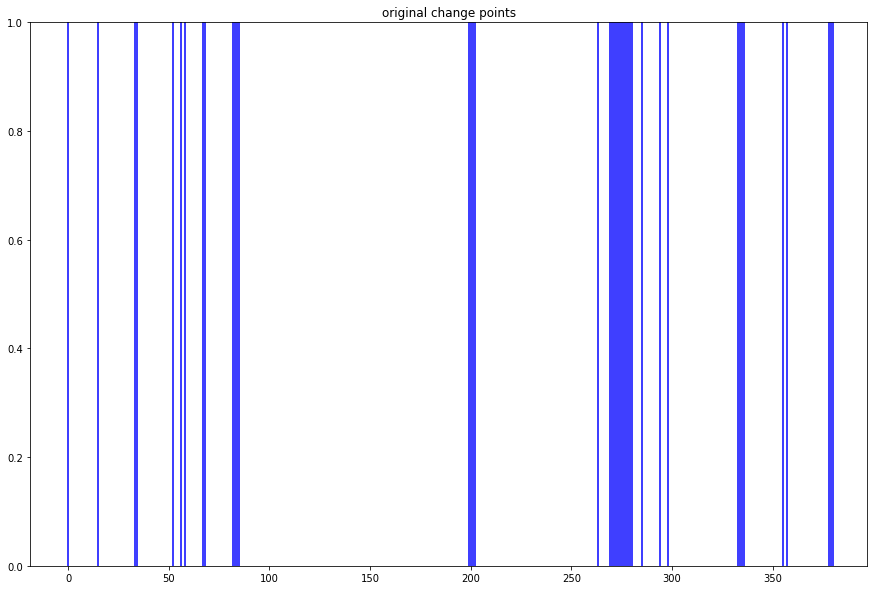

Video -  12


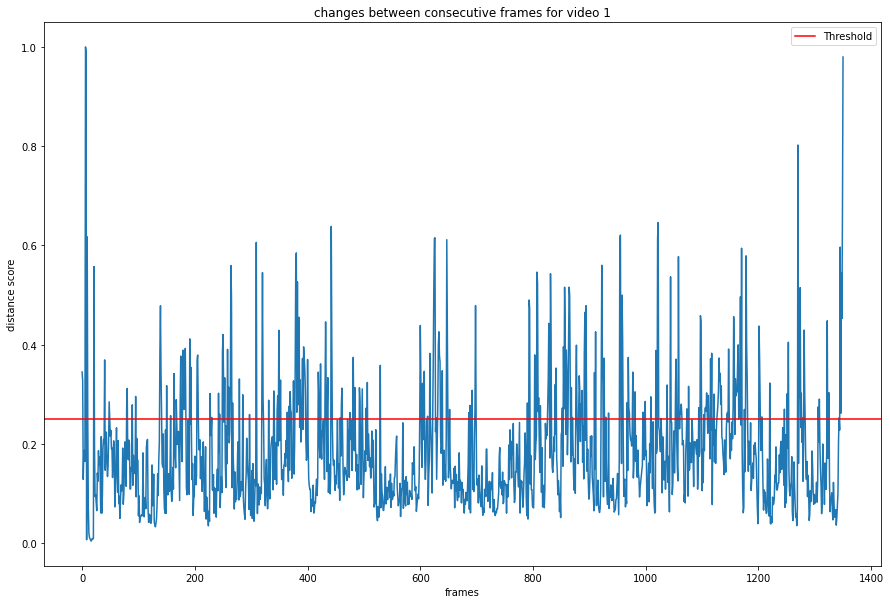

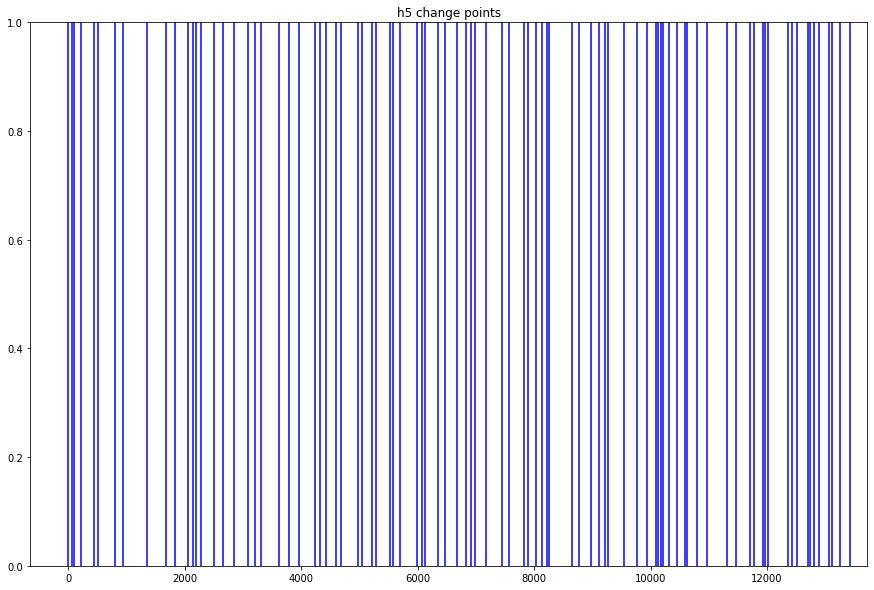

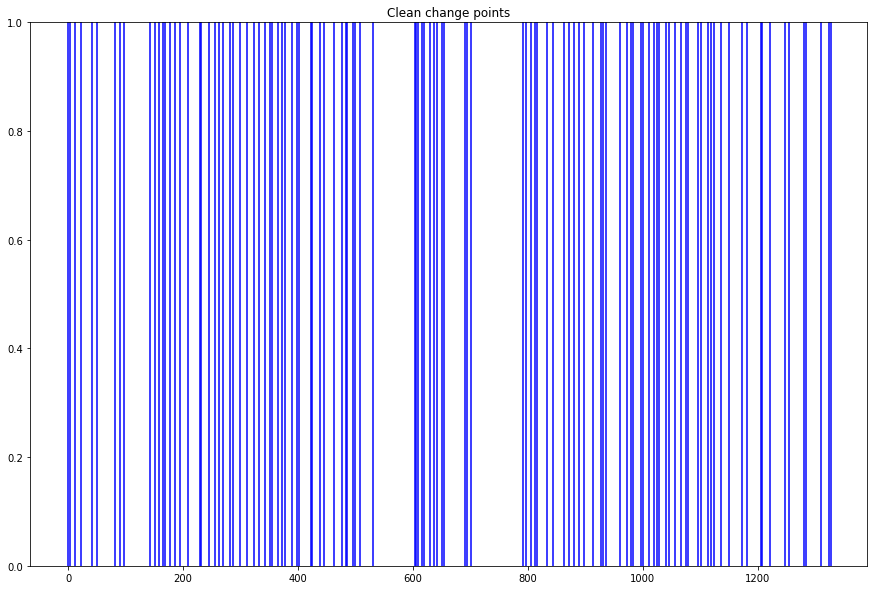

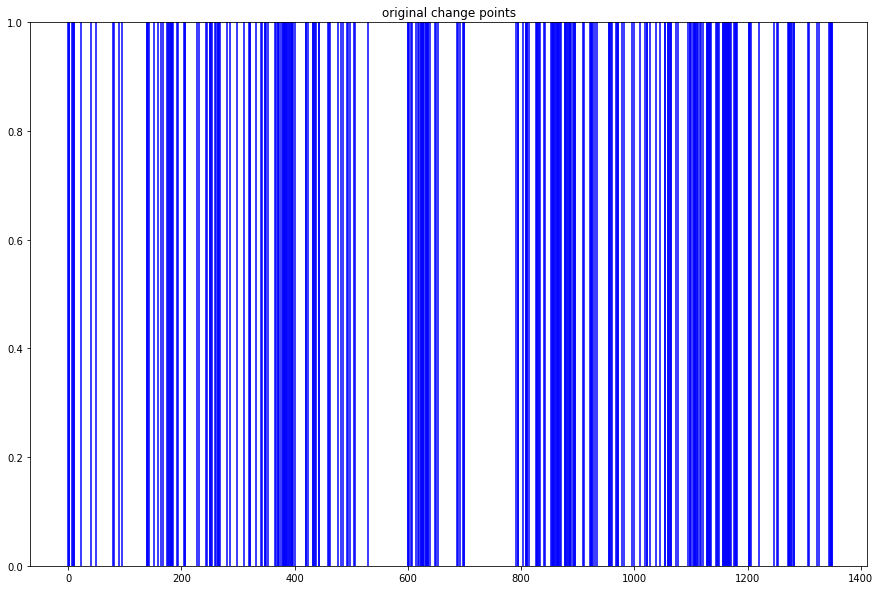

Video -  13


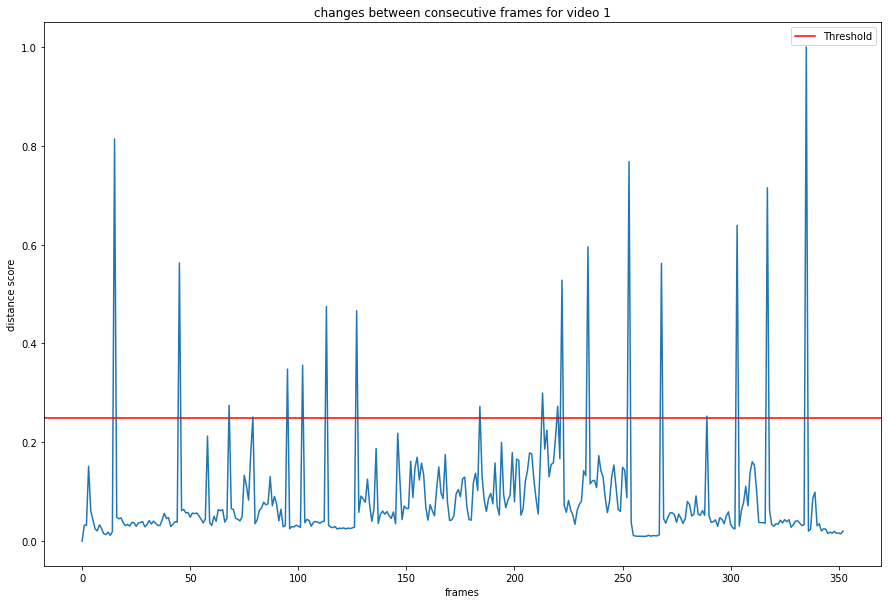

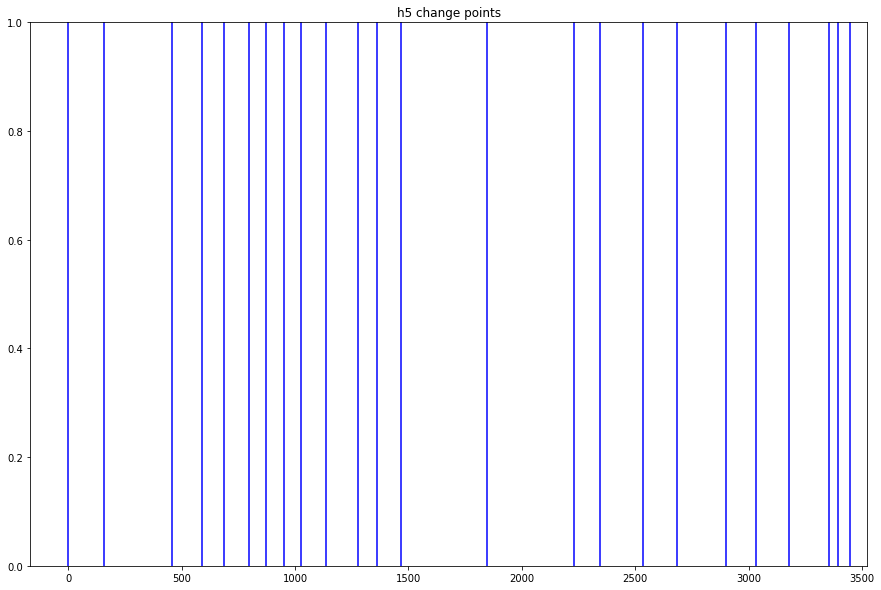

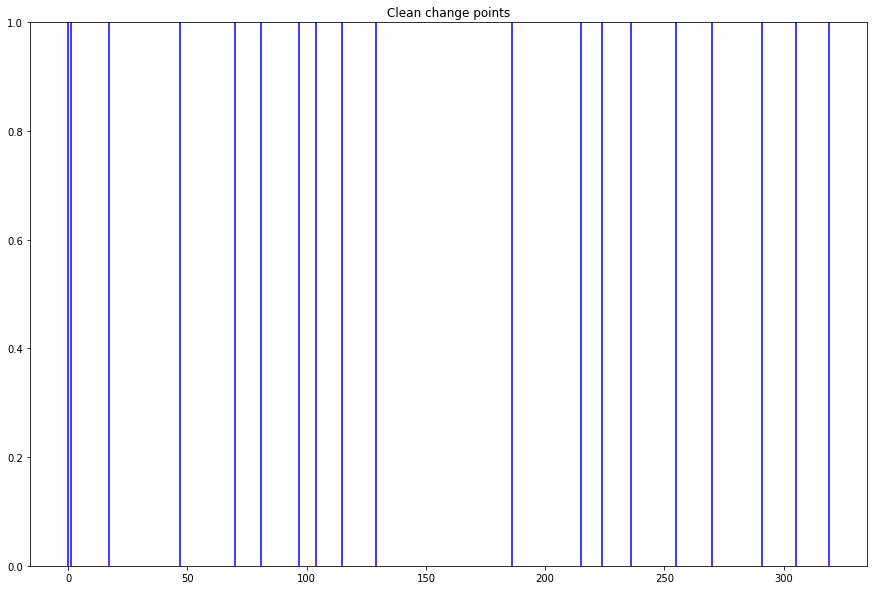

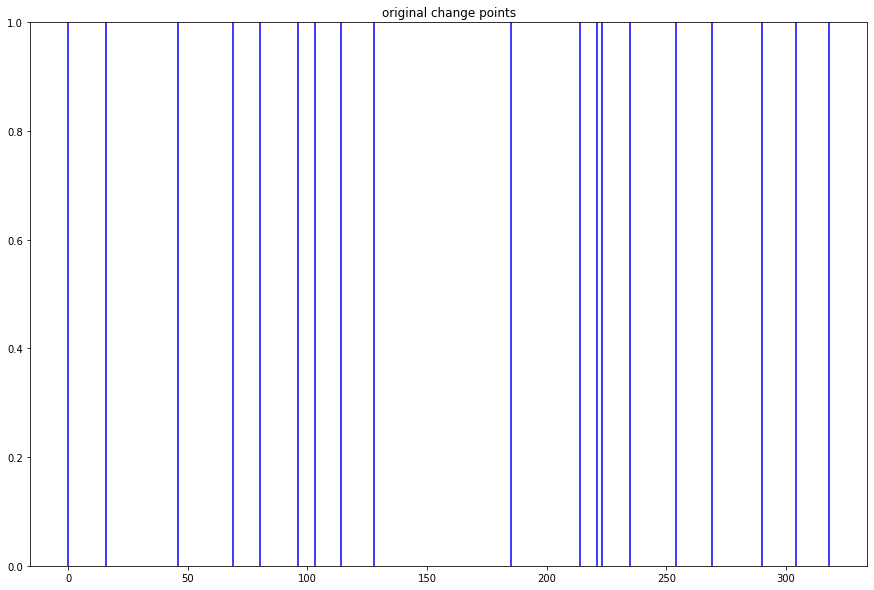

Video -  14


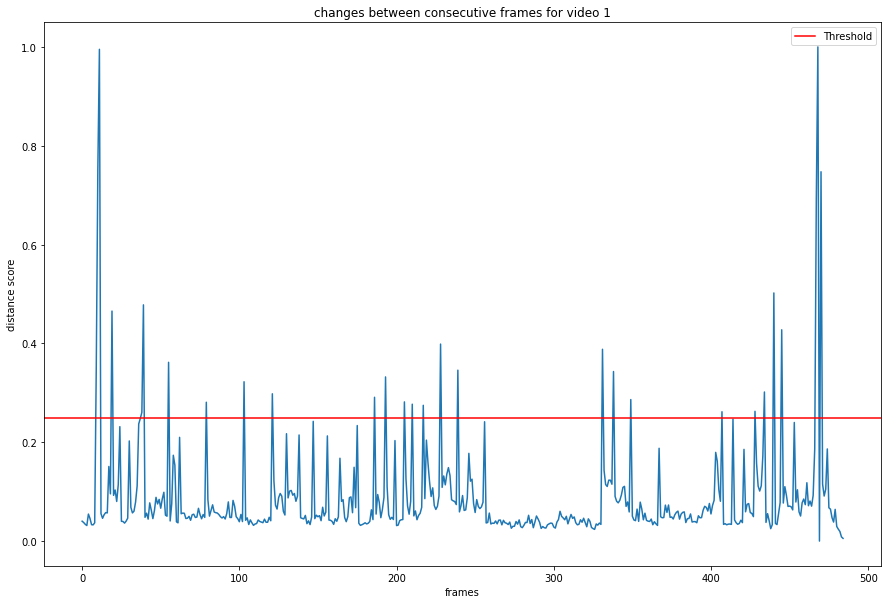

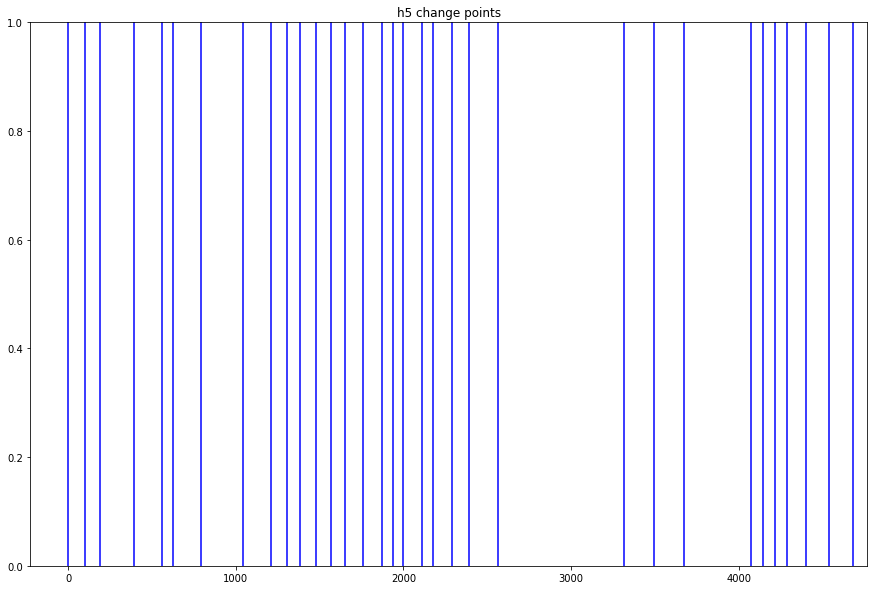

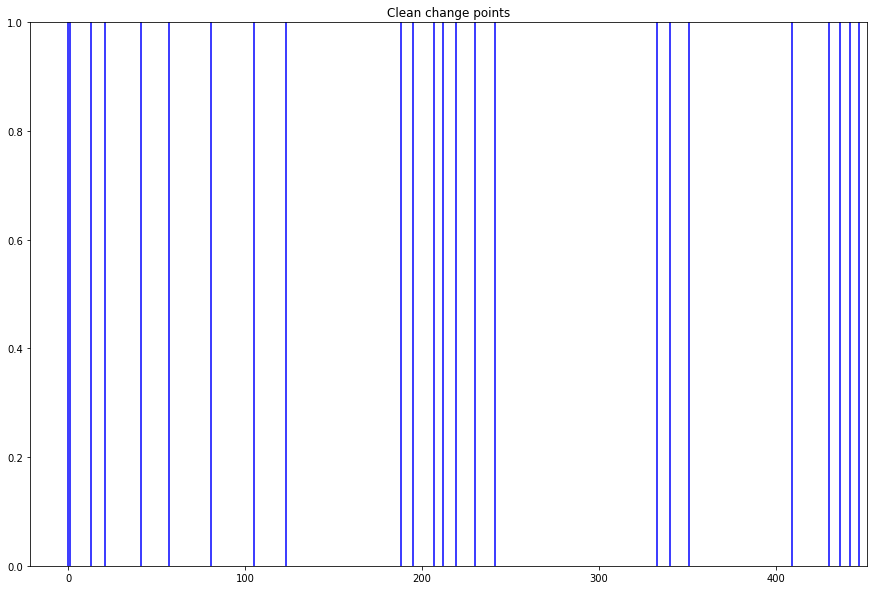

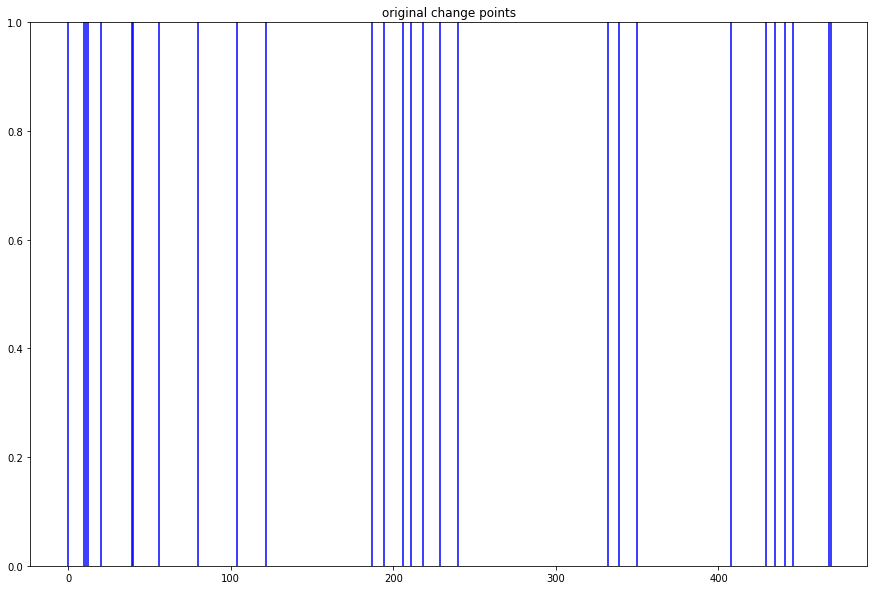

Video -  15


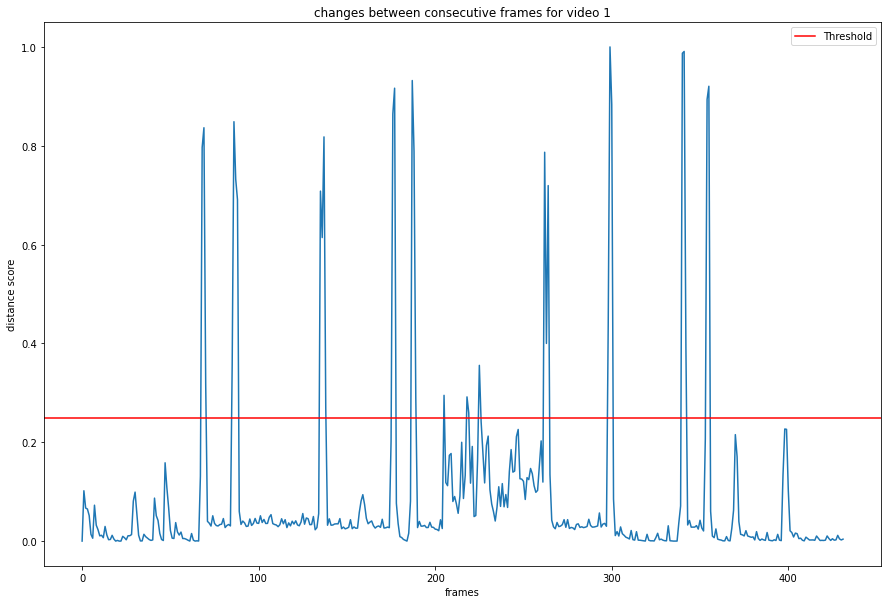

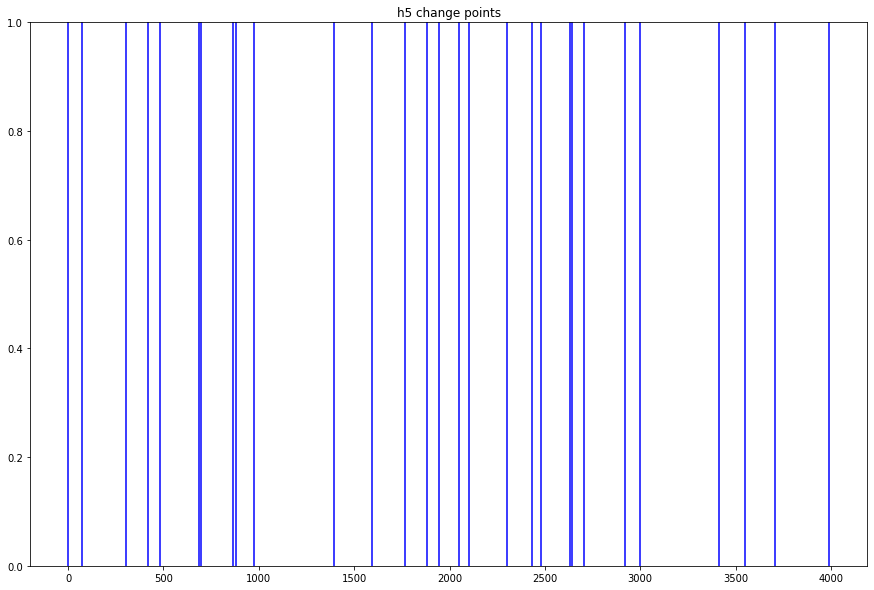

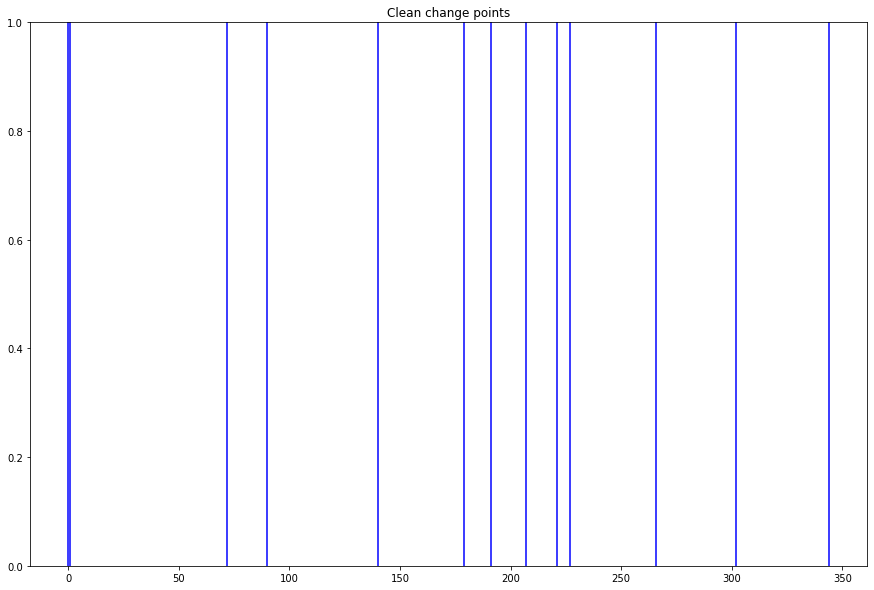

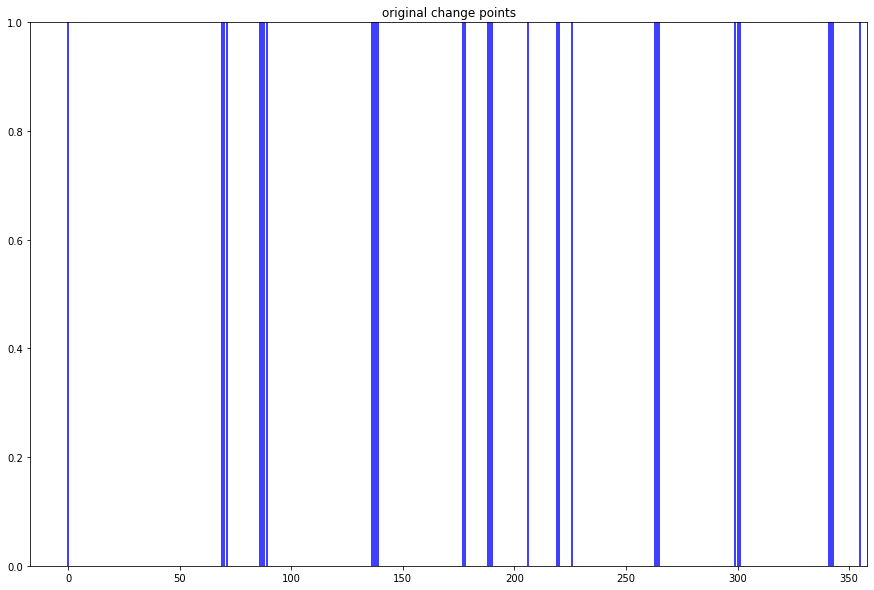

Video -  16


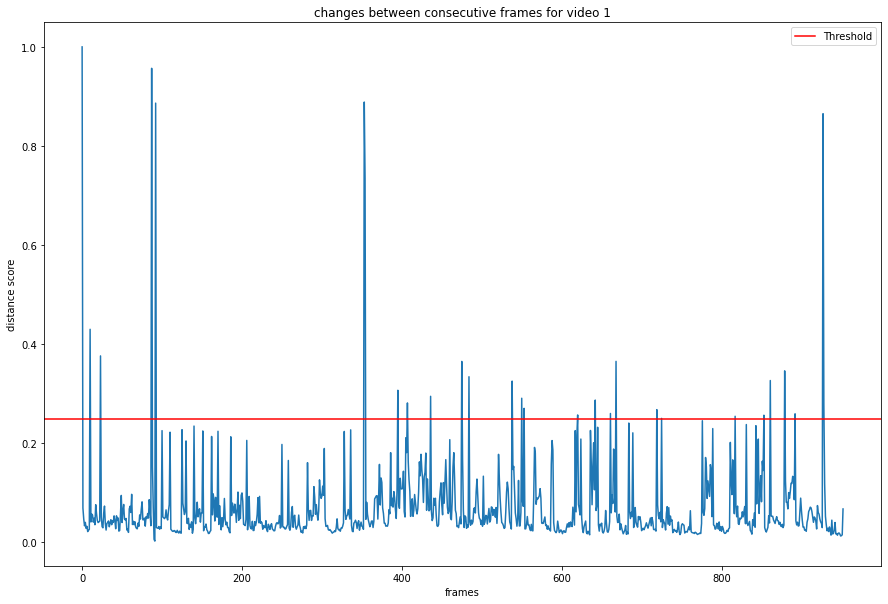

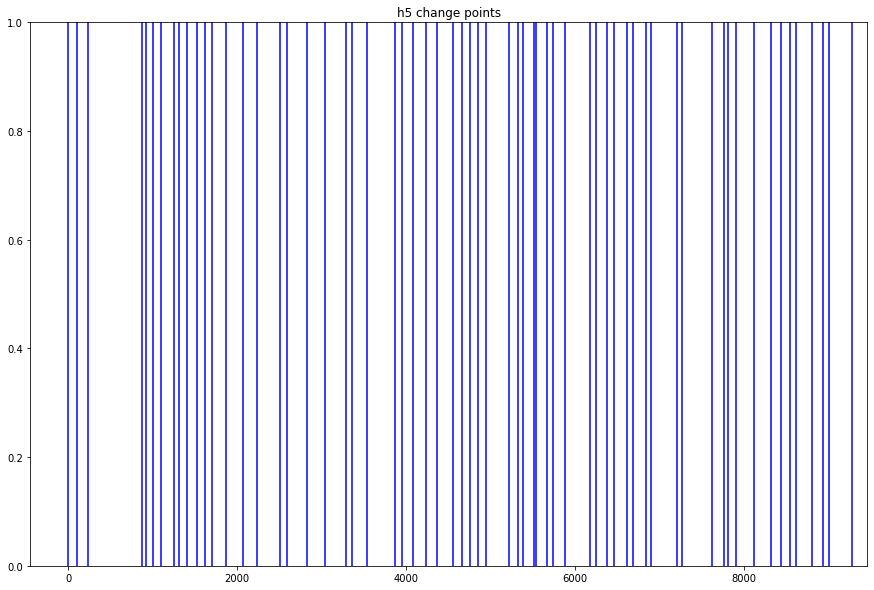

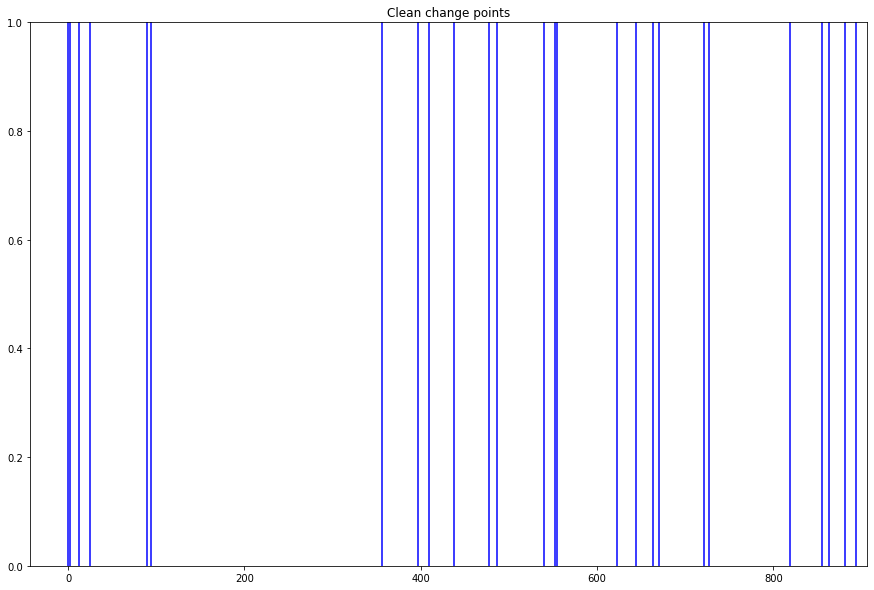

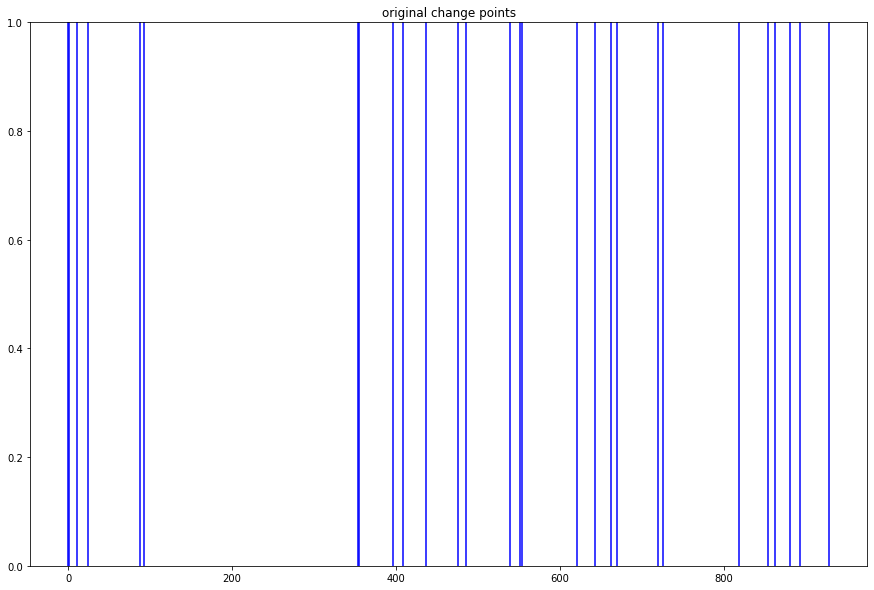

Video -  17


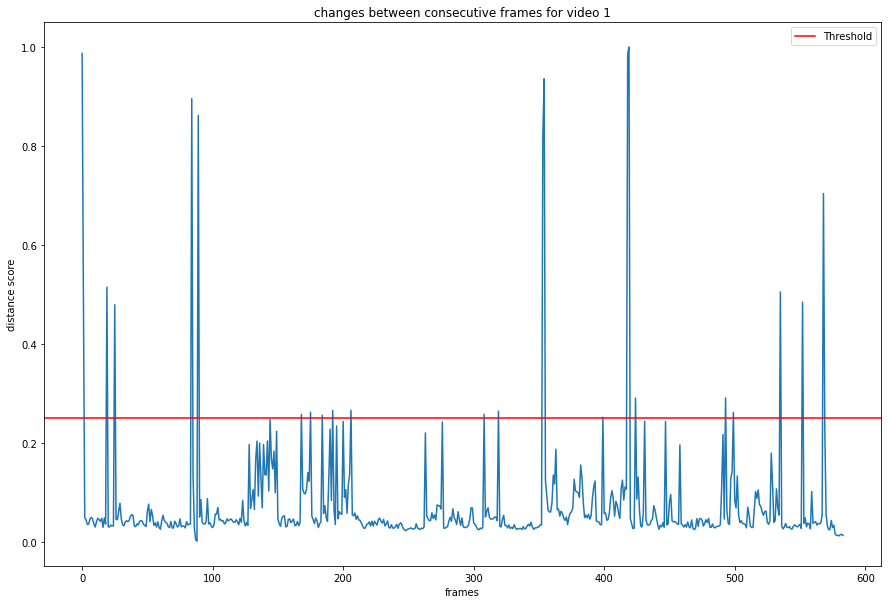

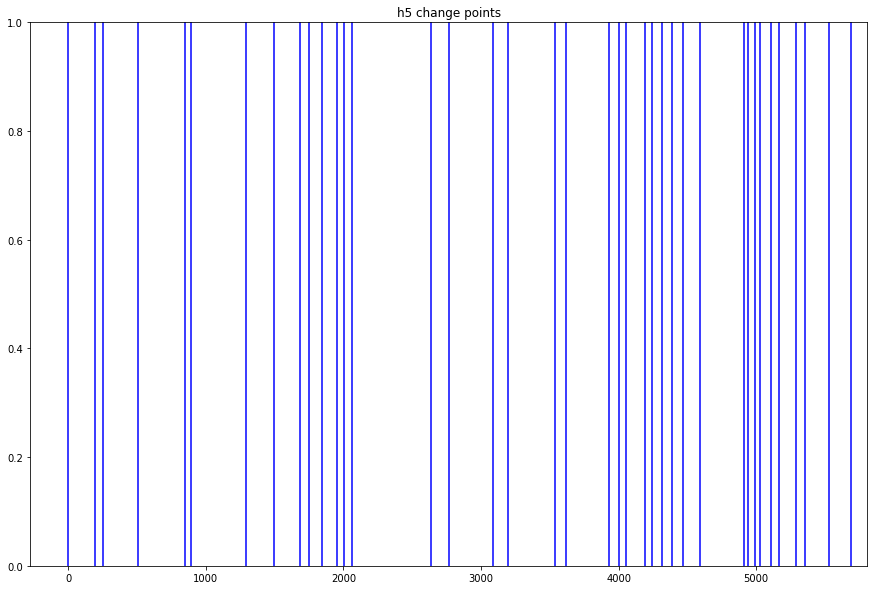

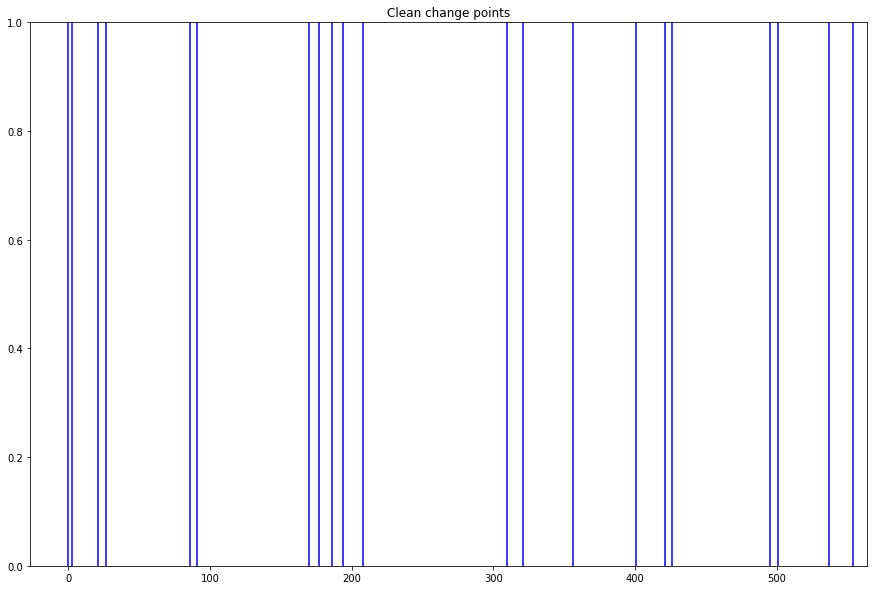

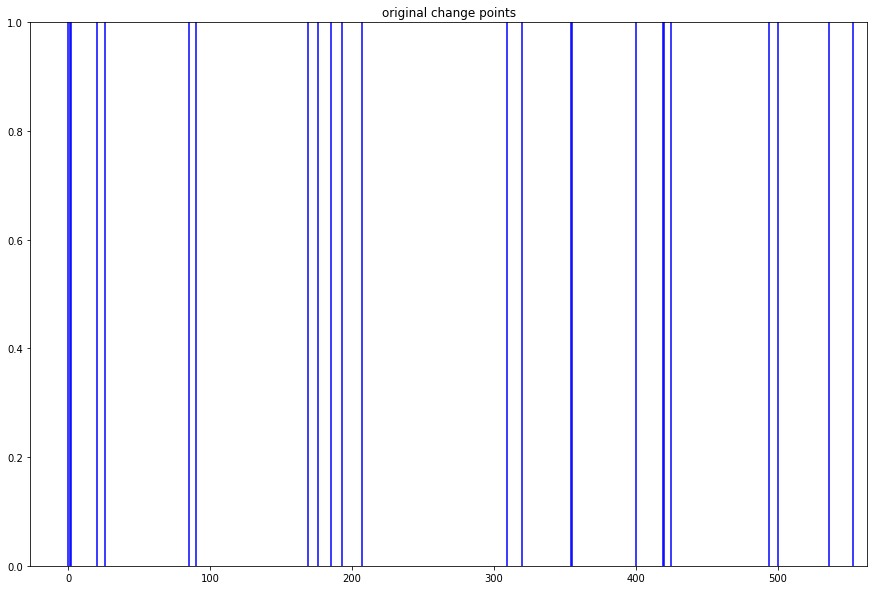

Video -  18


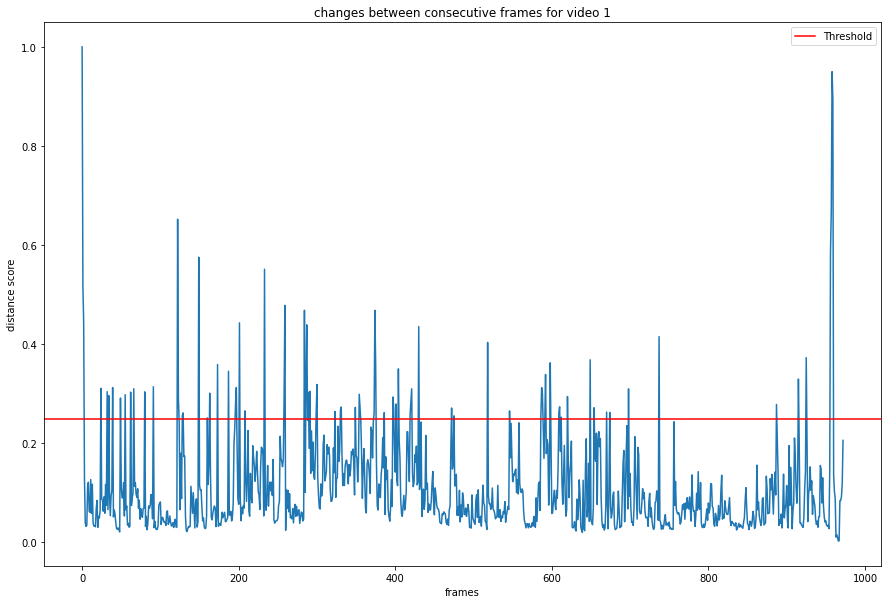

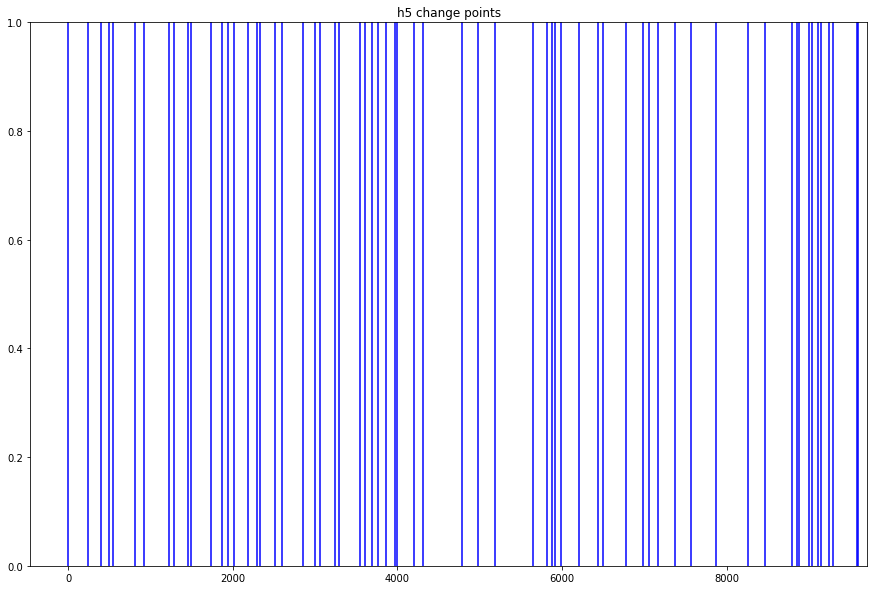

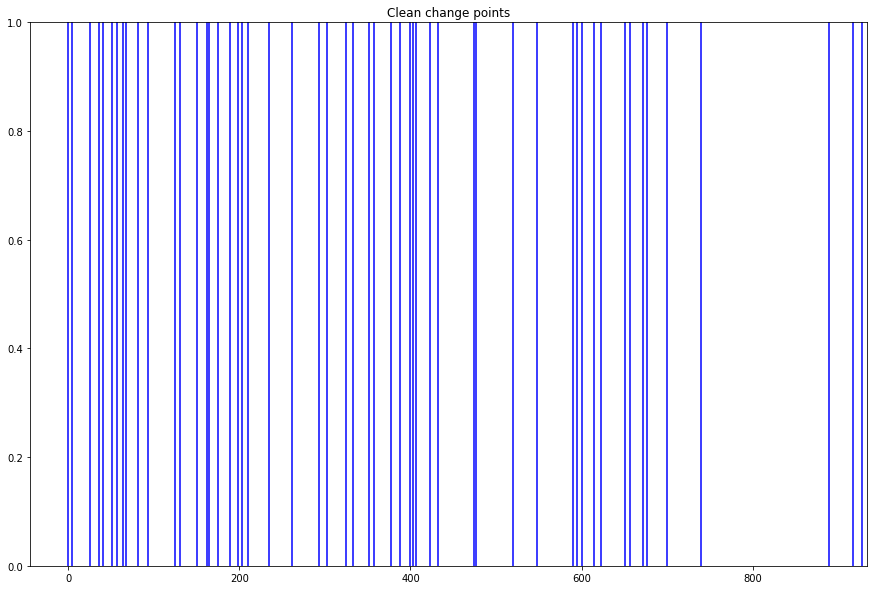

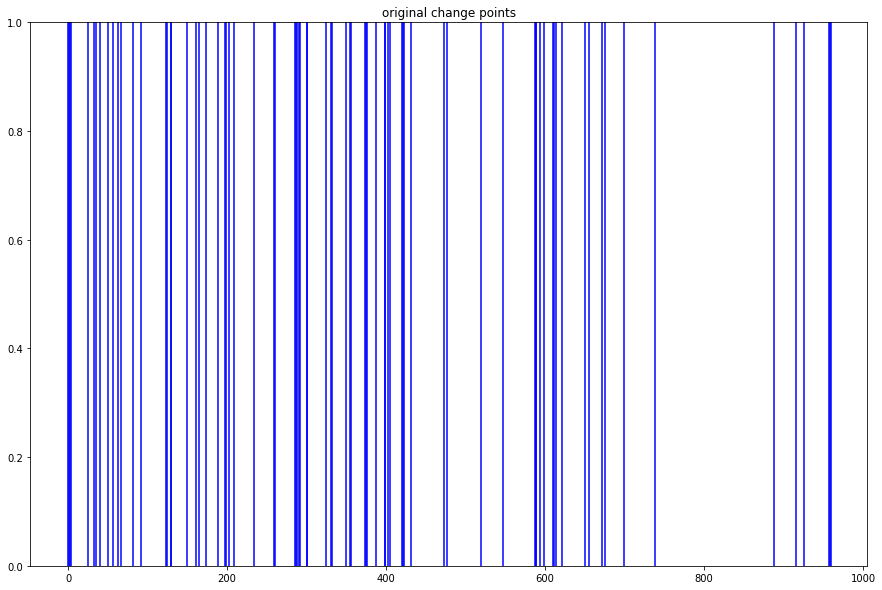

Video -  19


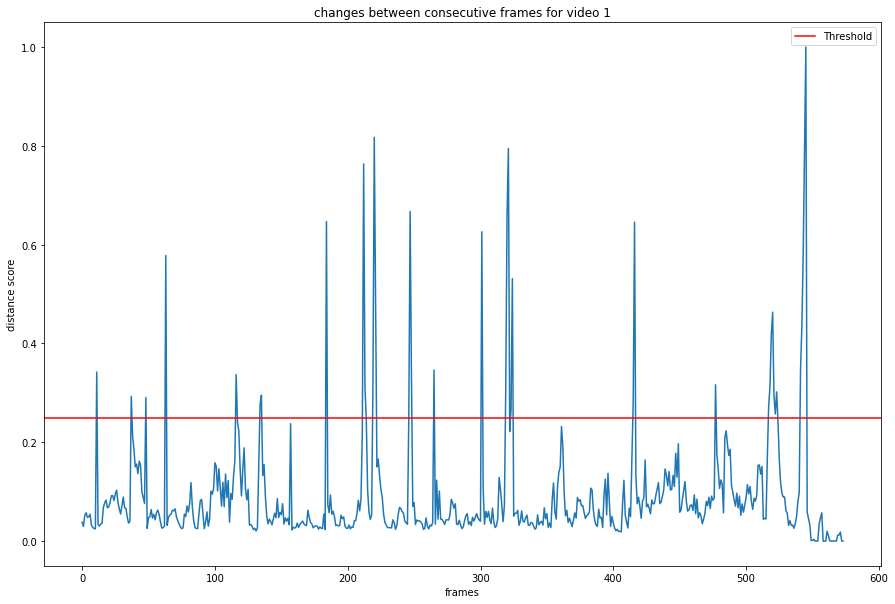

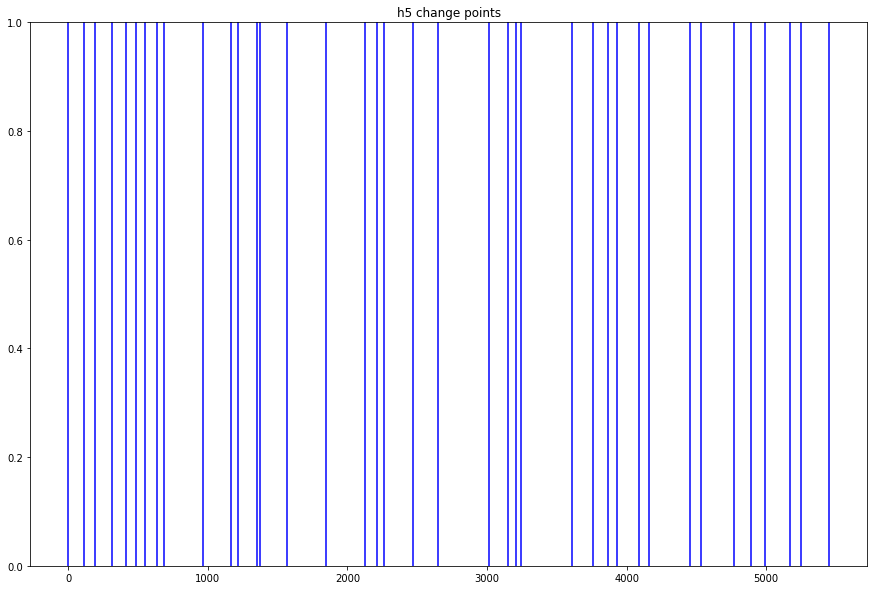

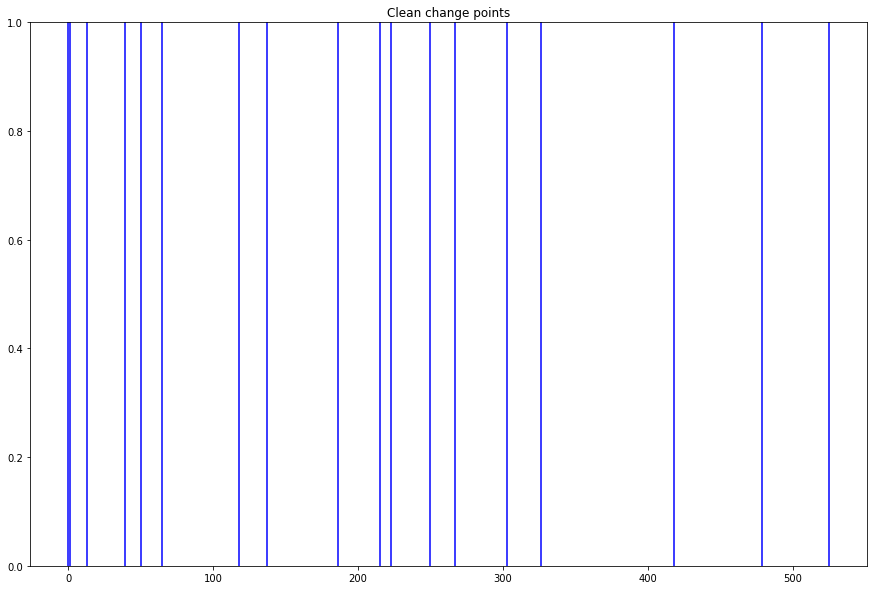

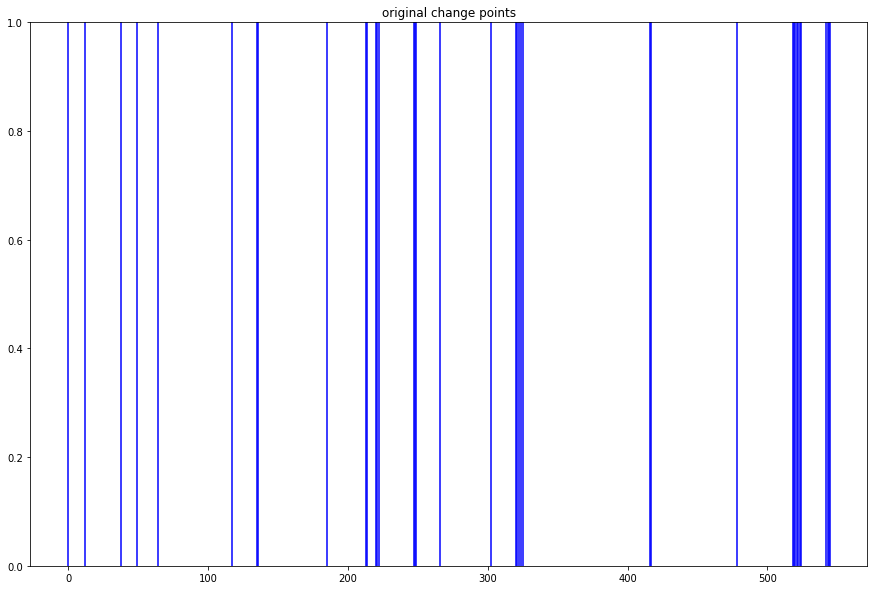

Video -  20


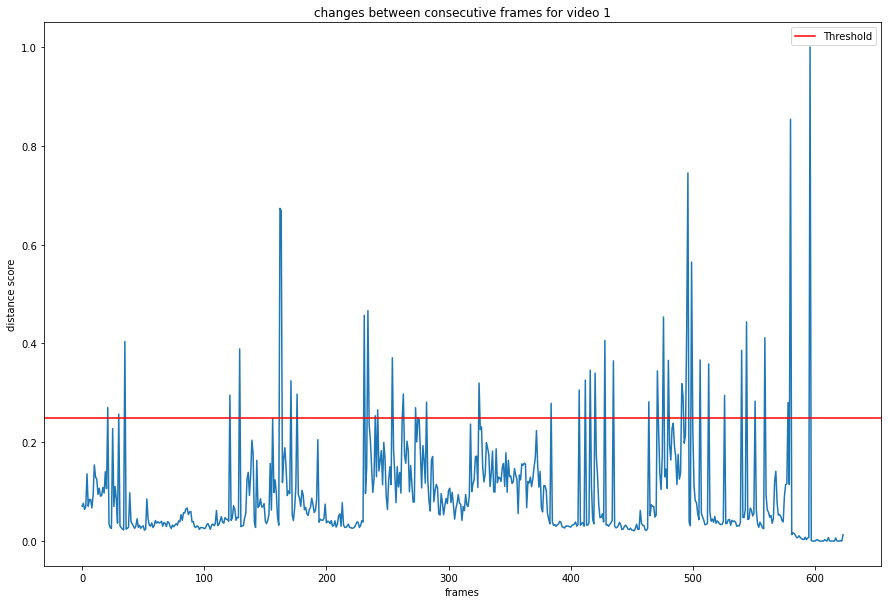

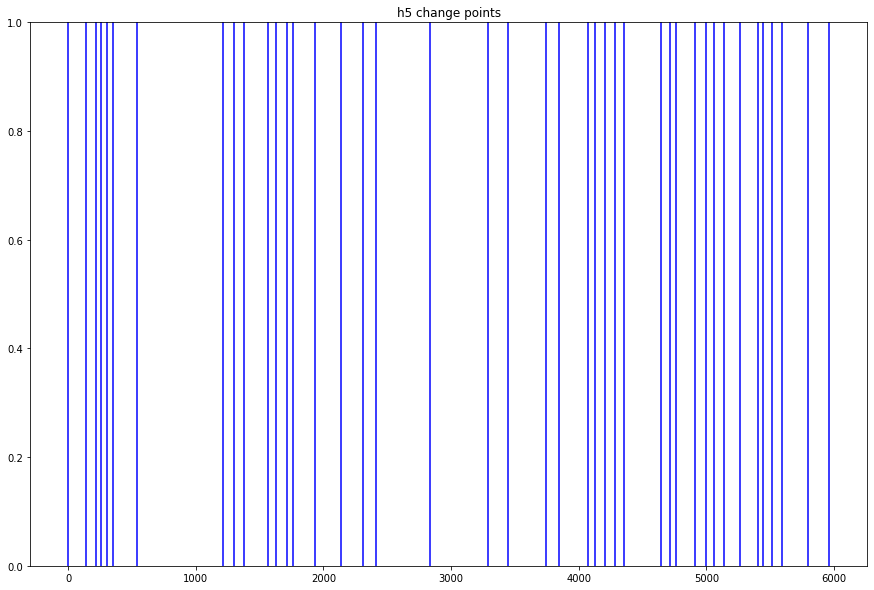

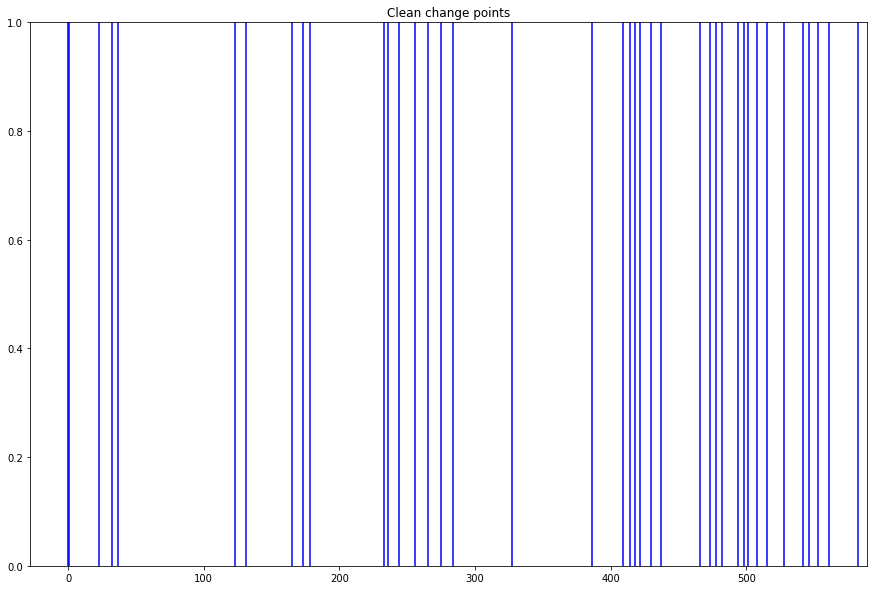

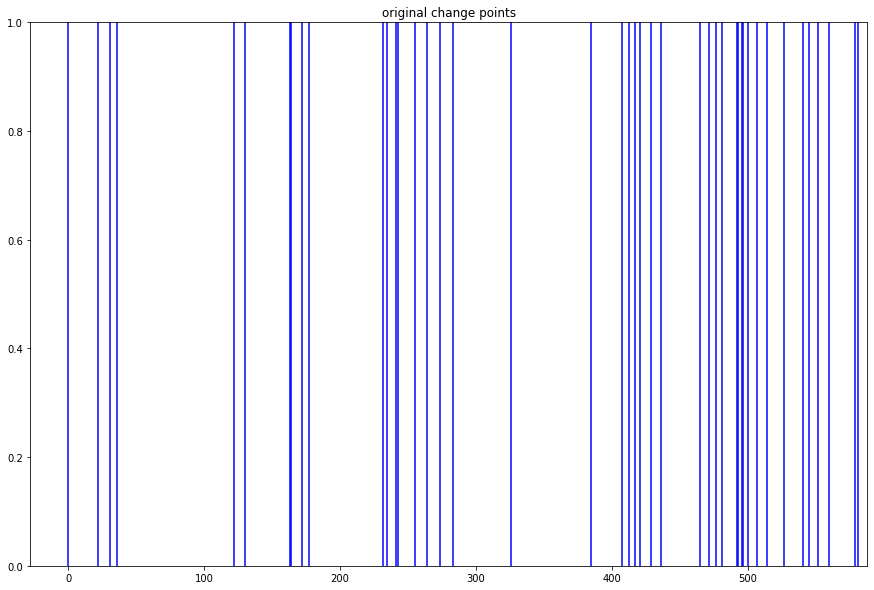

Video -  21


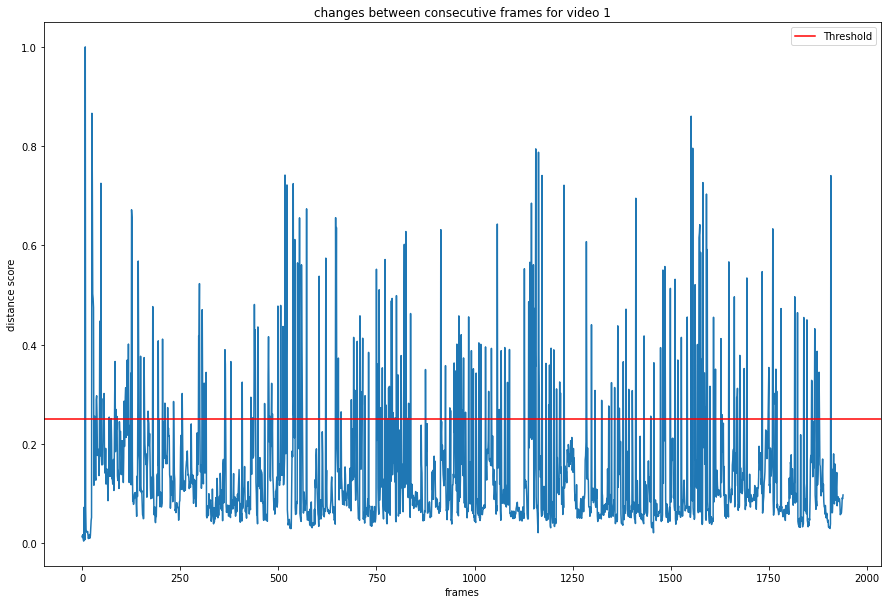

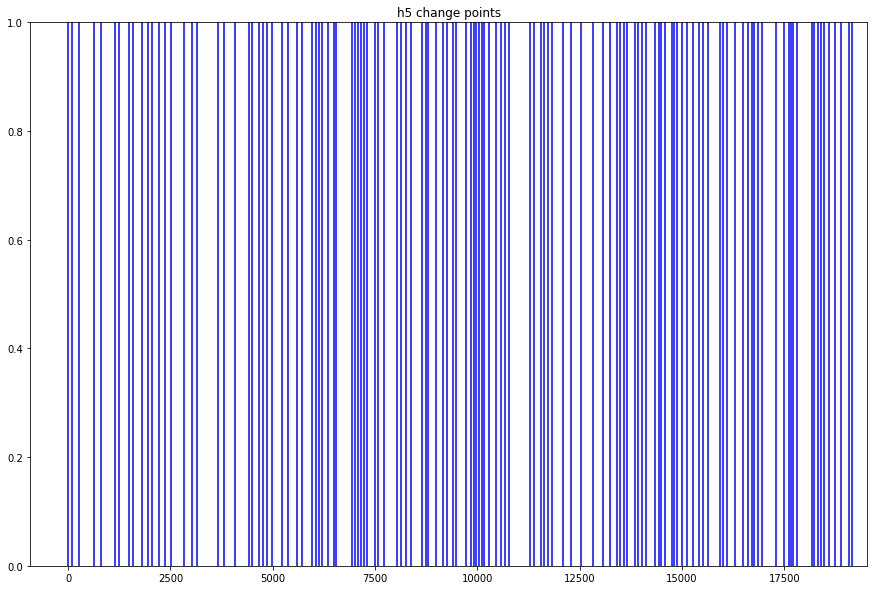

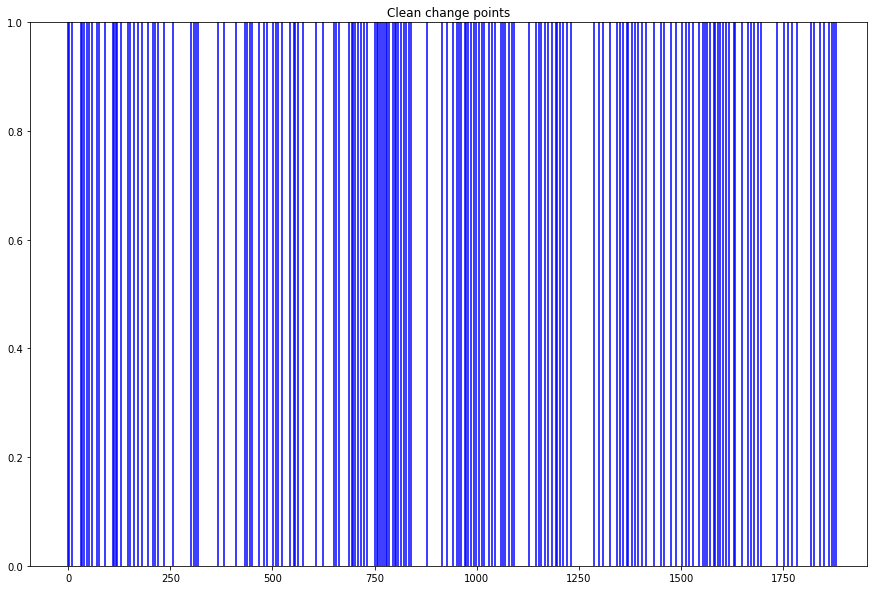

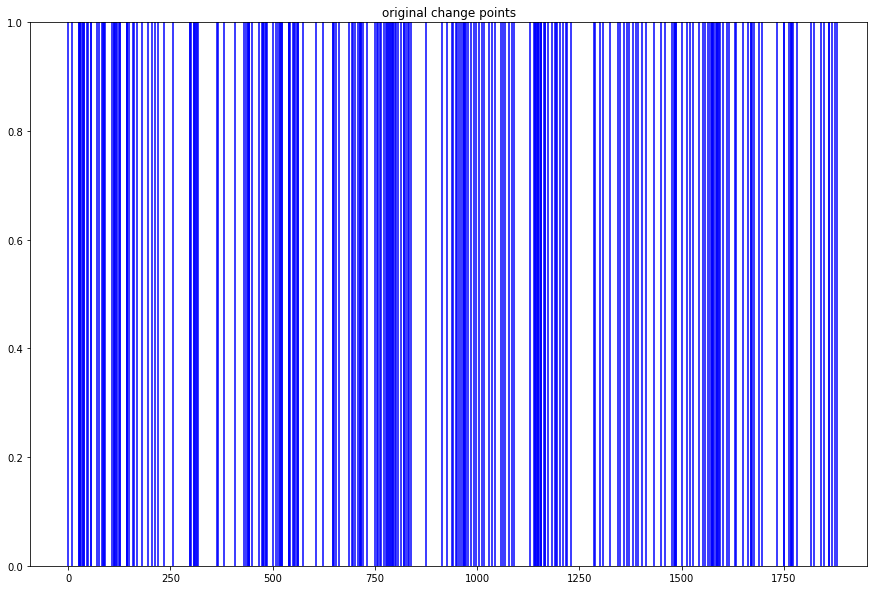

Video -  22


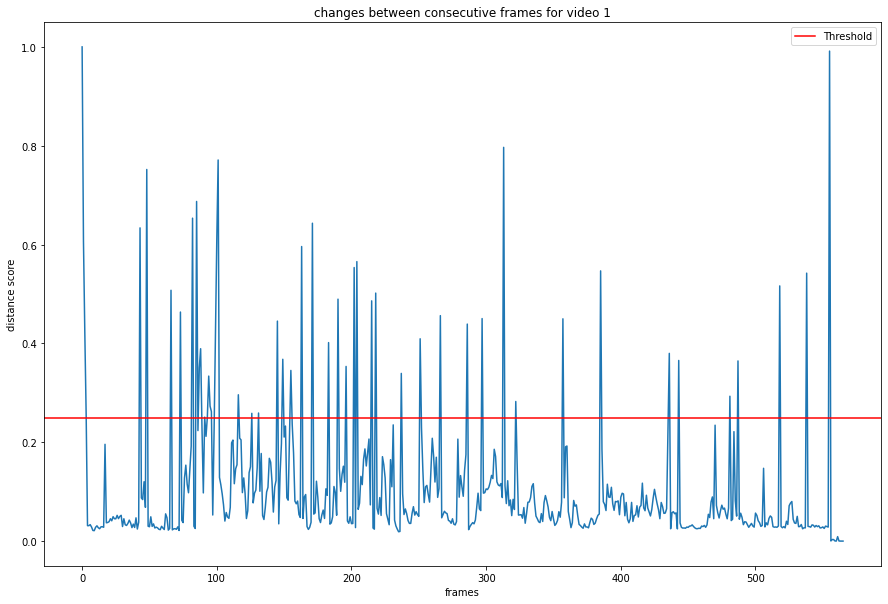

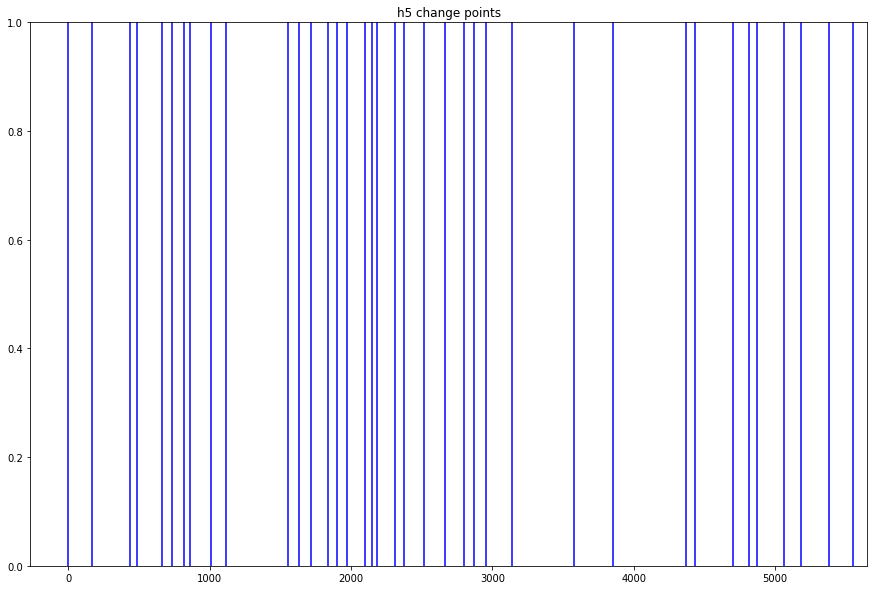

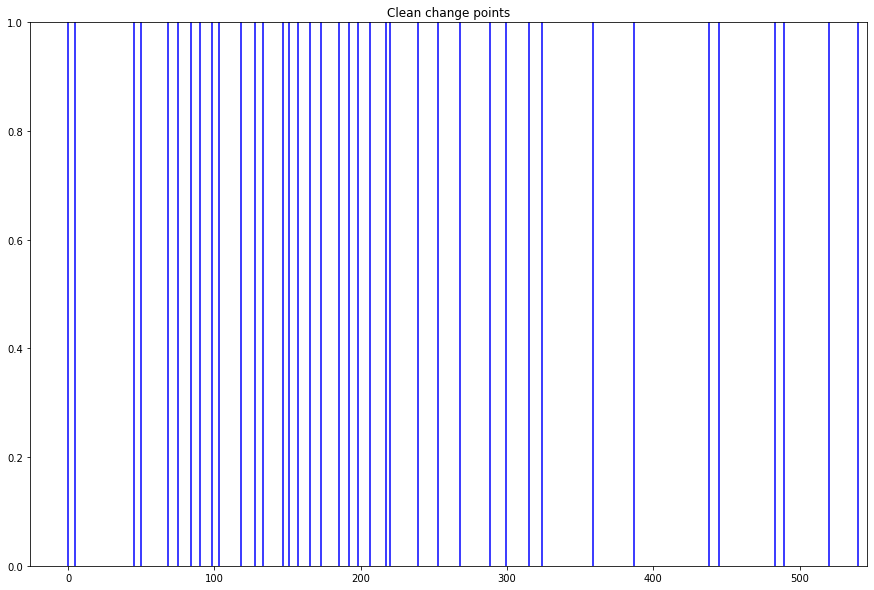

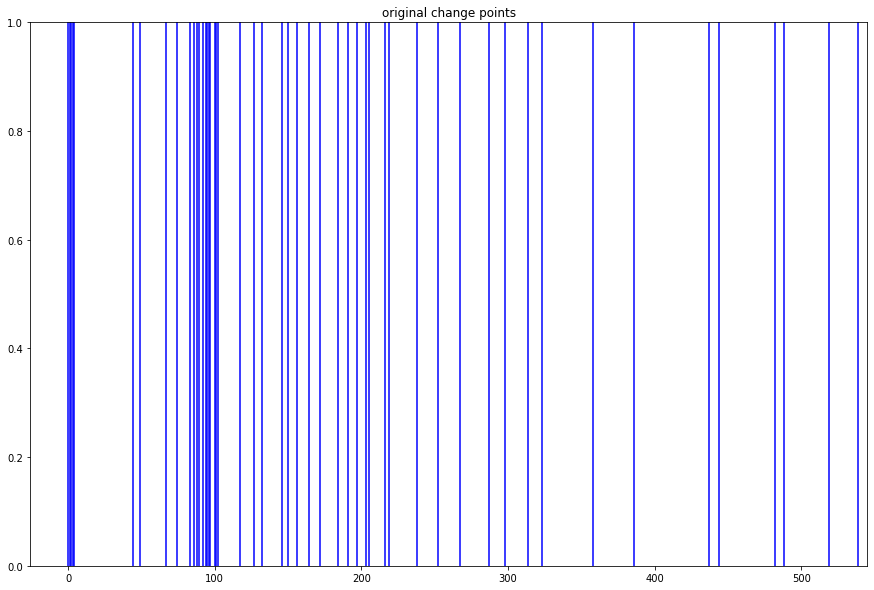

Video -  23


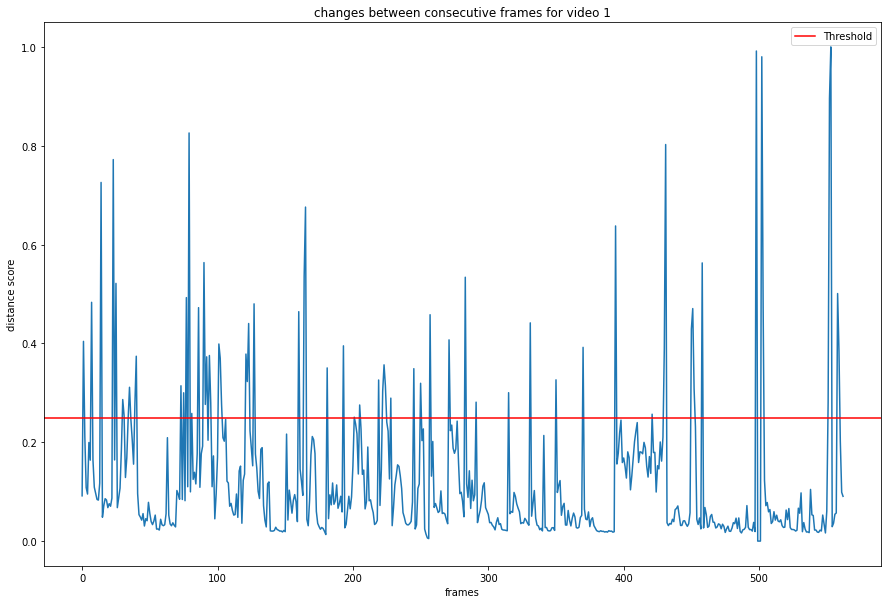

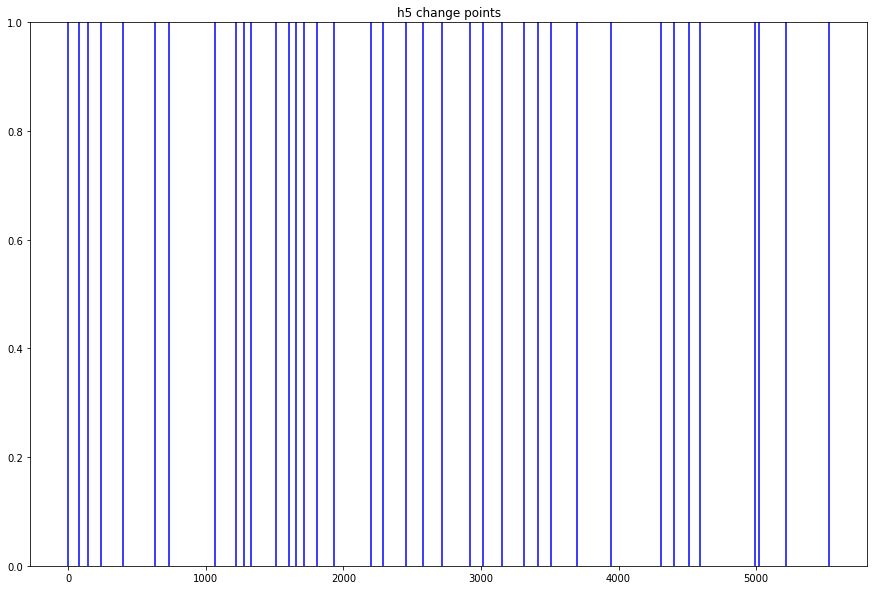

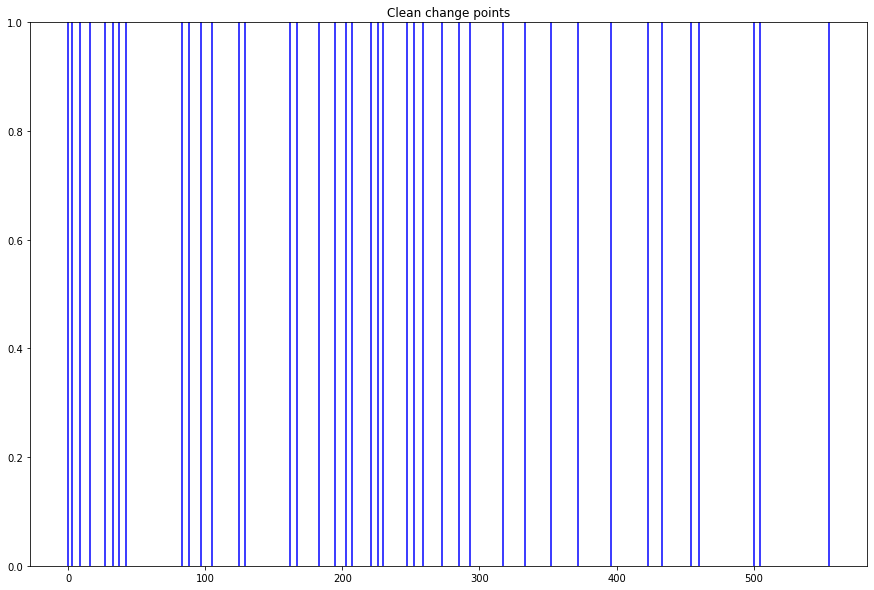

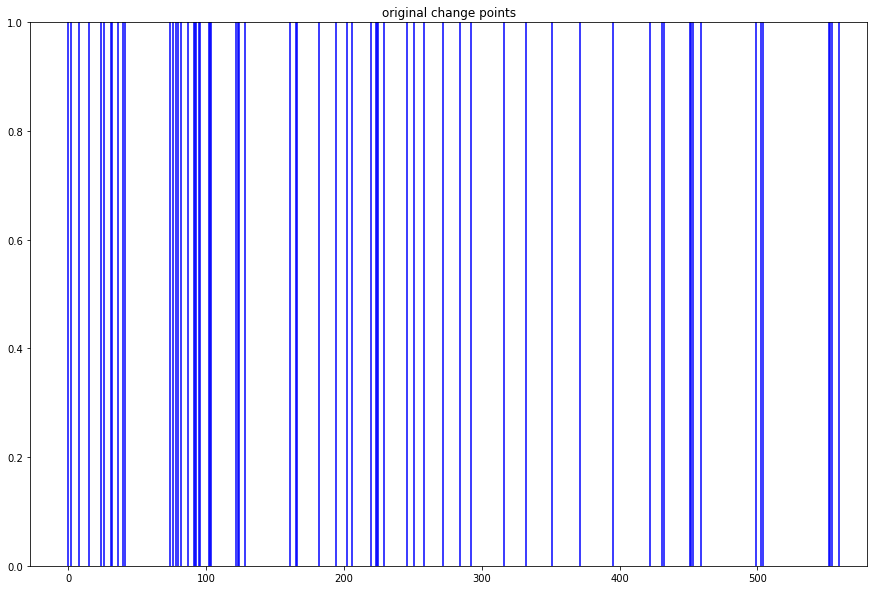

Video -  24


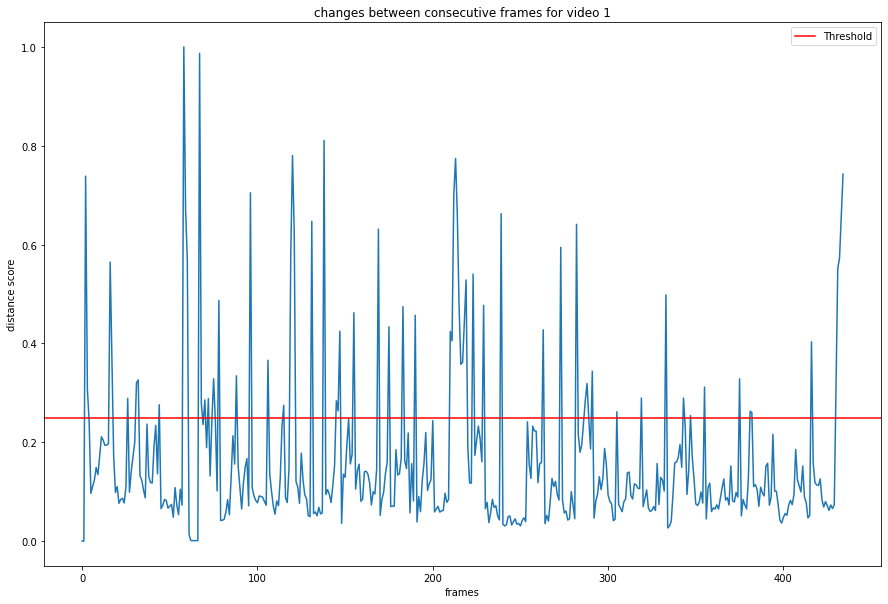

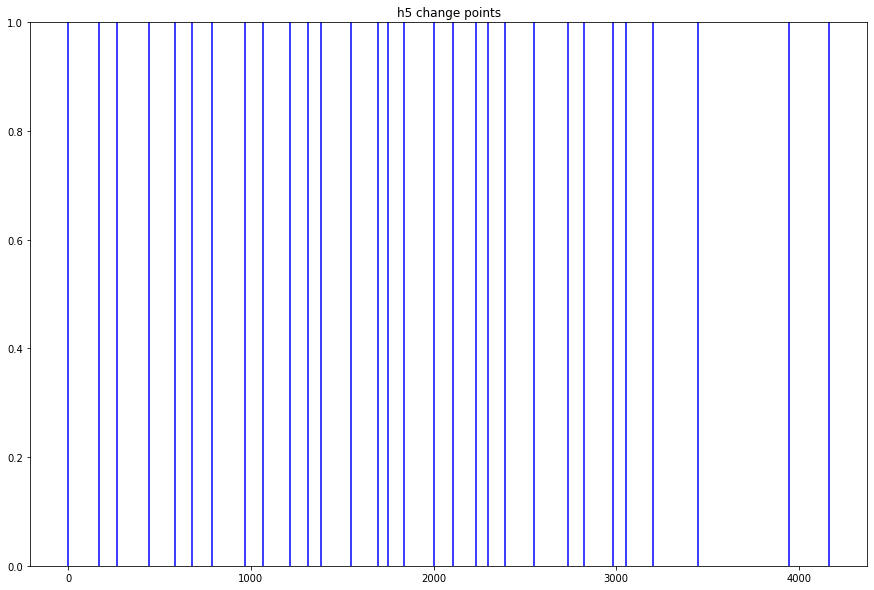

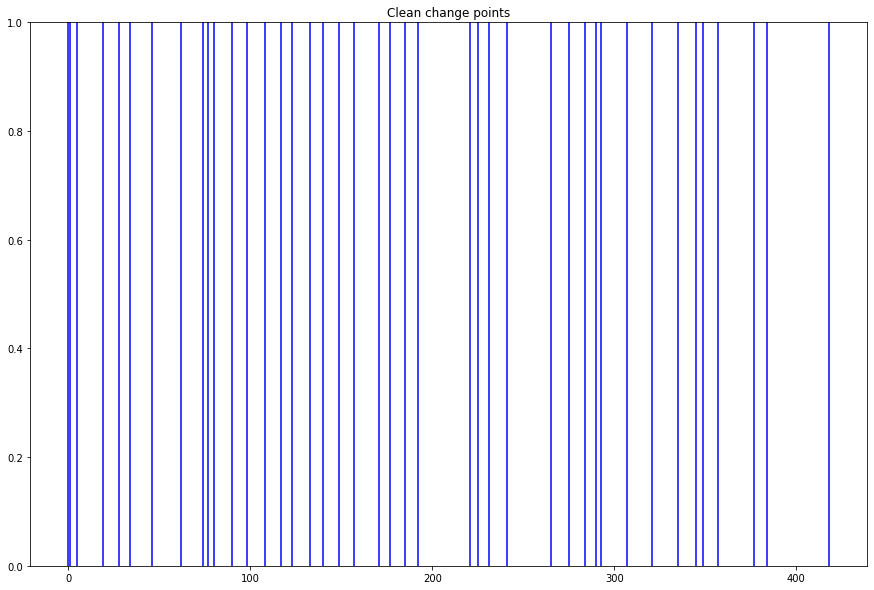

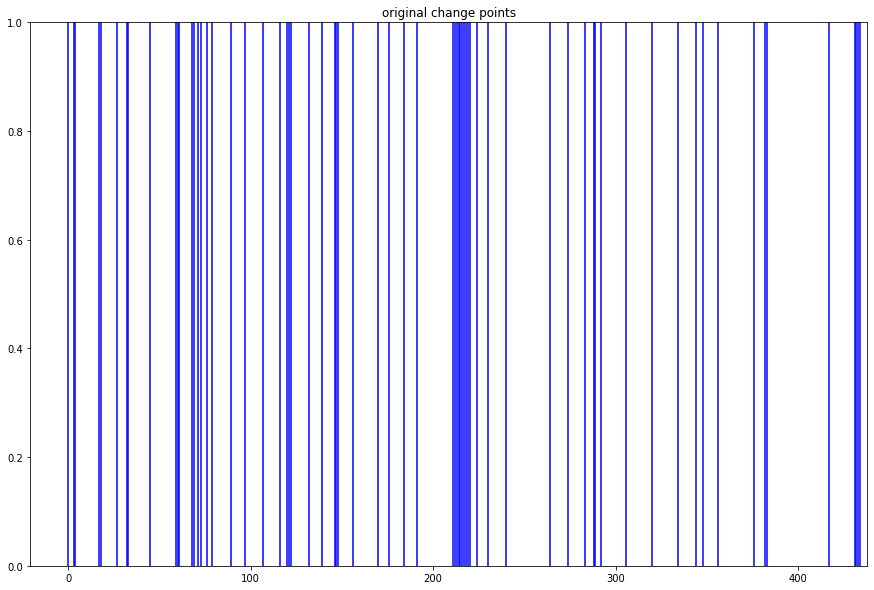

Video -  25


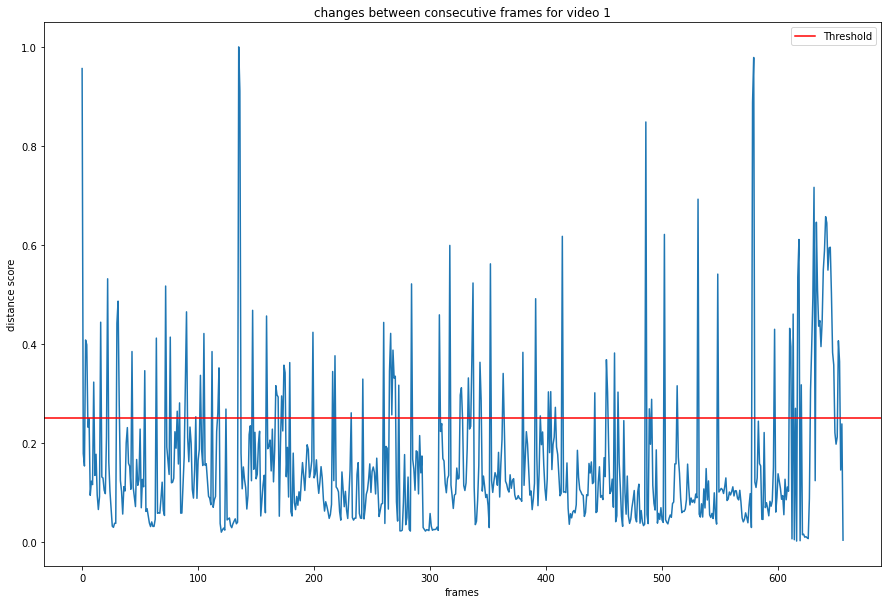

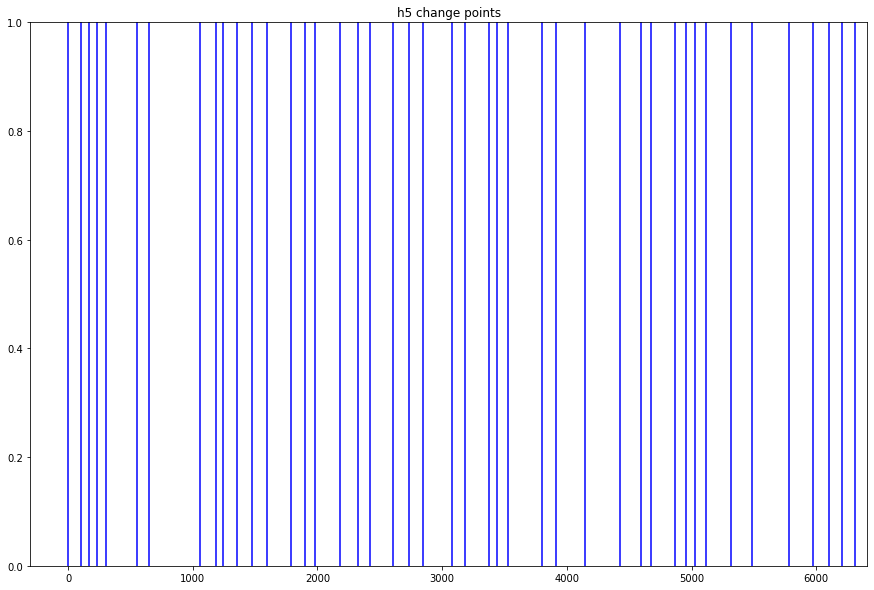

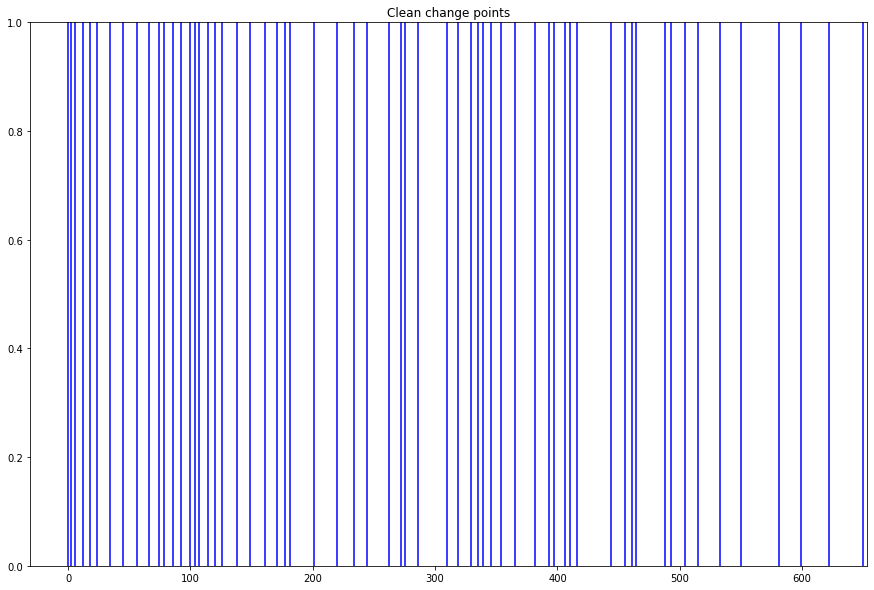

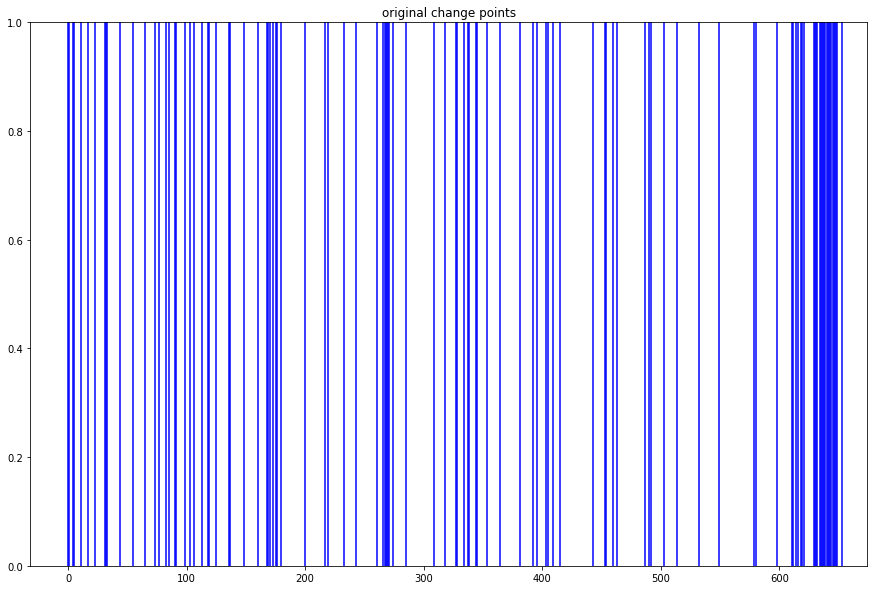

Video -  26


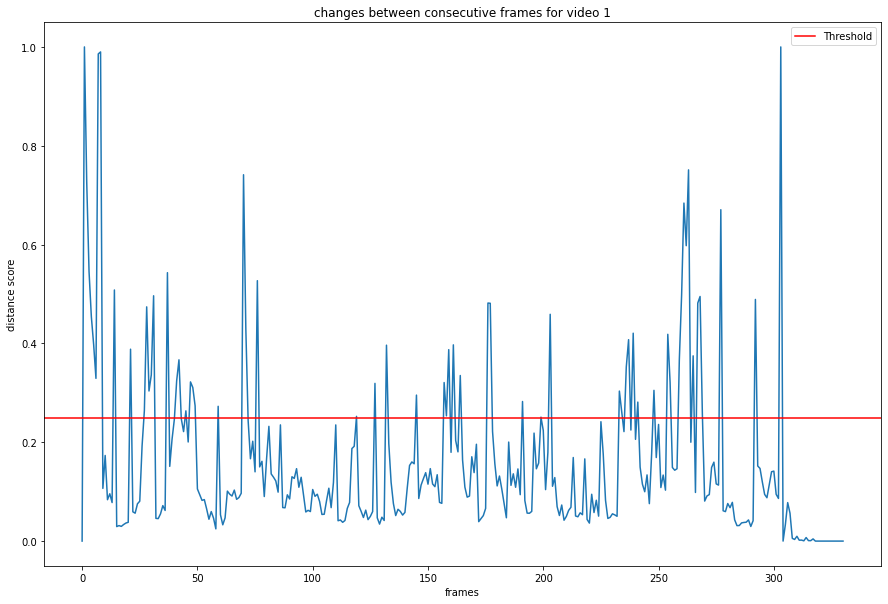

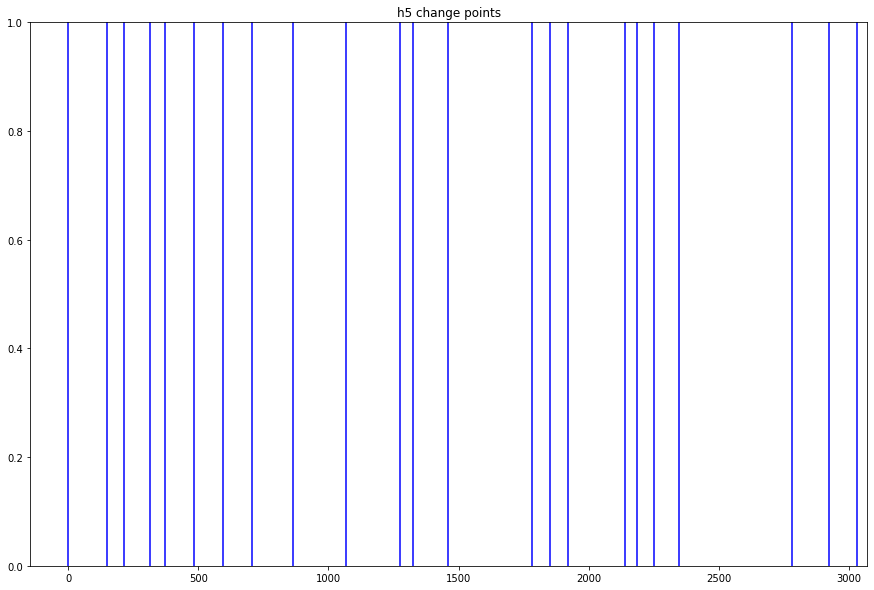

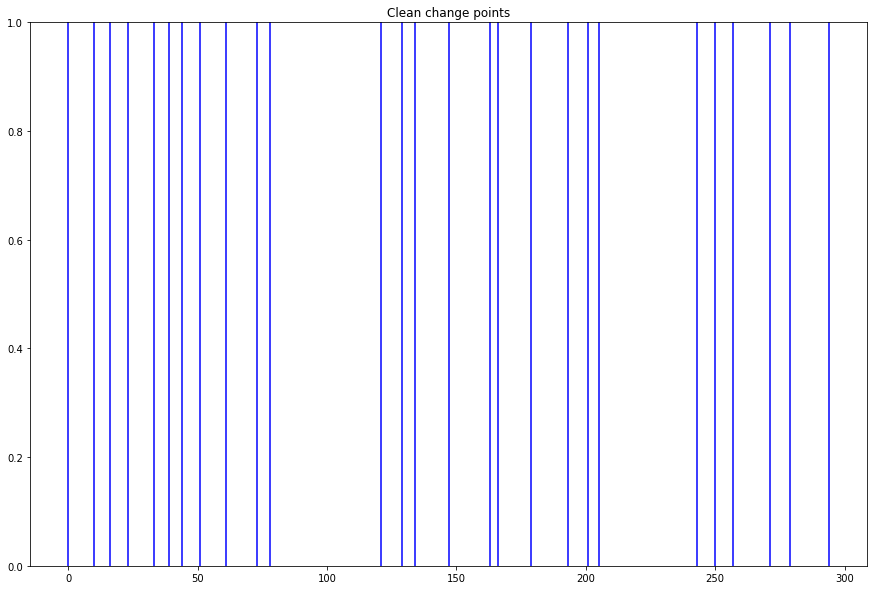

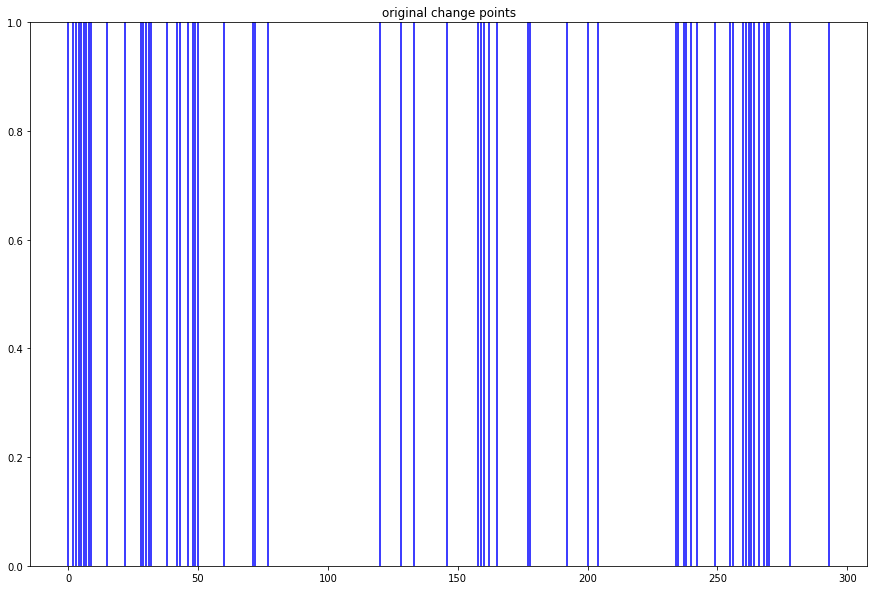

Video -  27


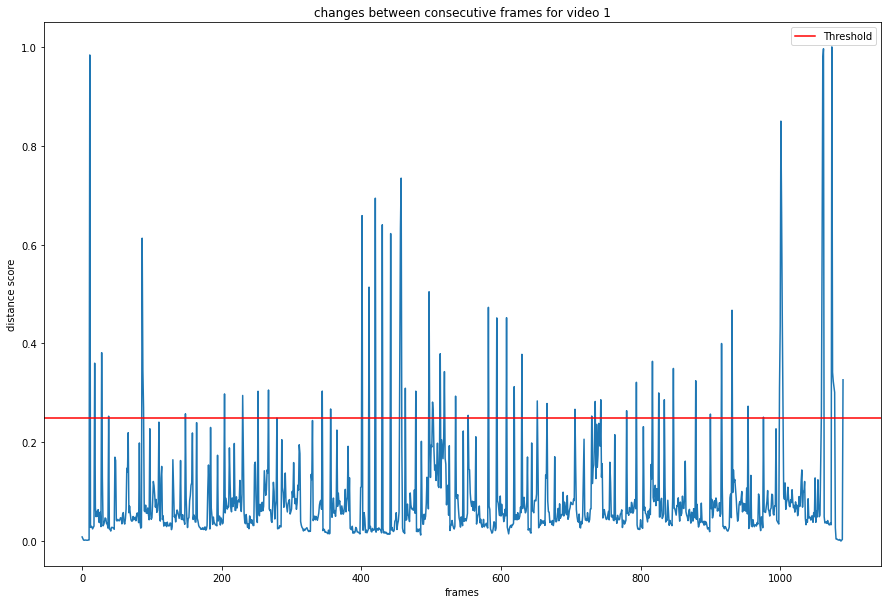

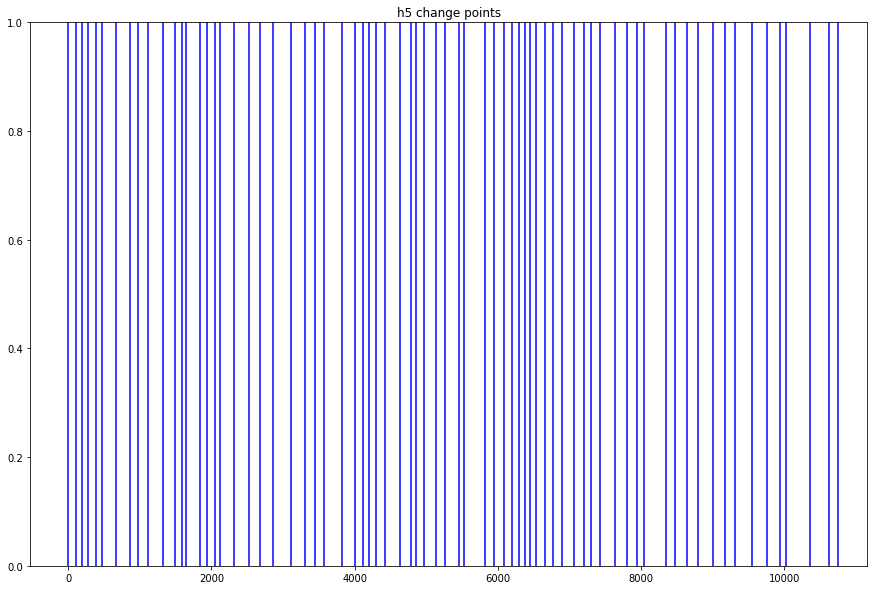

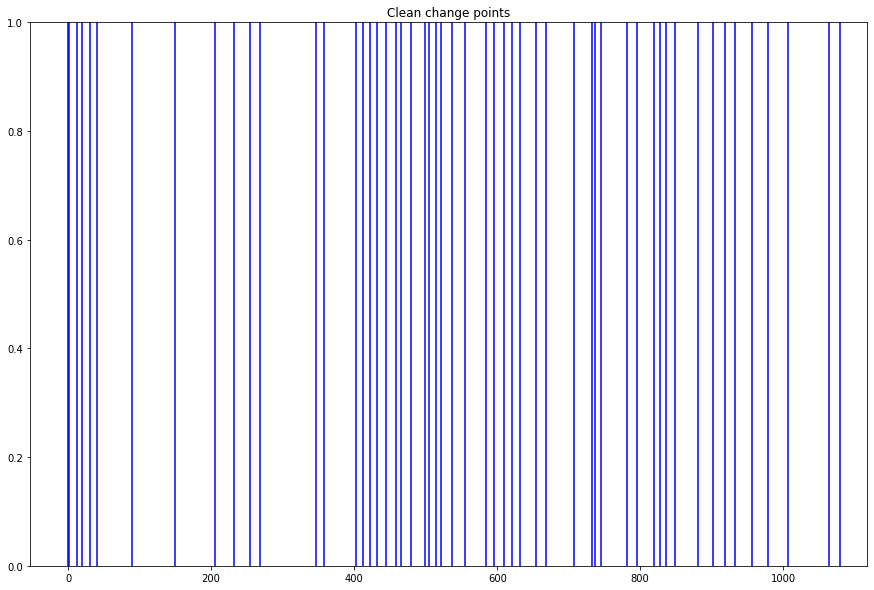

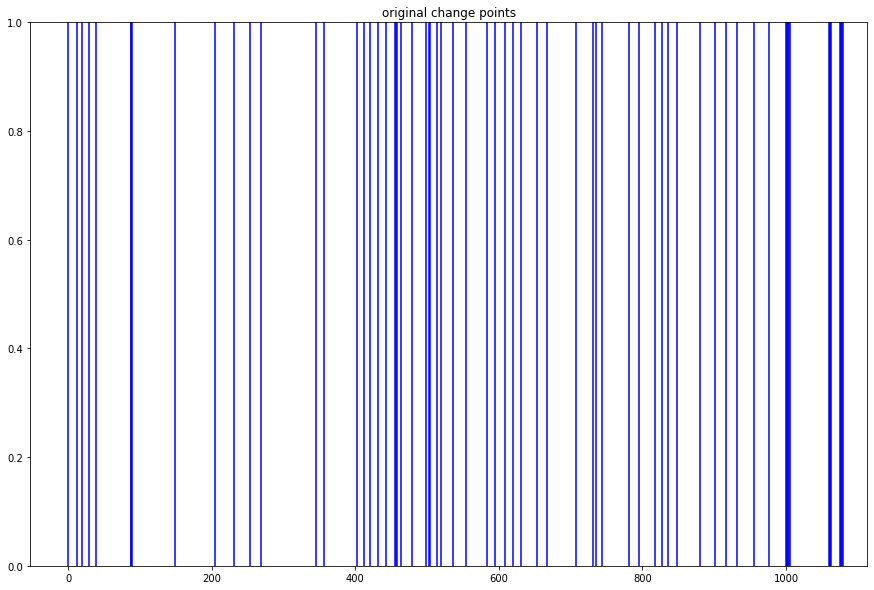

Video -  28


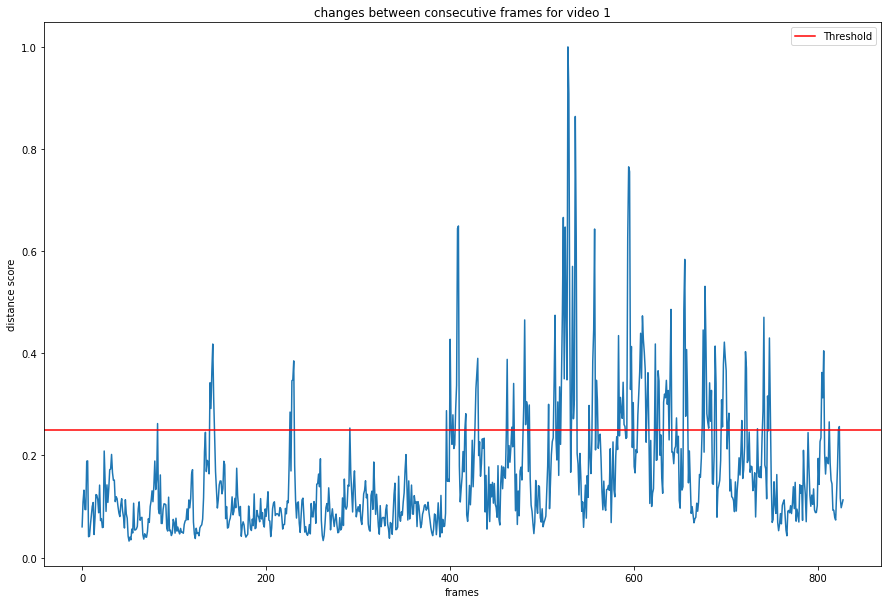

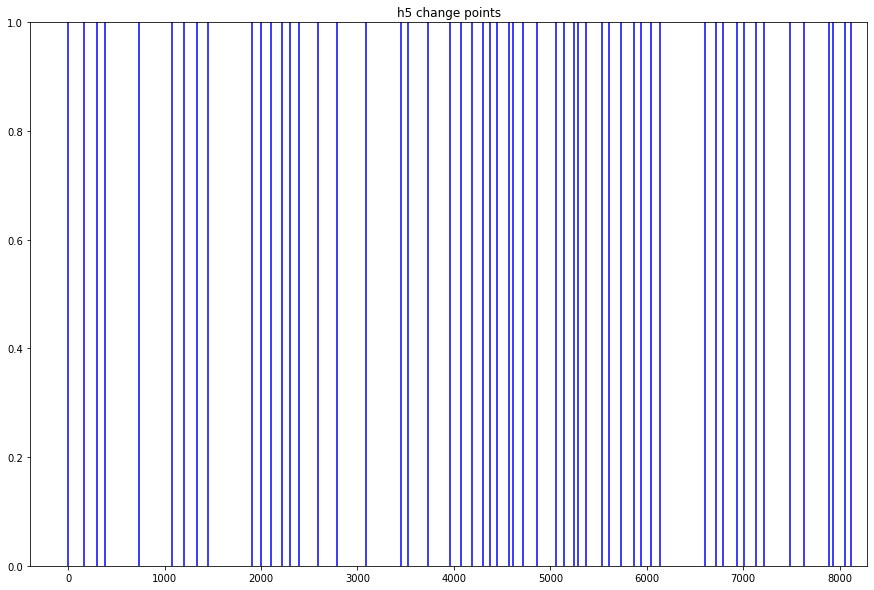

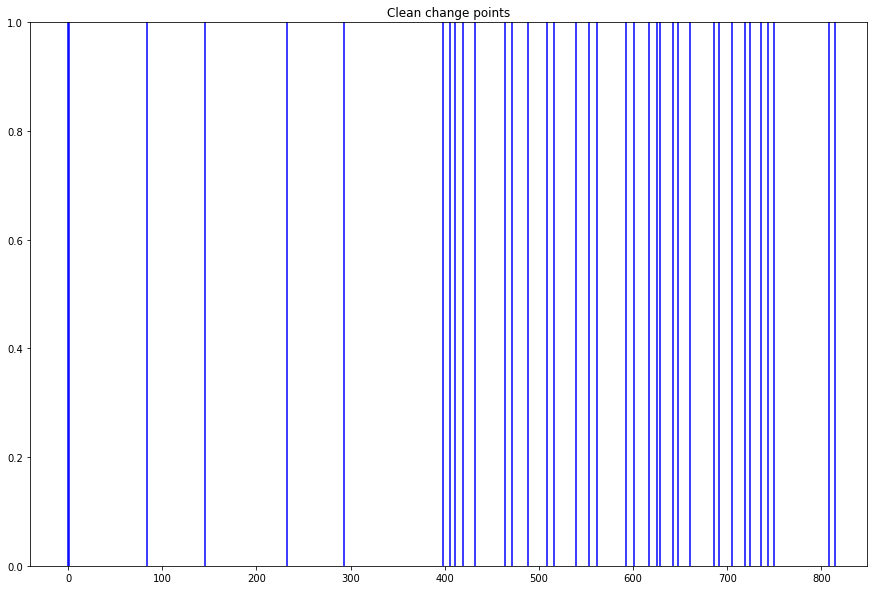

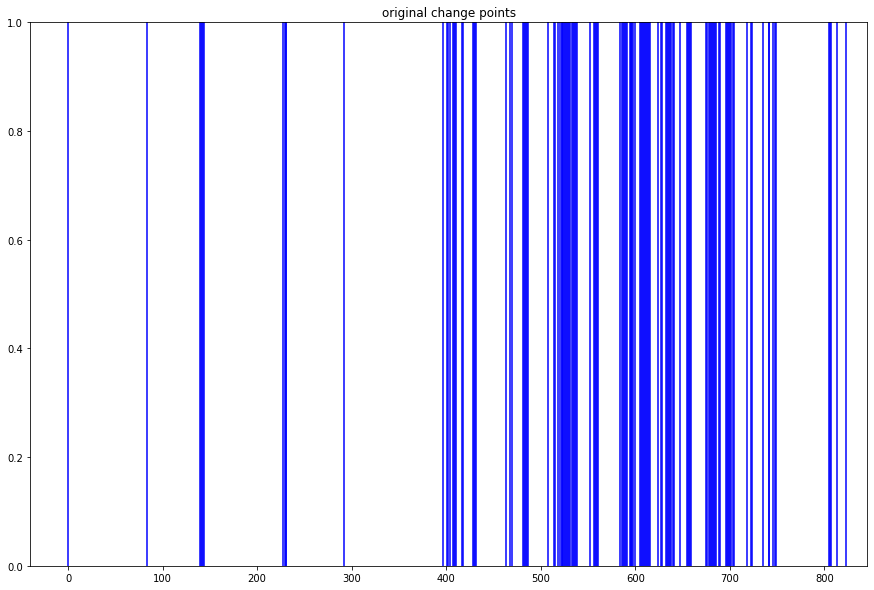

Video -  29


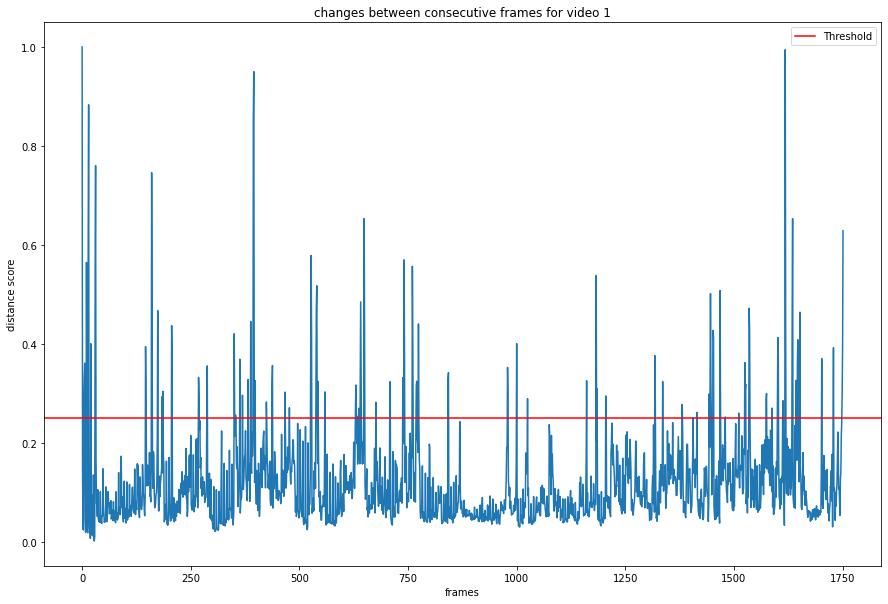

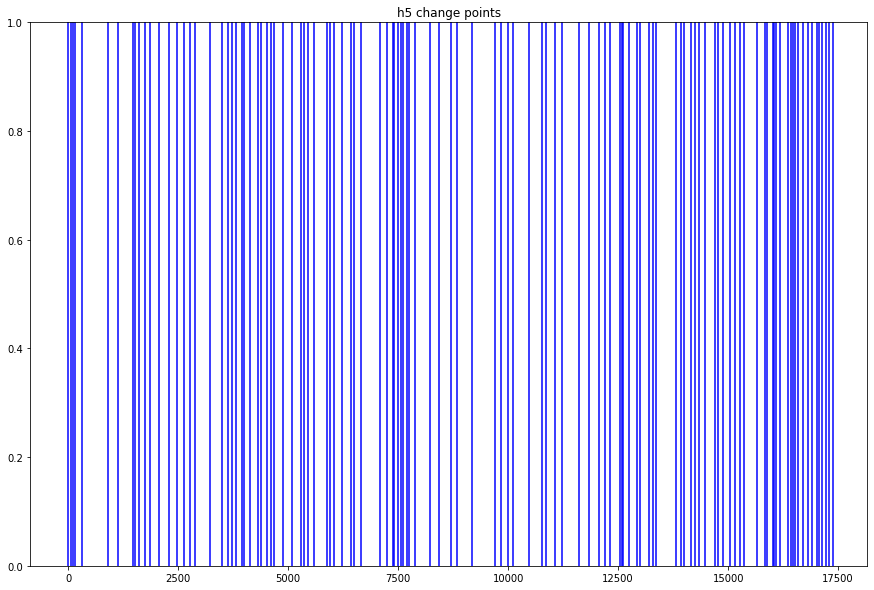

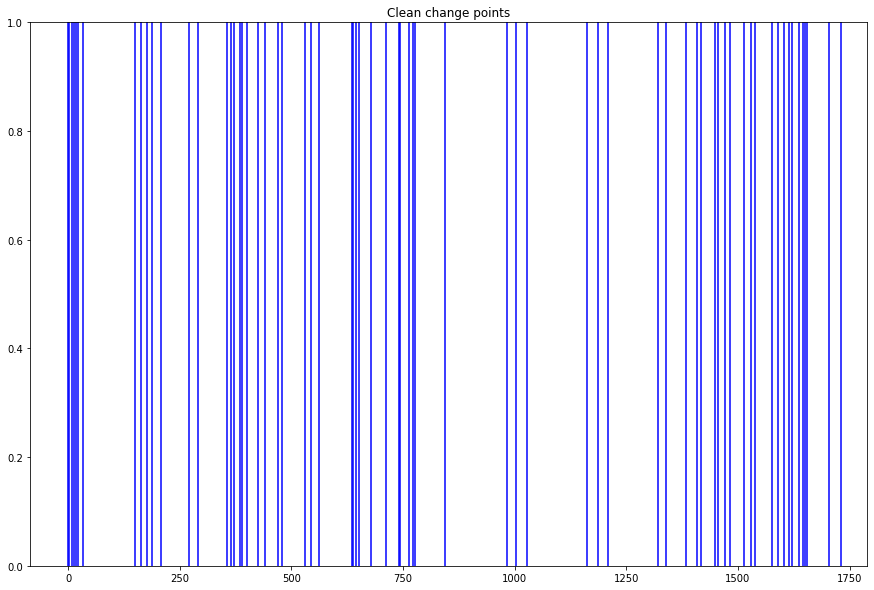

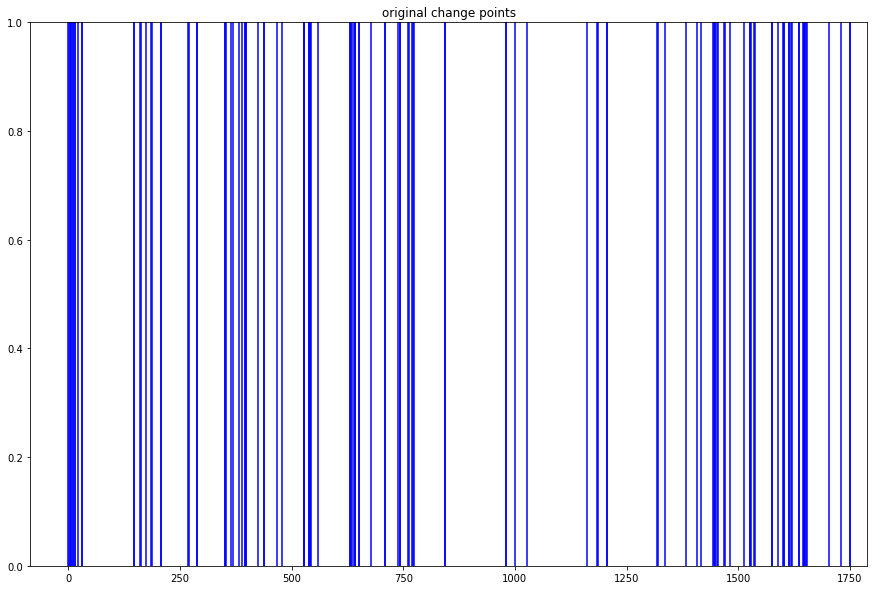

Video -  30


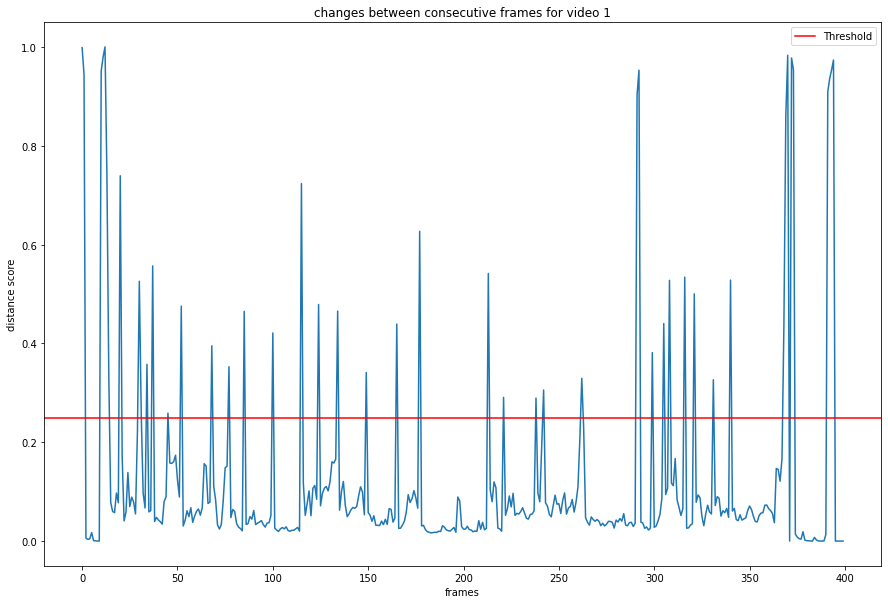

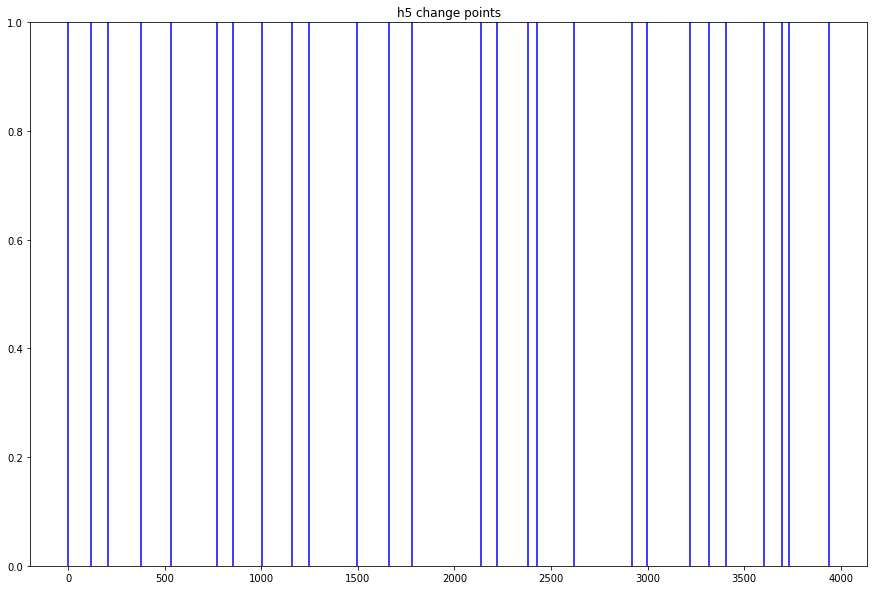

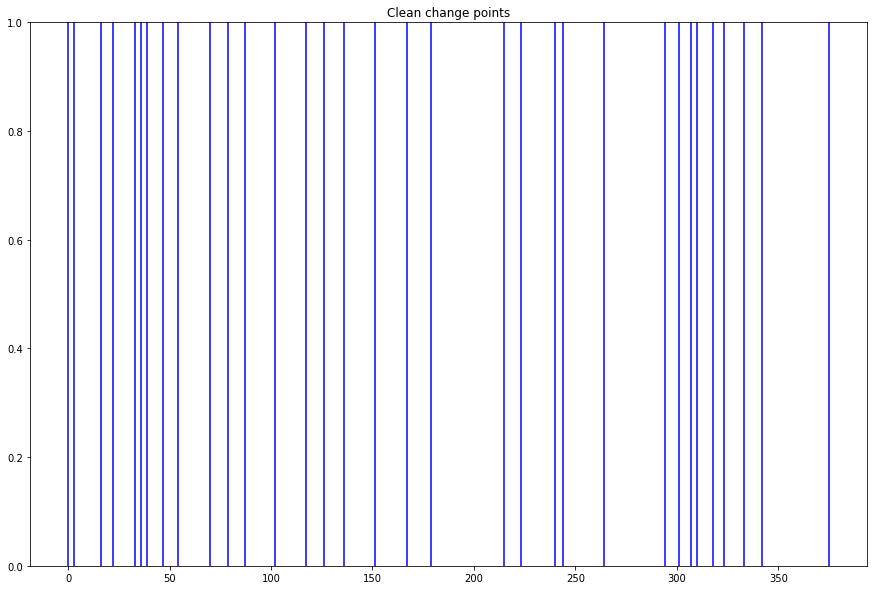

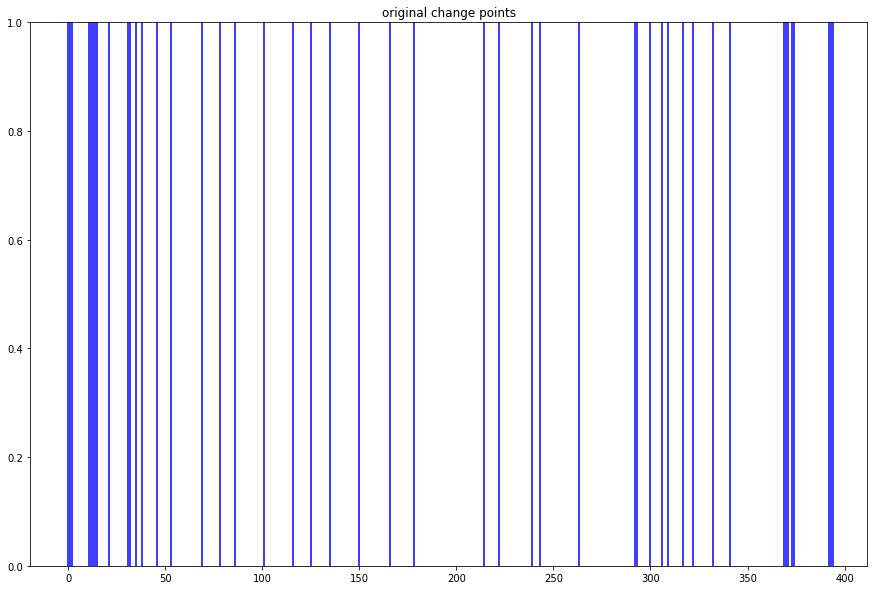

Video -  31


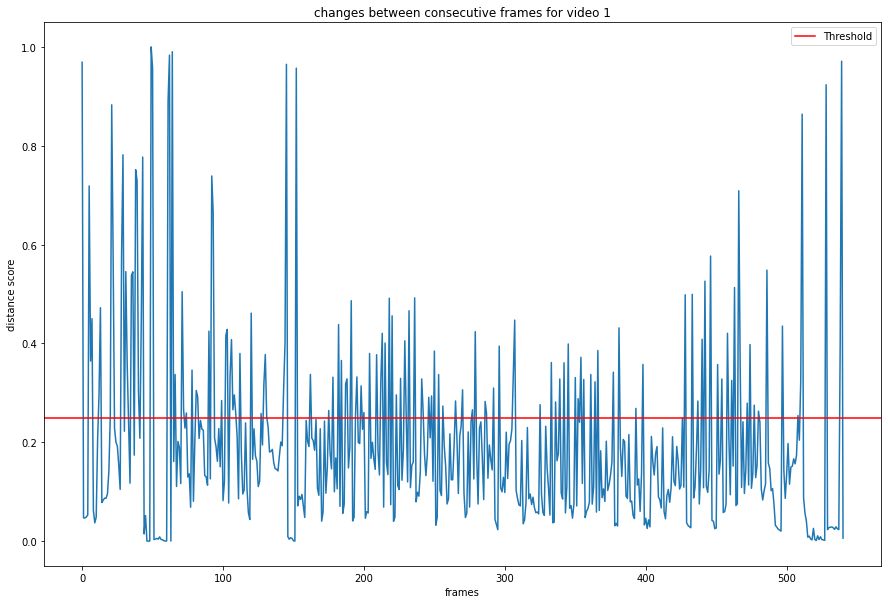

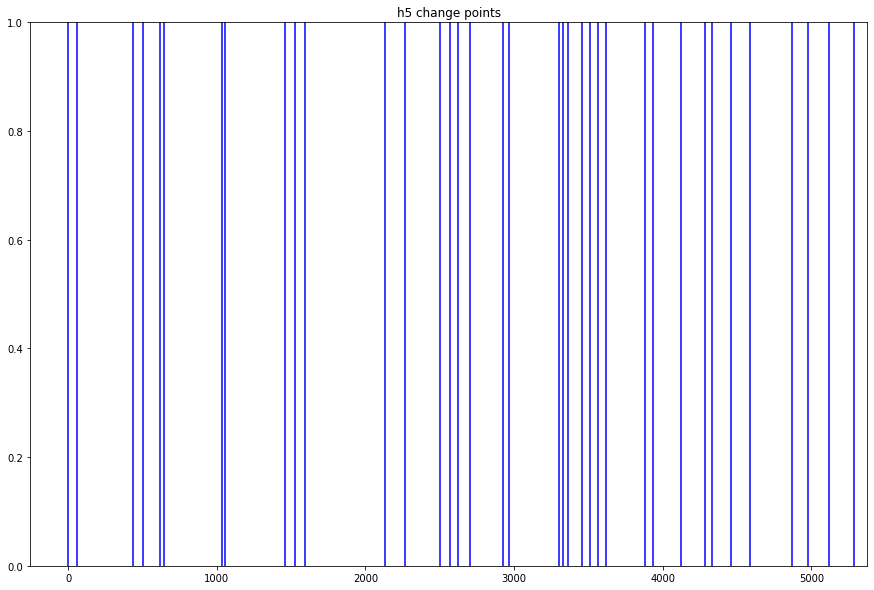

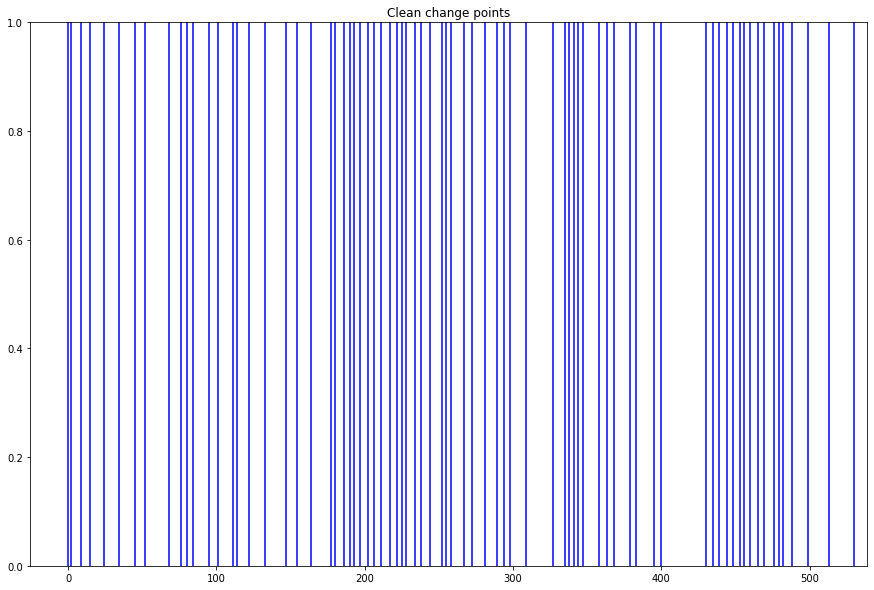

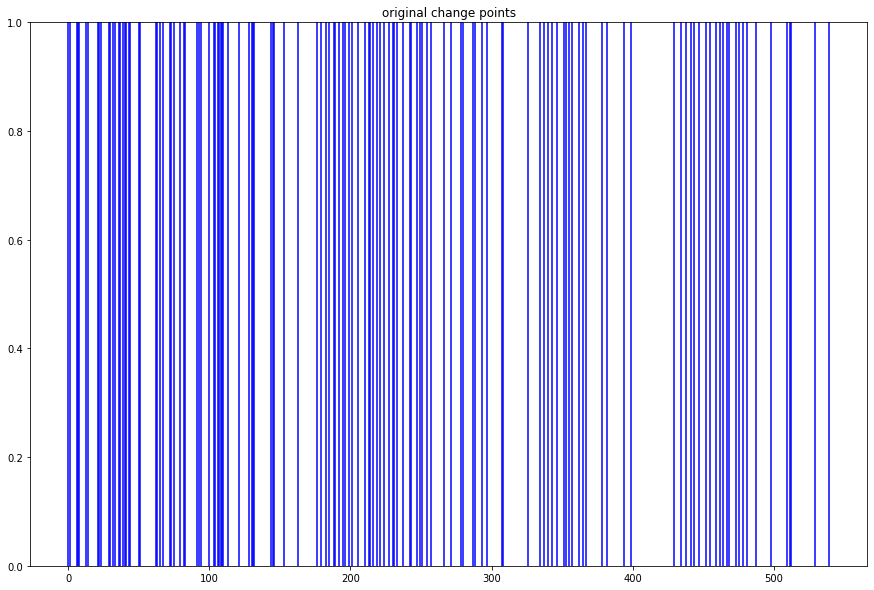

Video -  32


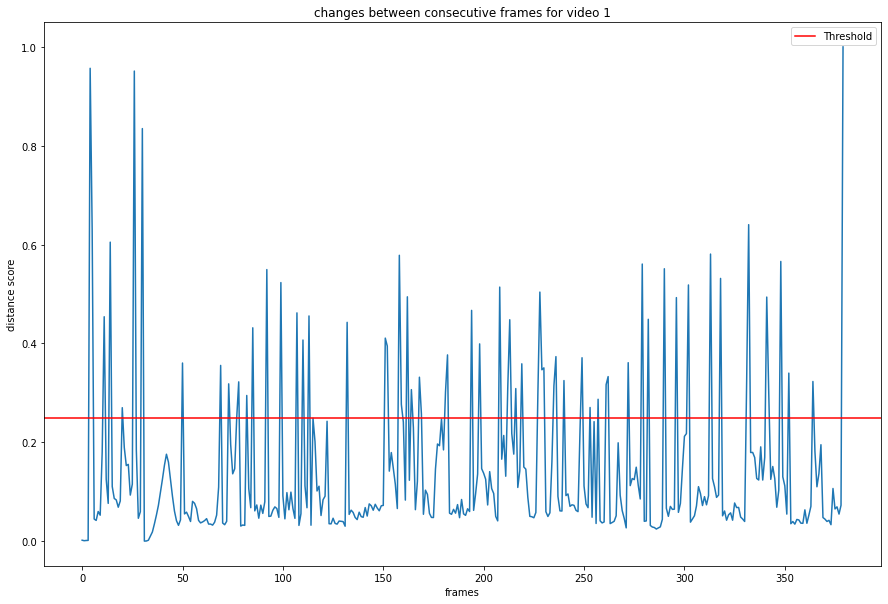

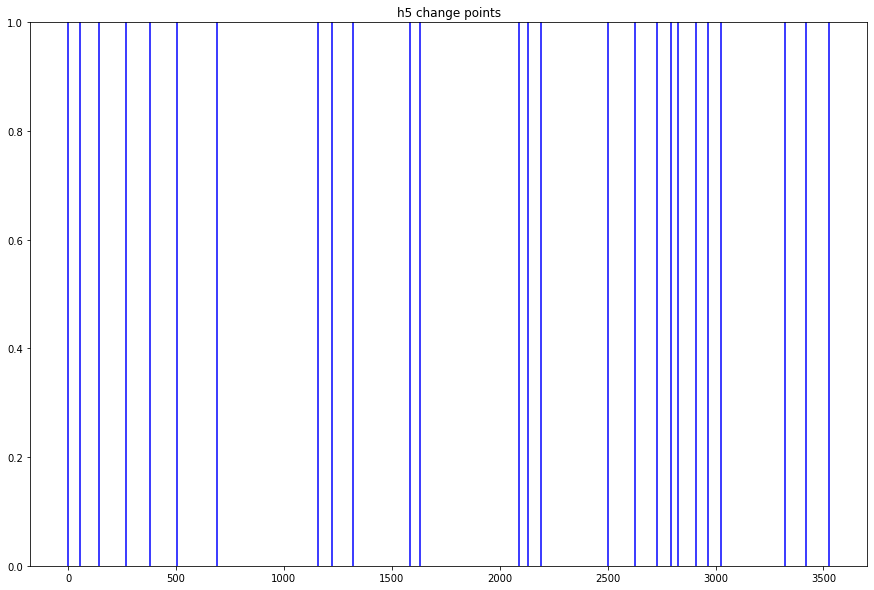

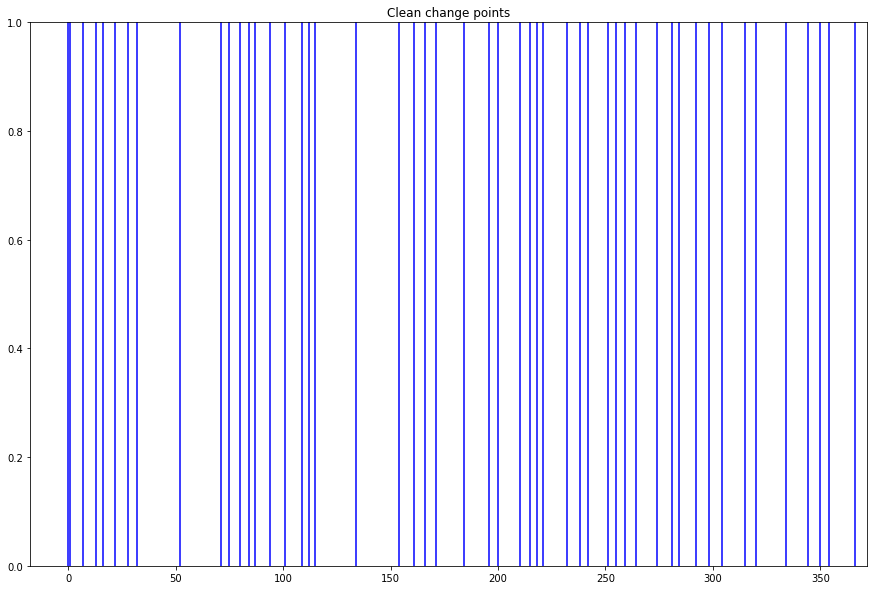

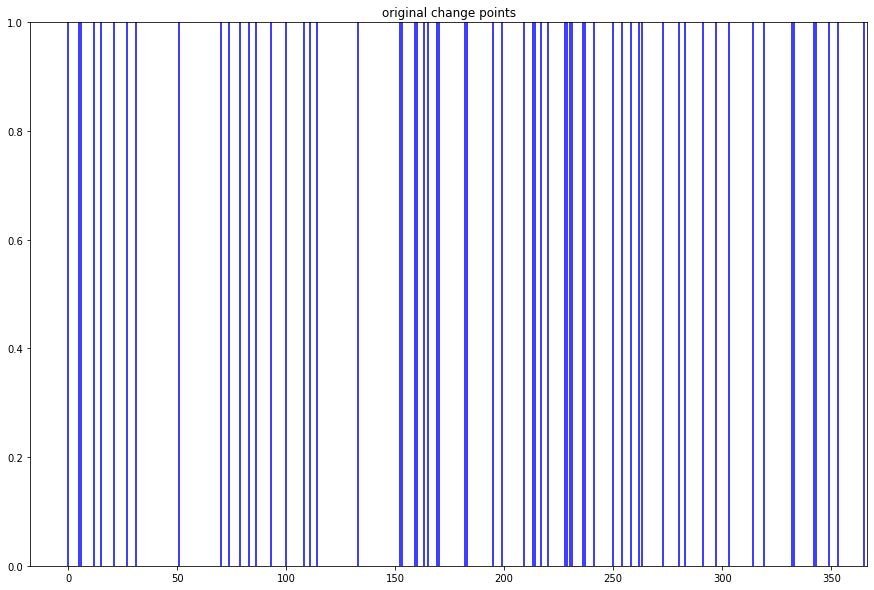

Video -  33


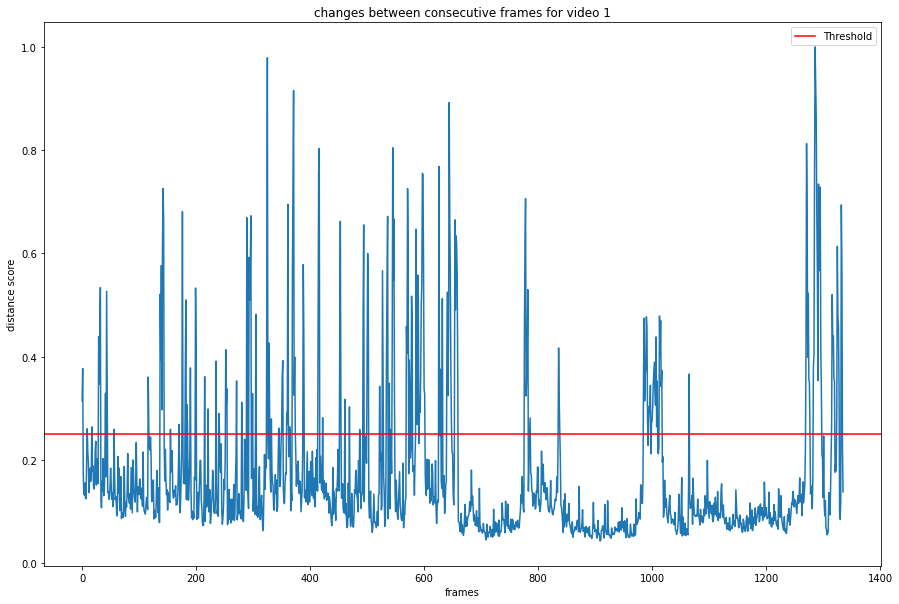

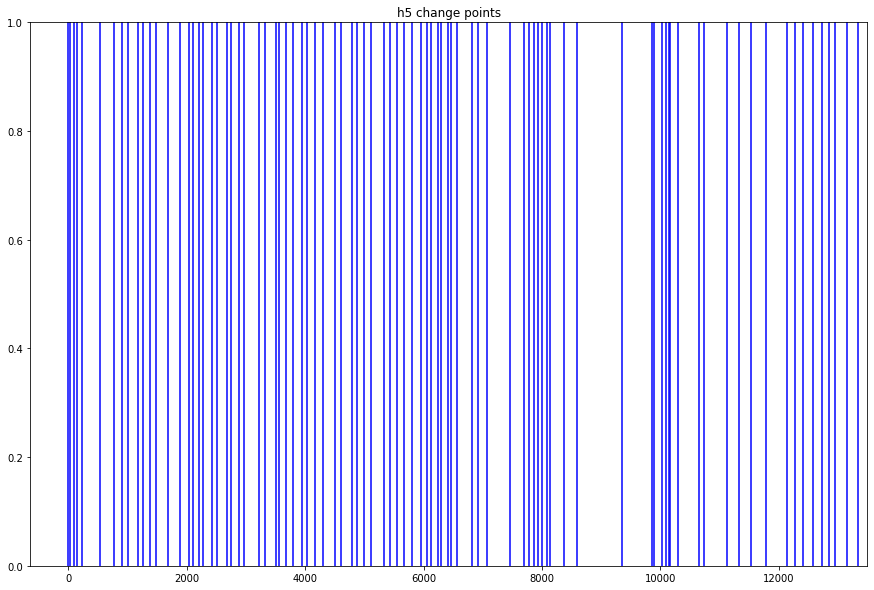

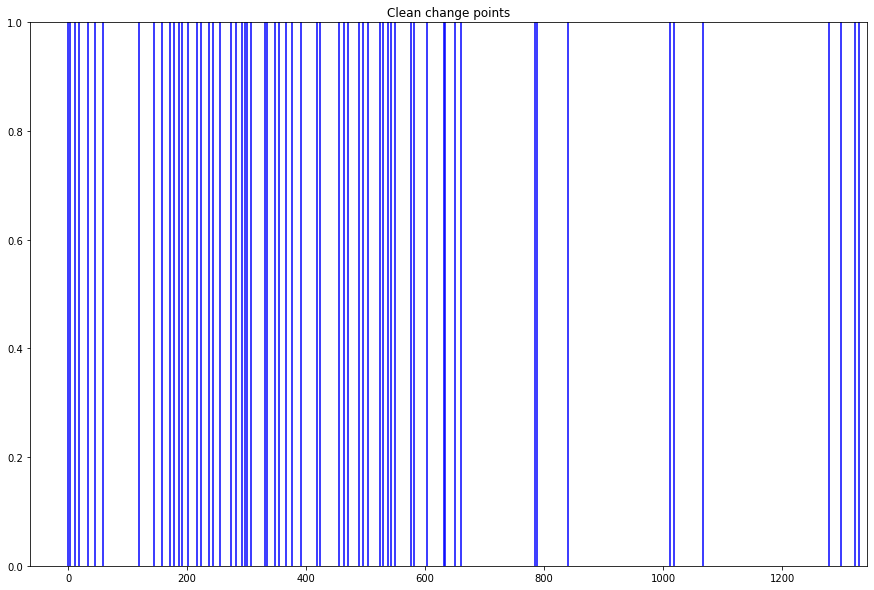

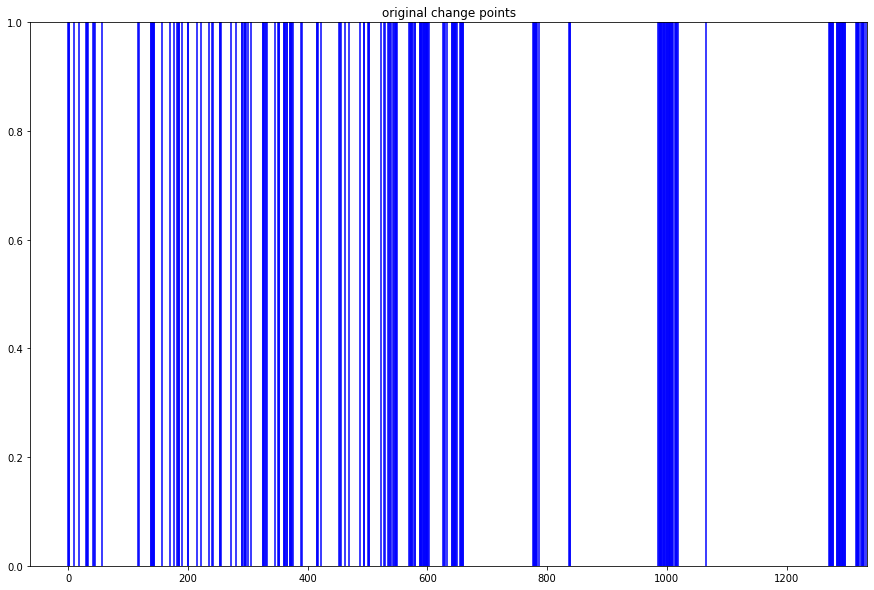

Video -  34


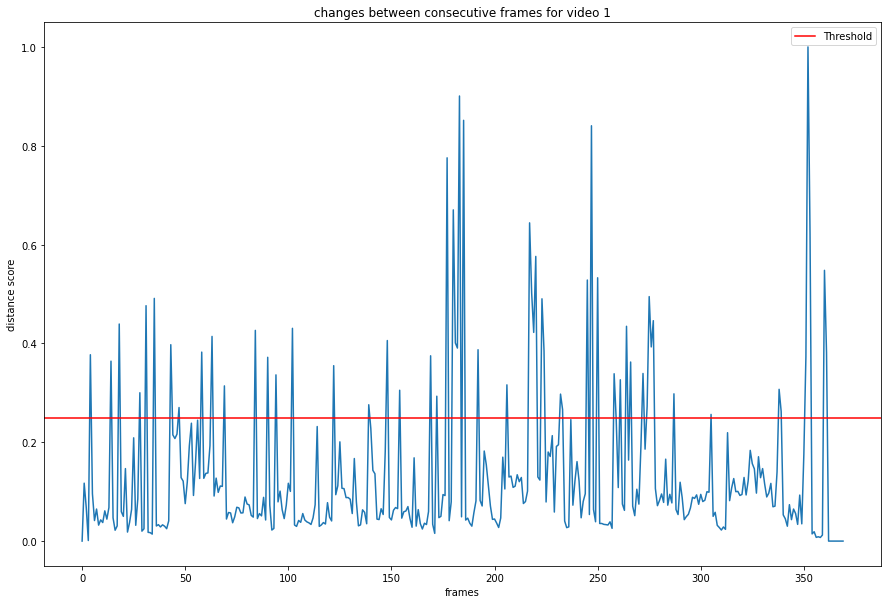

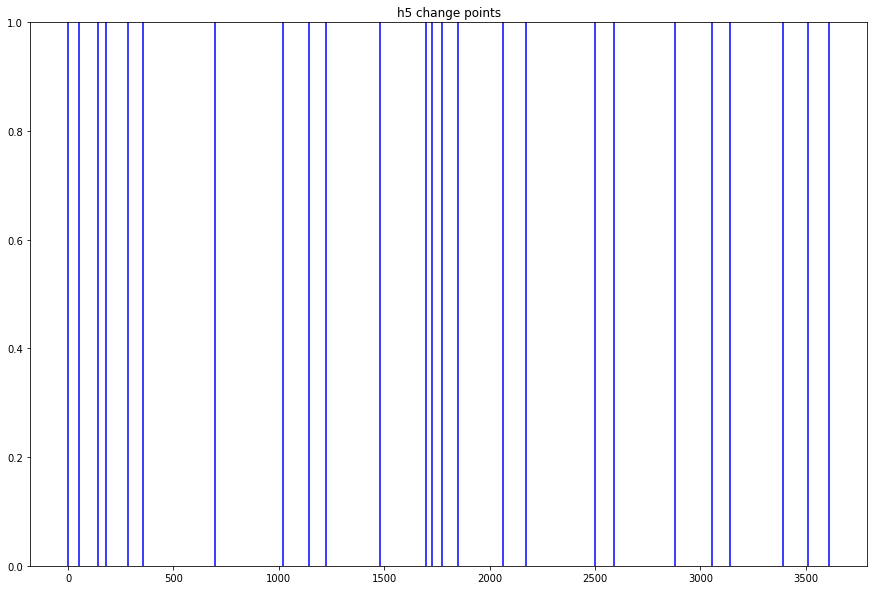

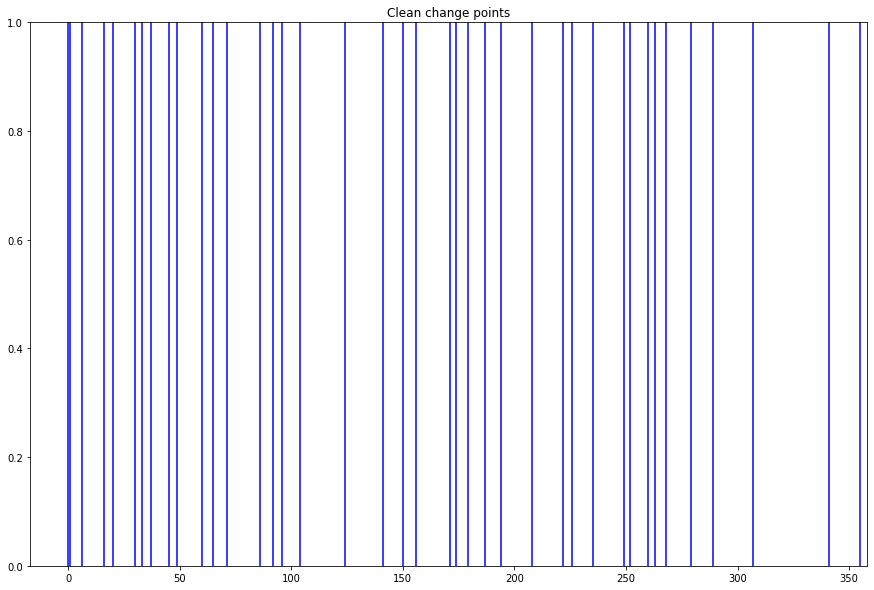

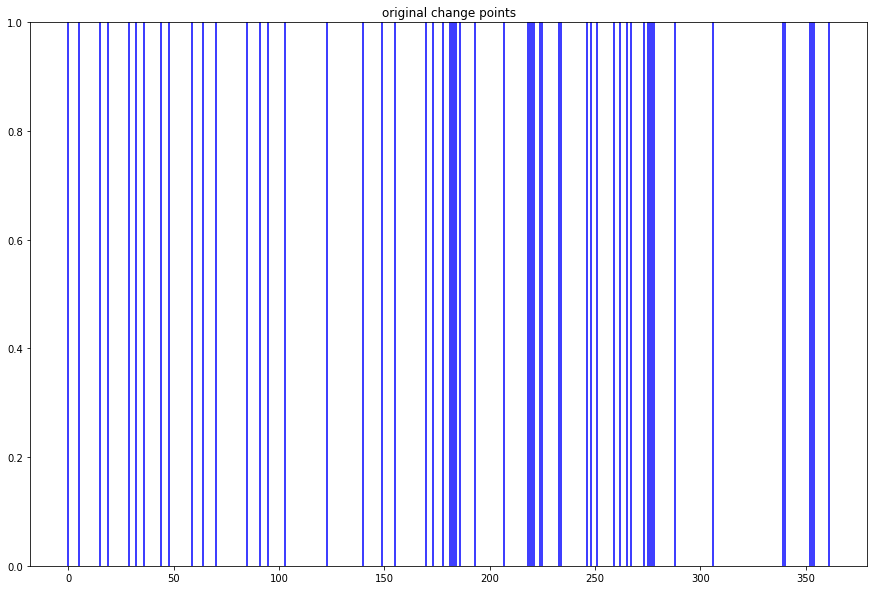

Video -  35


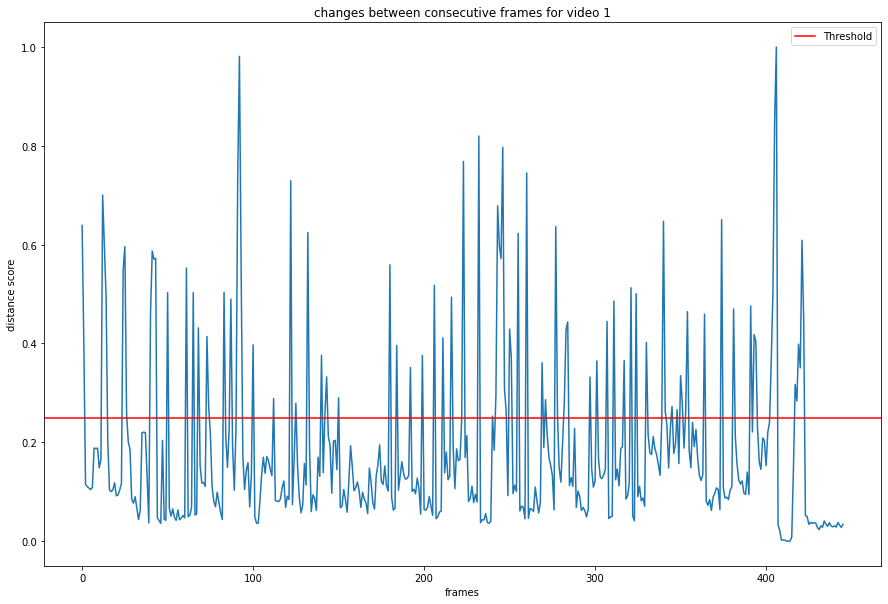

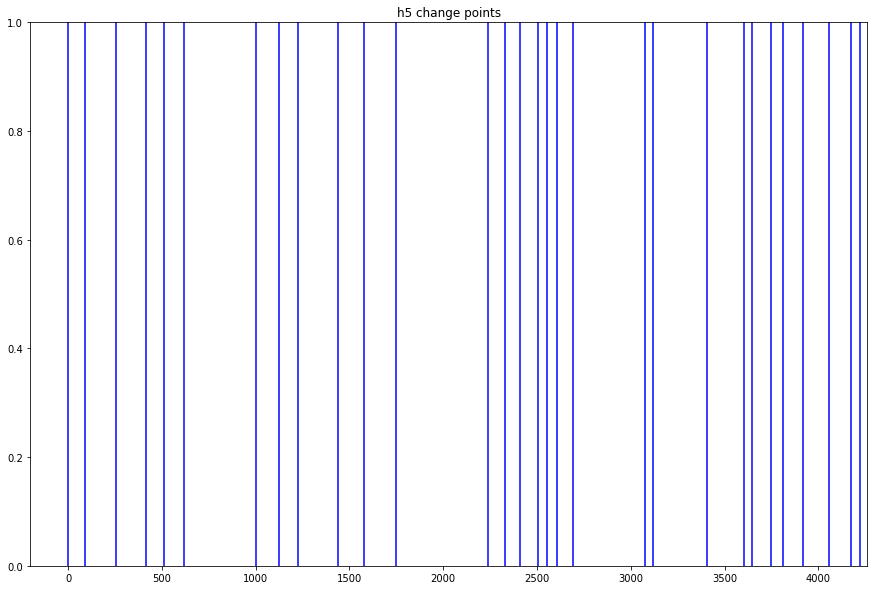

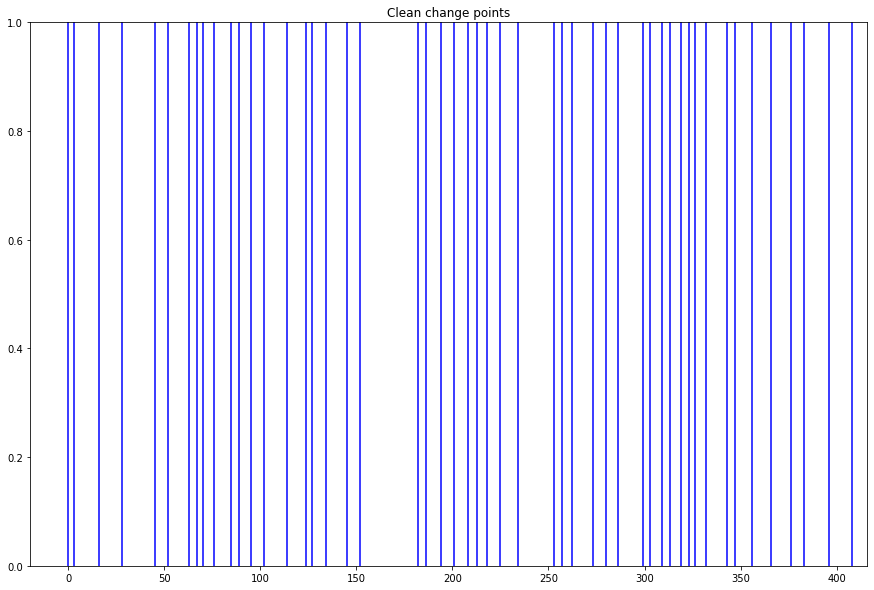

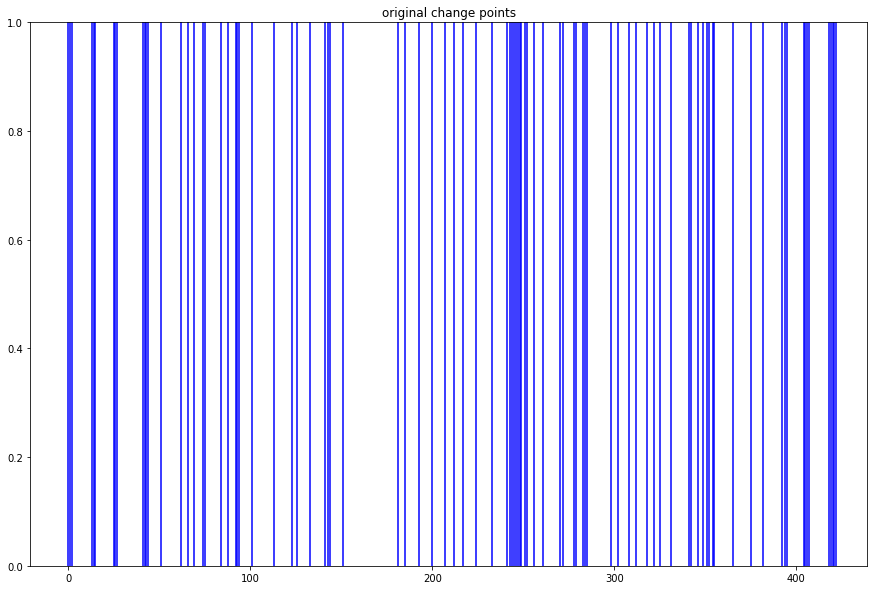

Video -  36


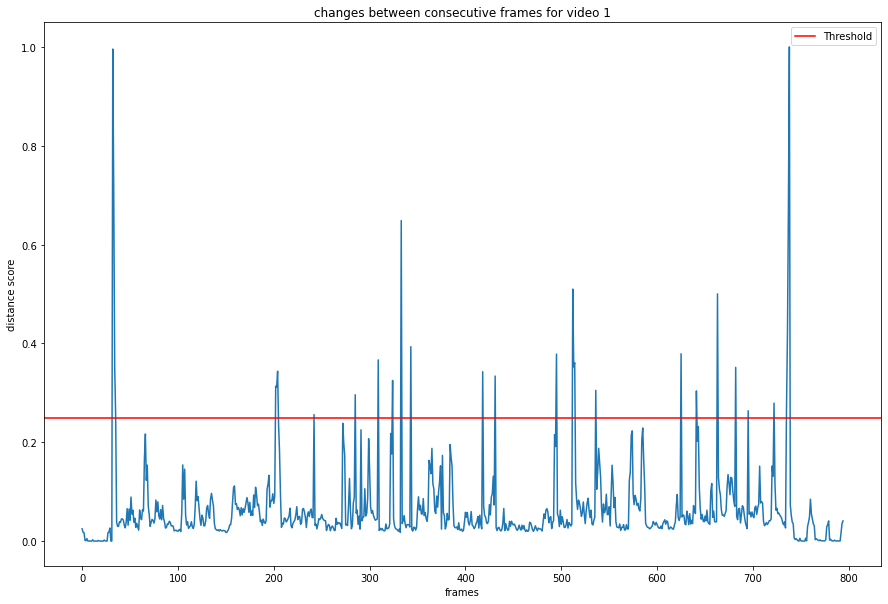

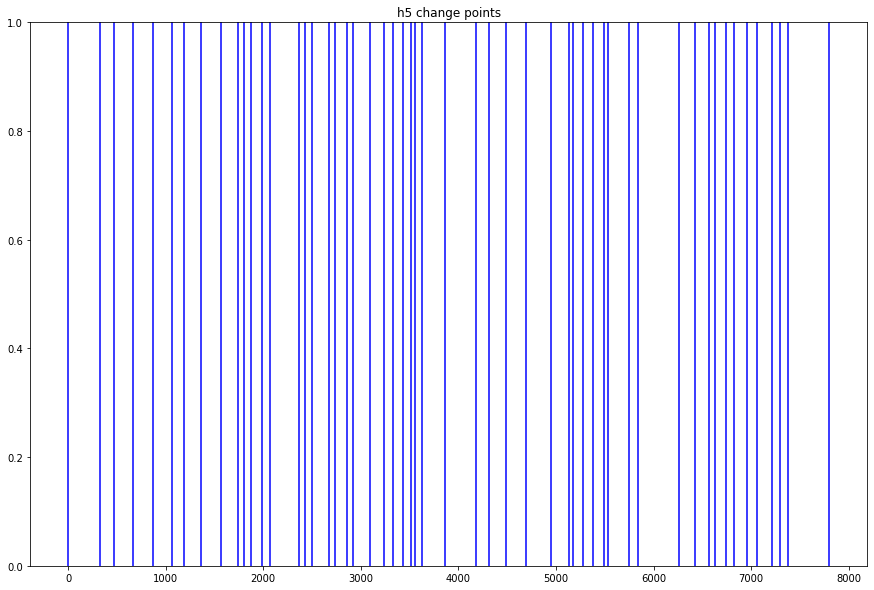

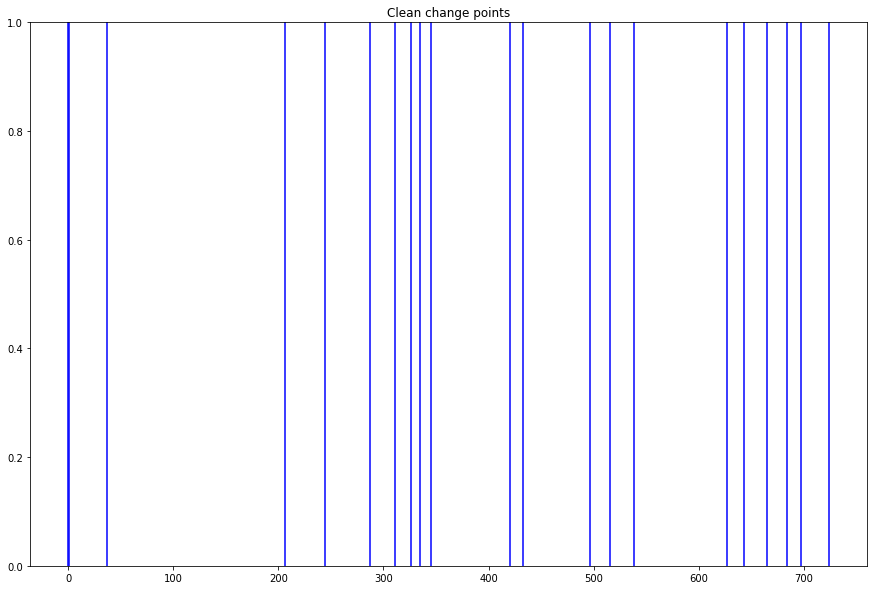

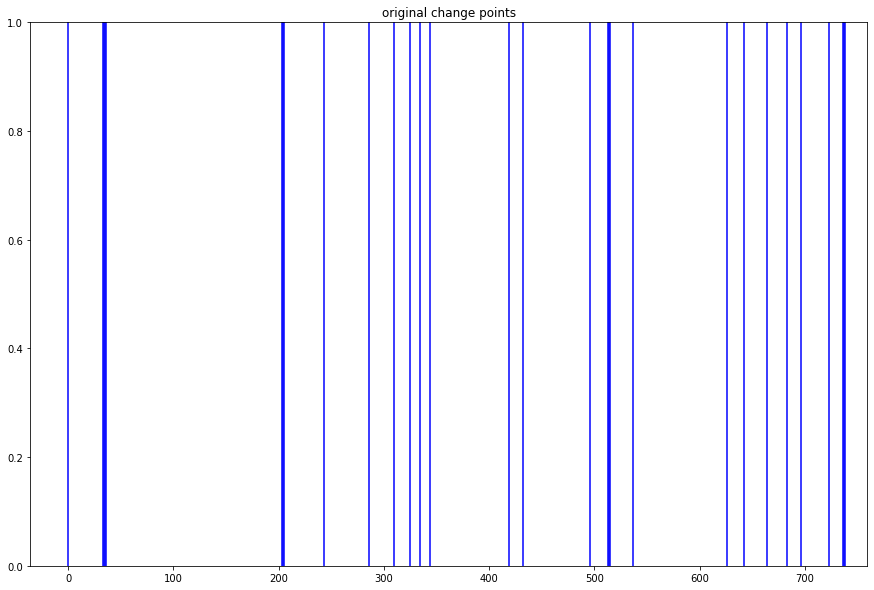

Video -  37


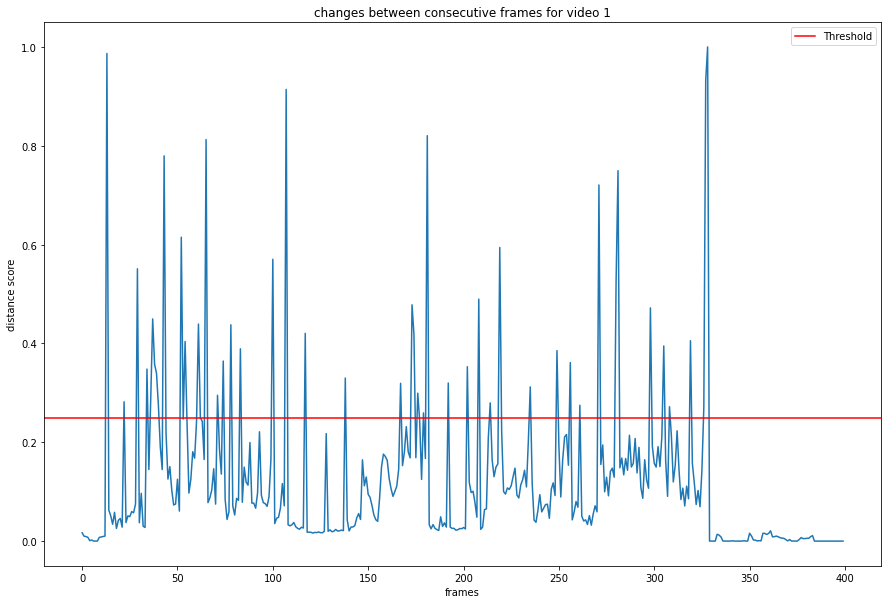

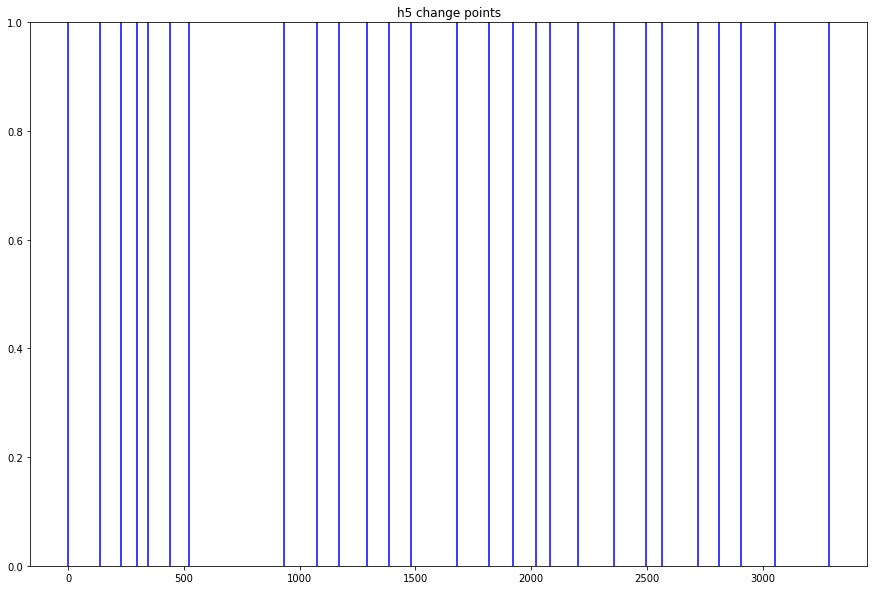

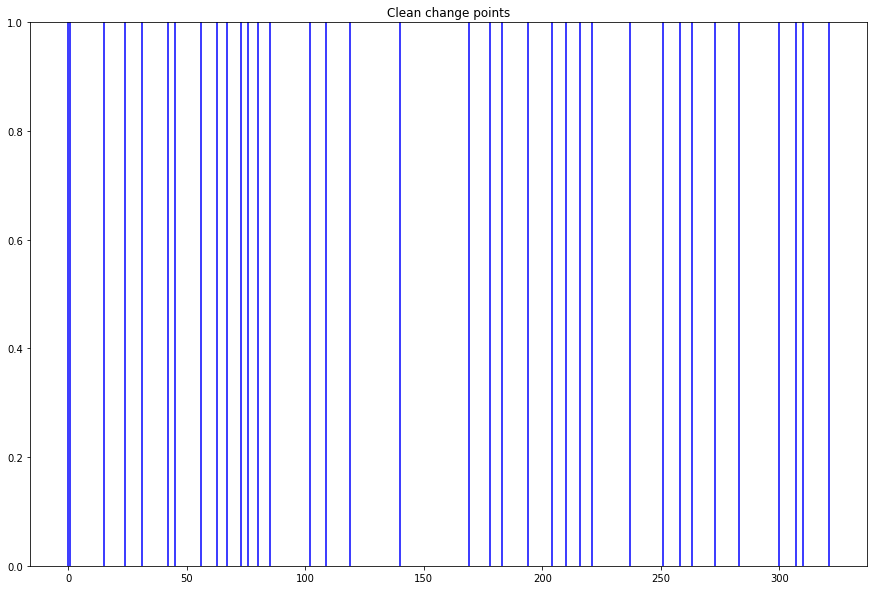

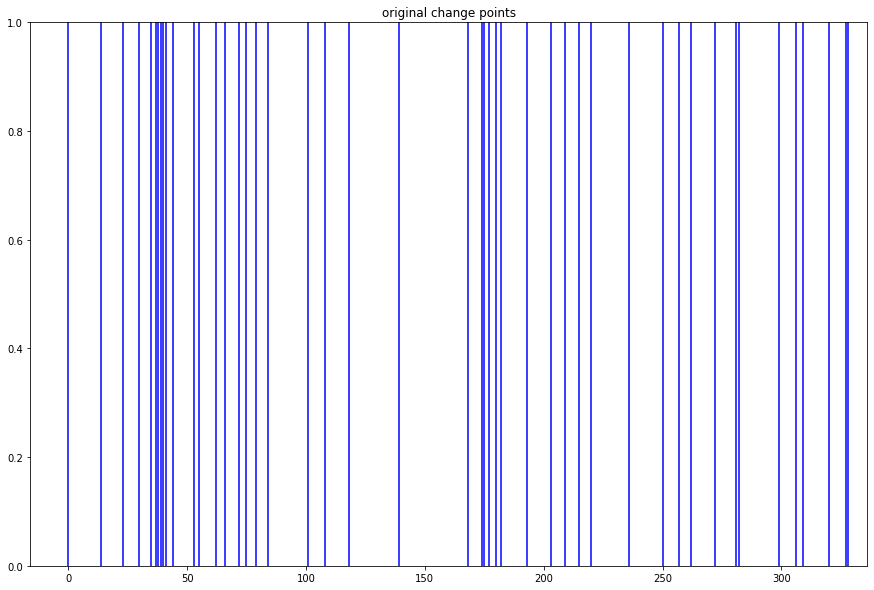

Video -  38


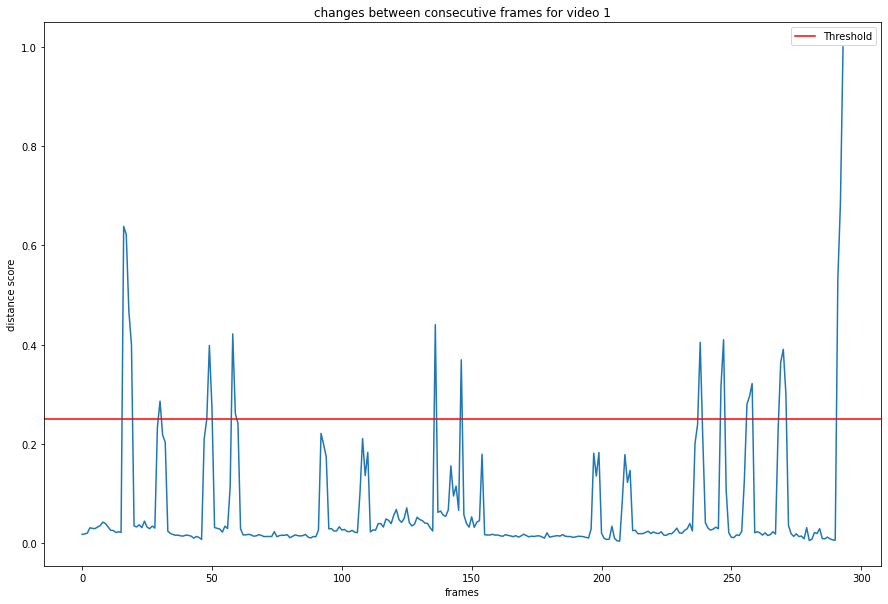

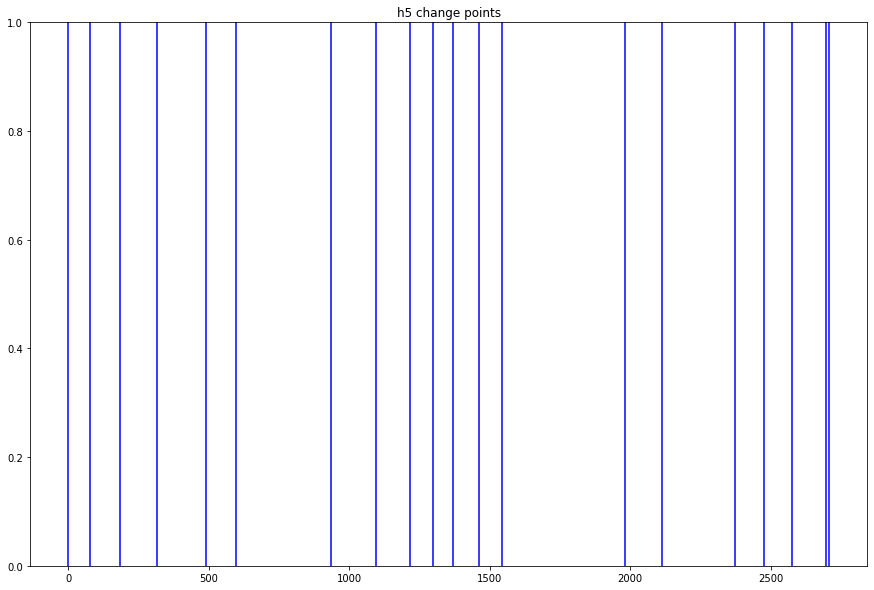

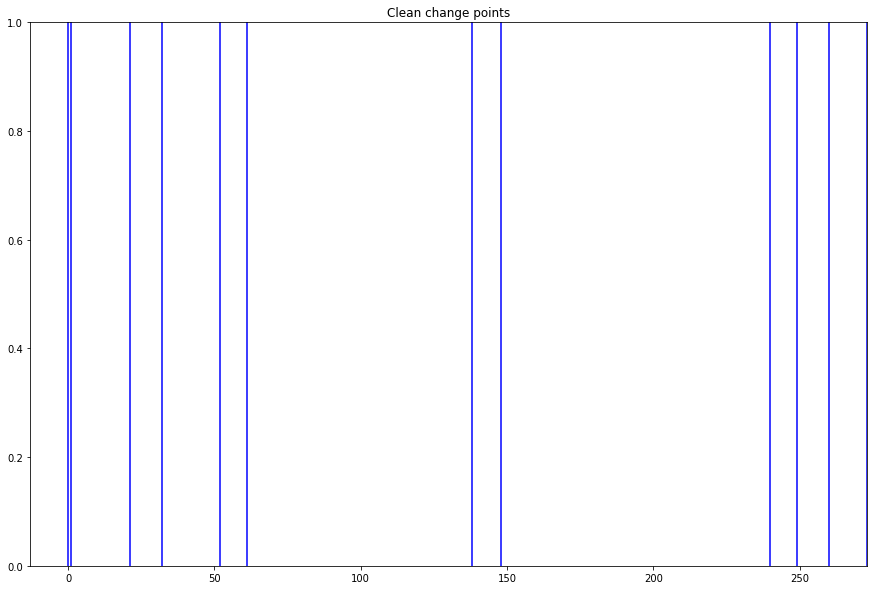

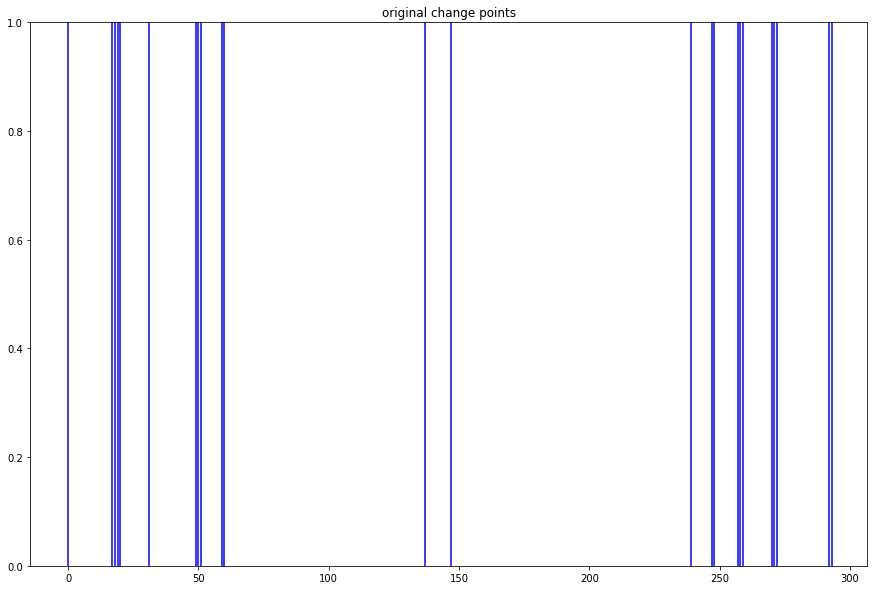

Video -  39


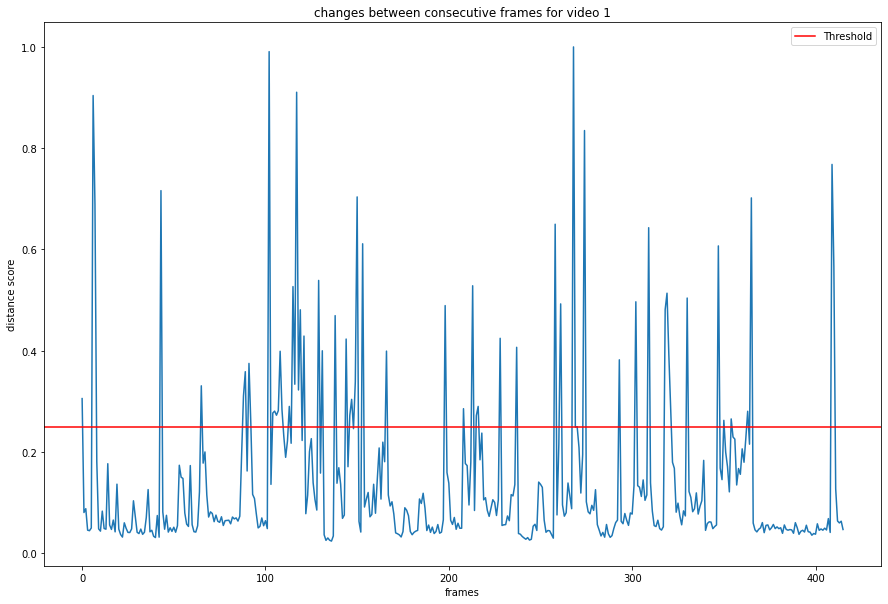

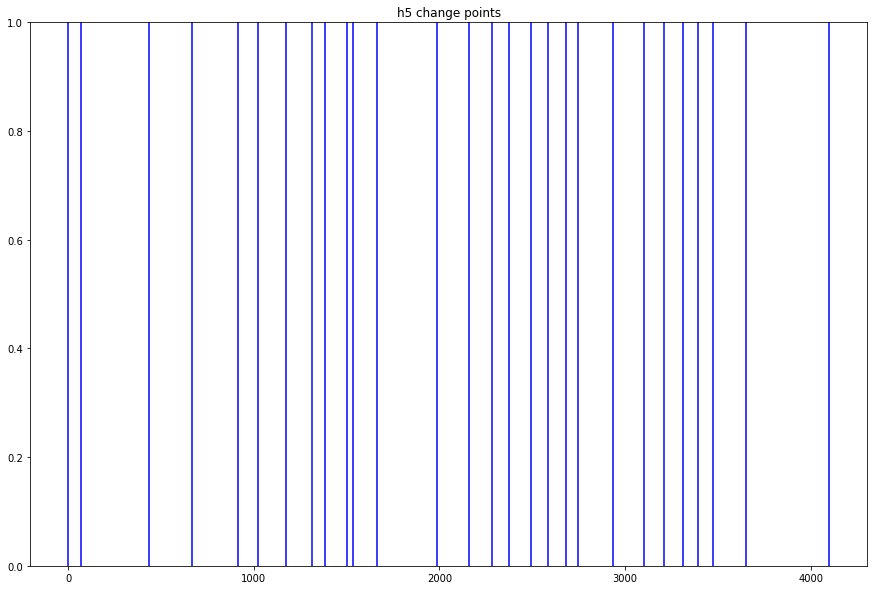

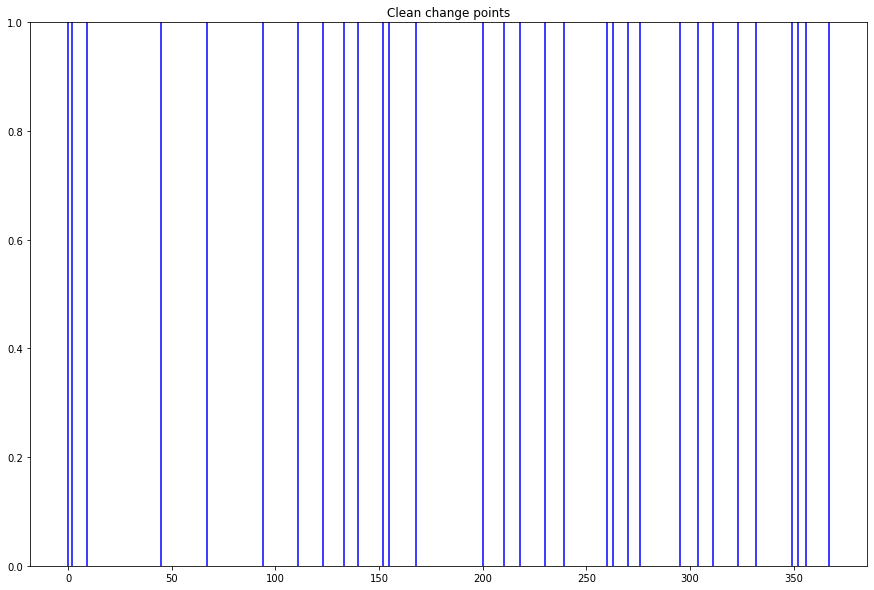

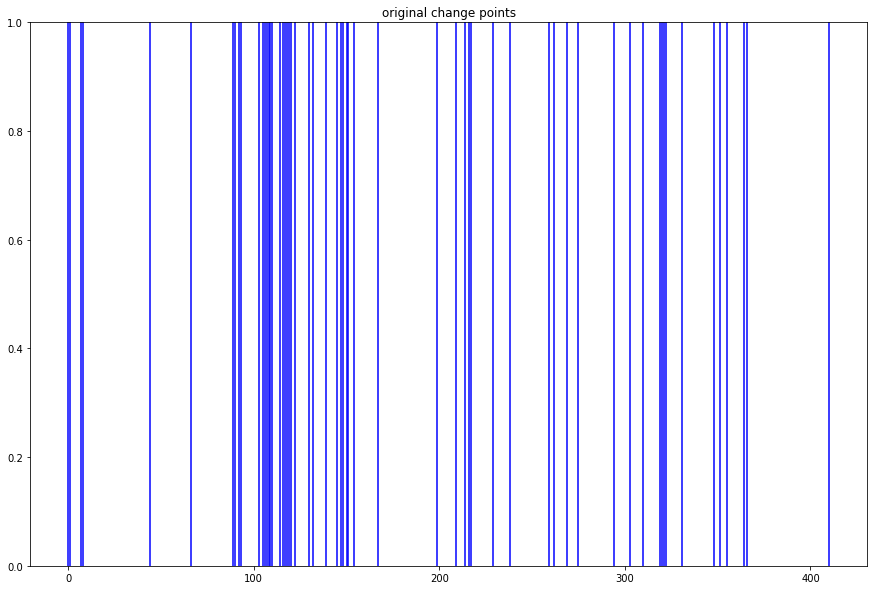

Video -  40


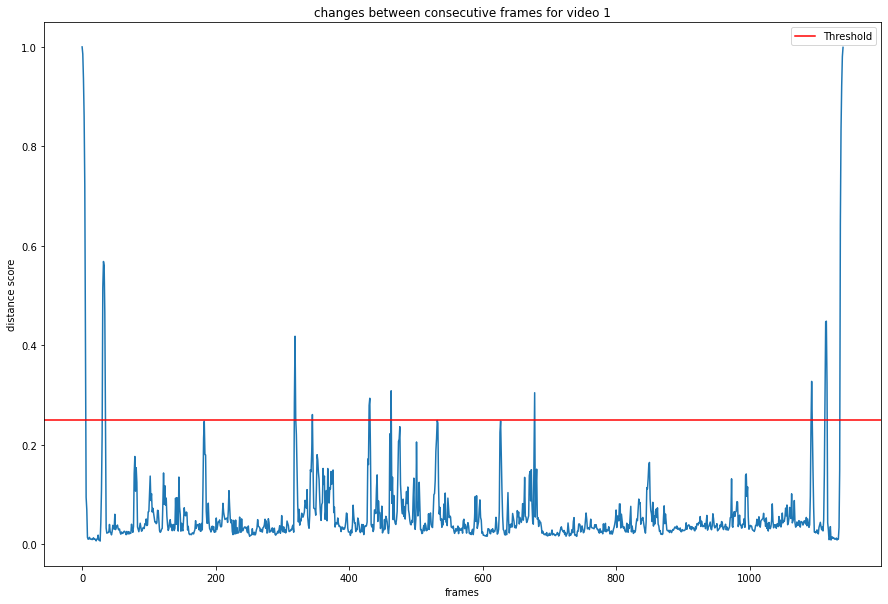

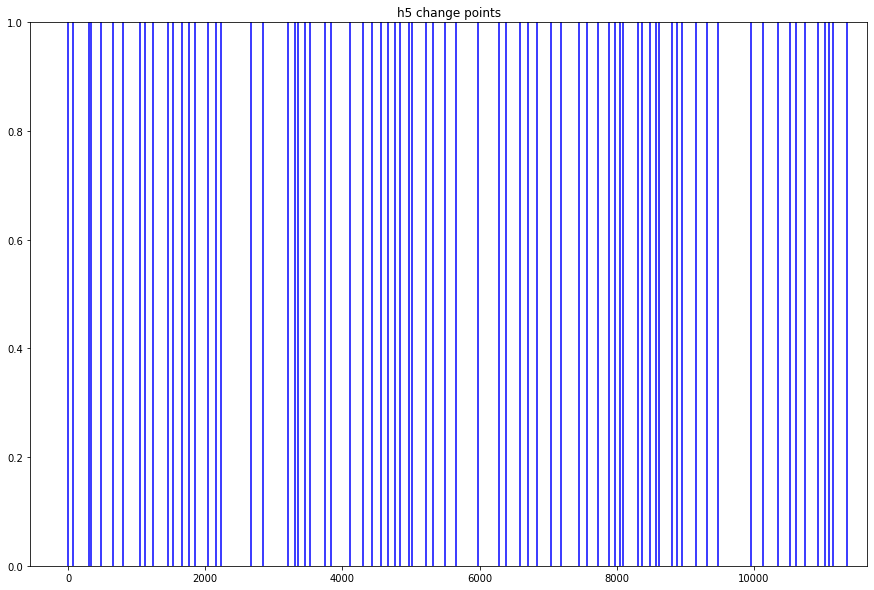

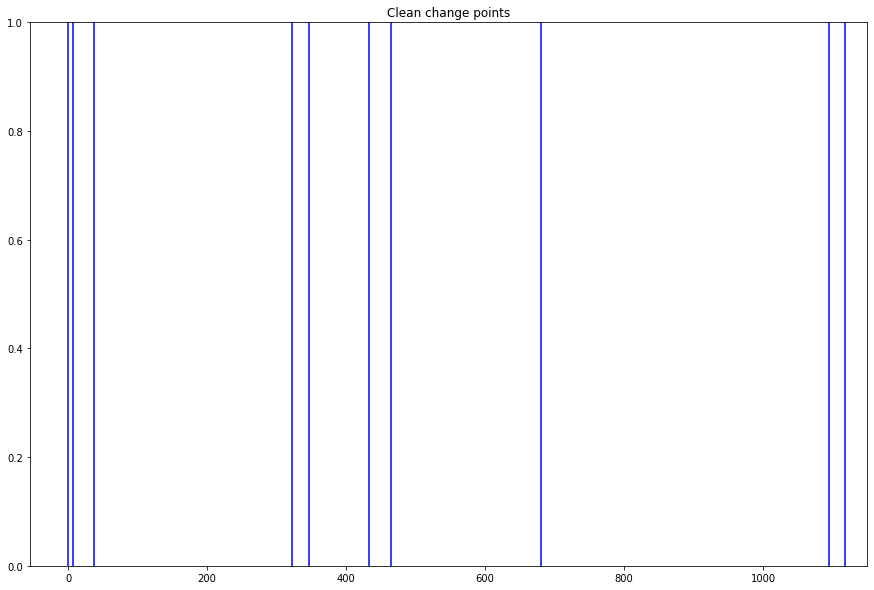

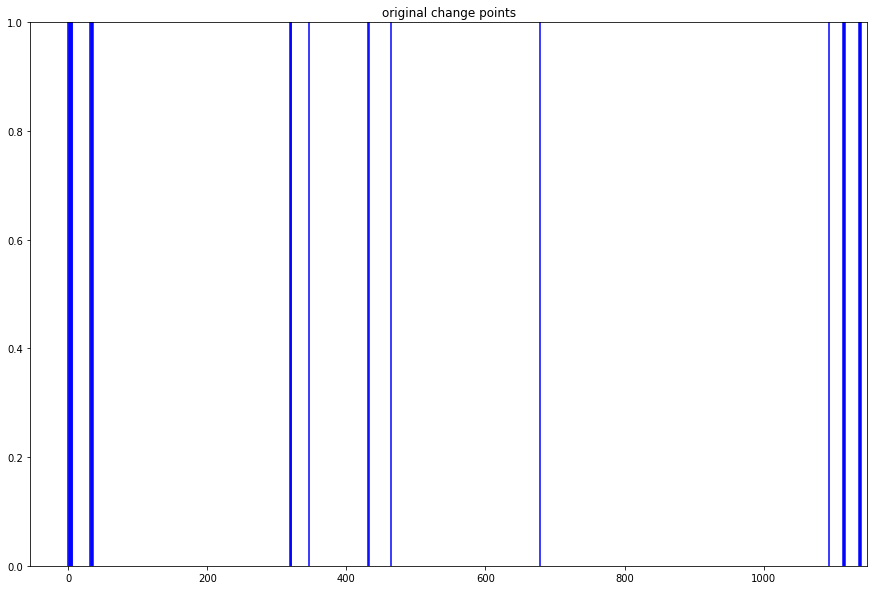

Video -  41


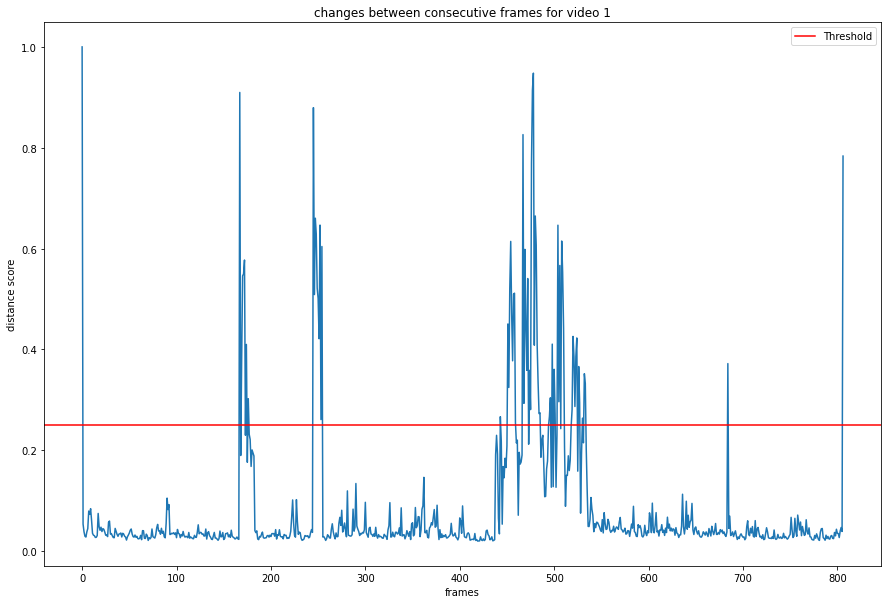

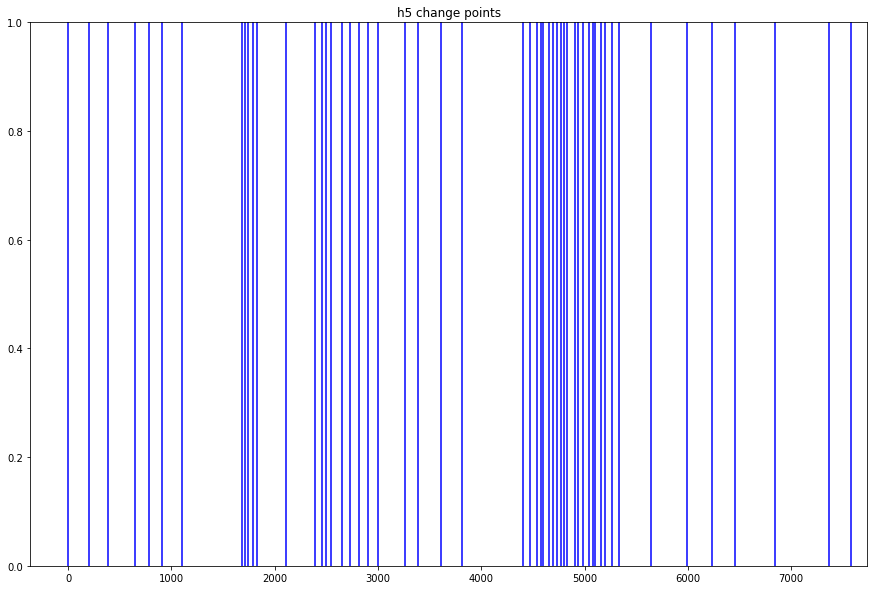

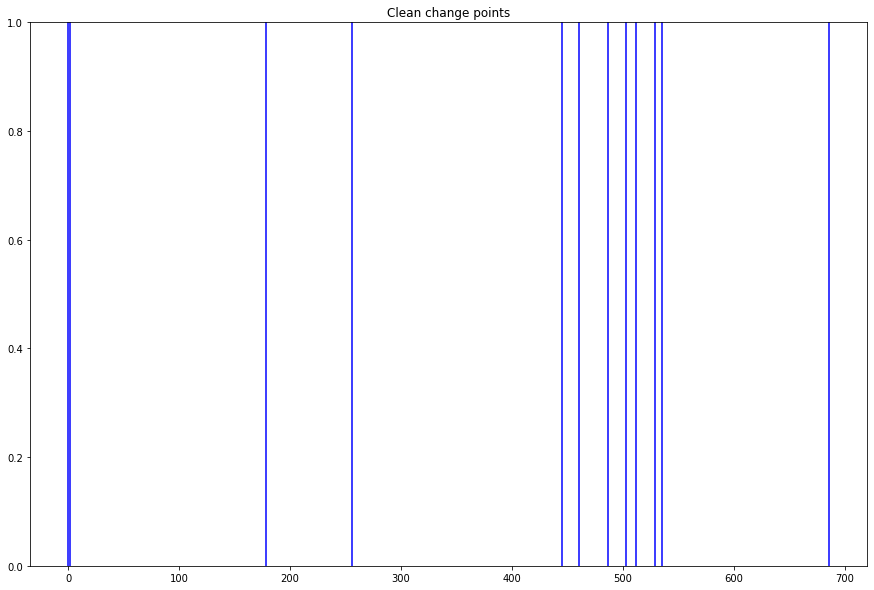

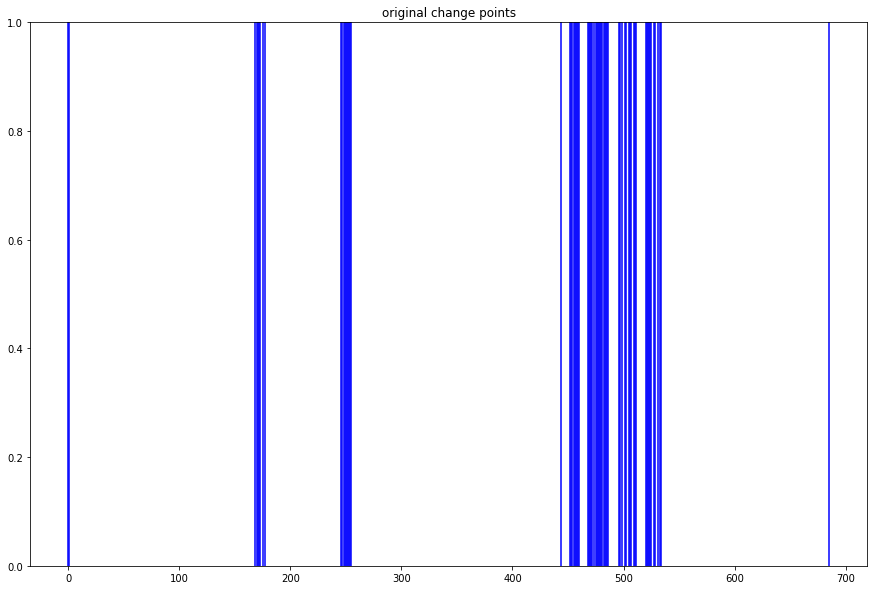

Video -  42


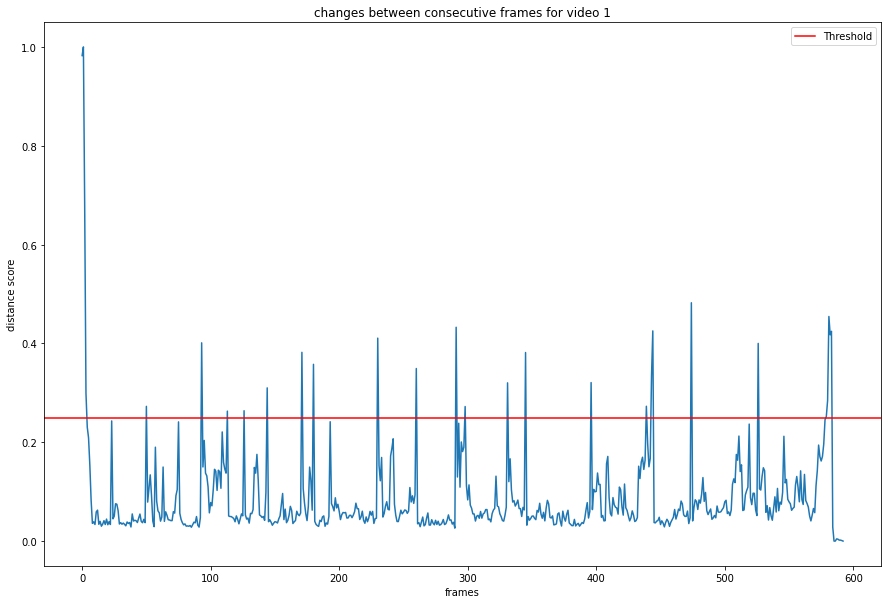

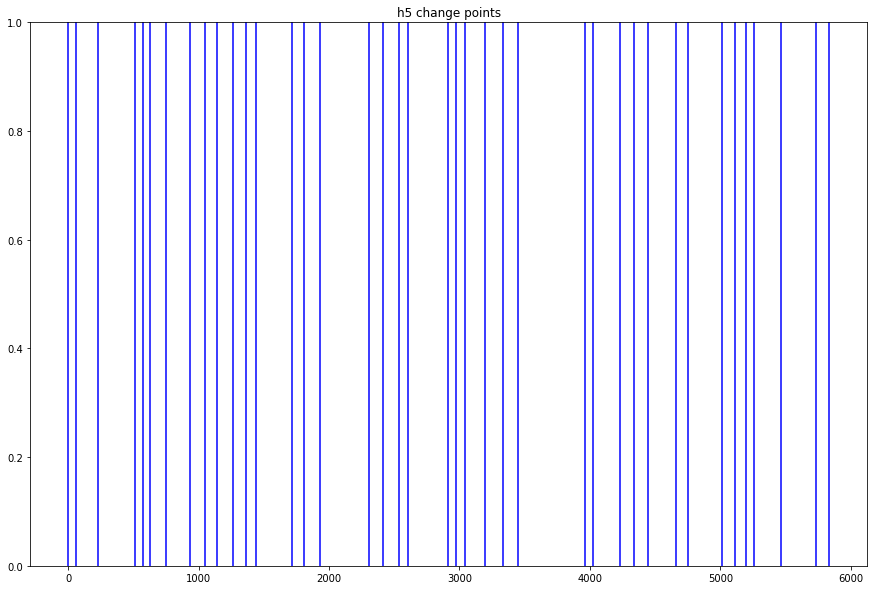

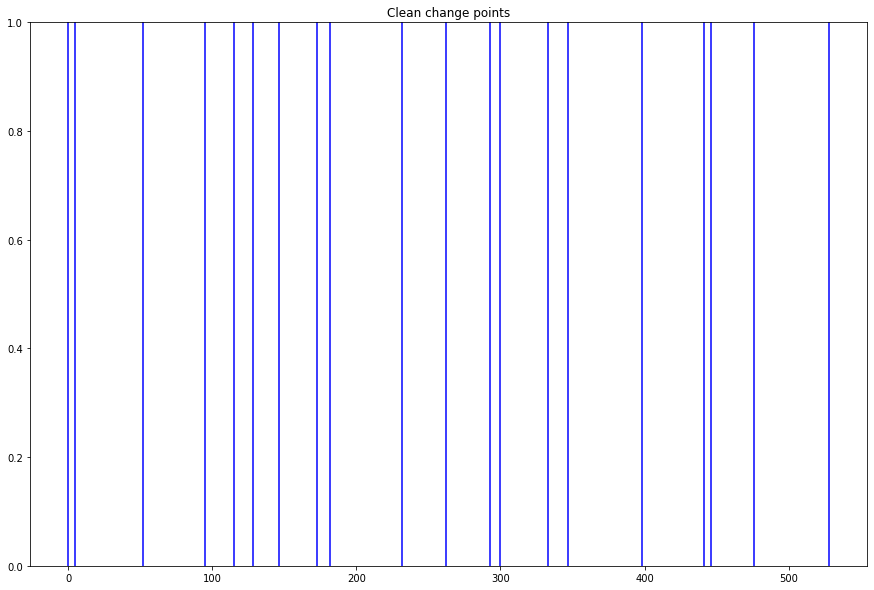

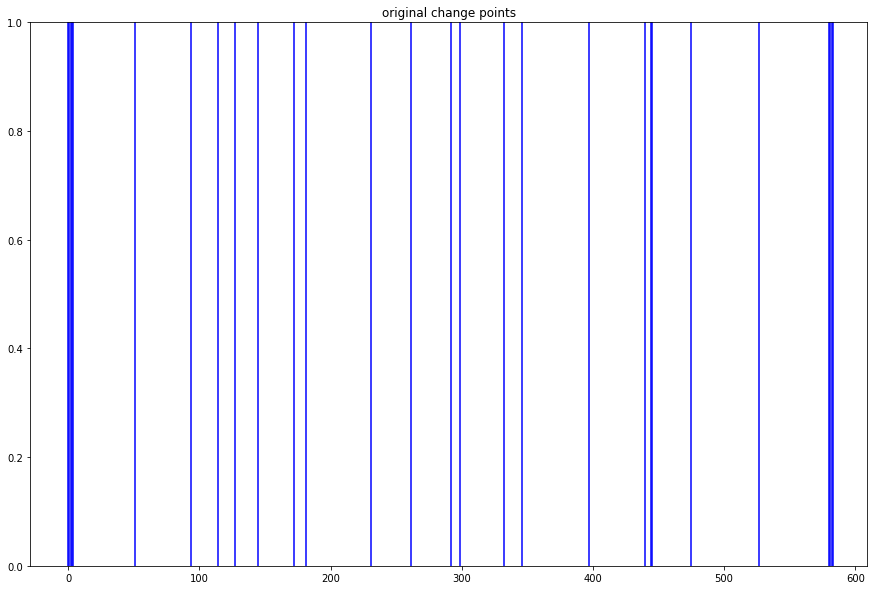

Video -  43


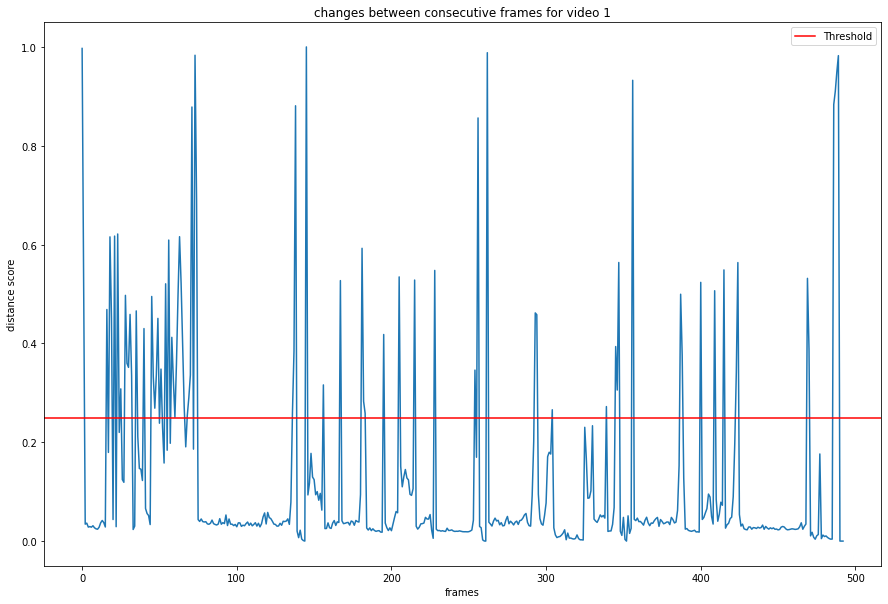

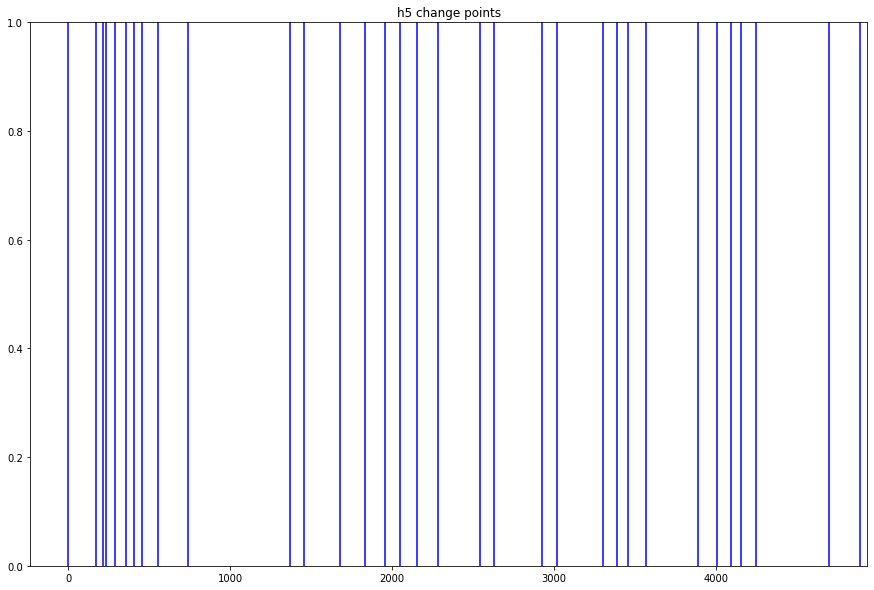

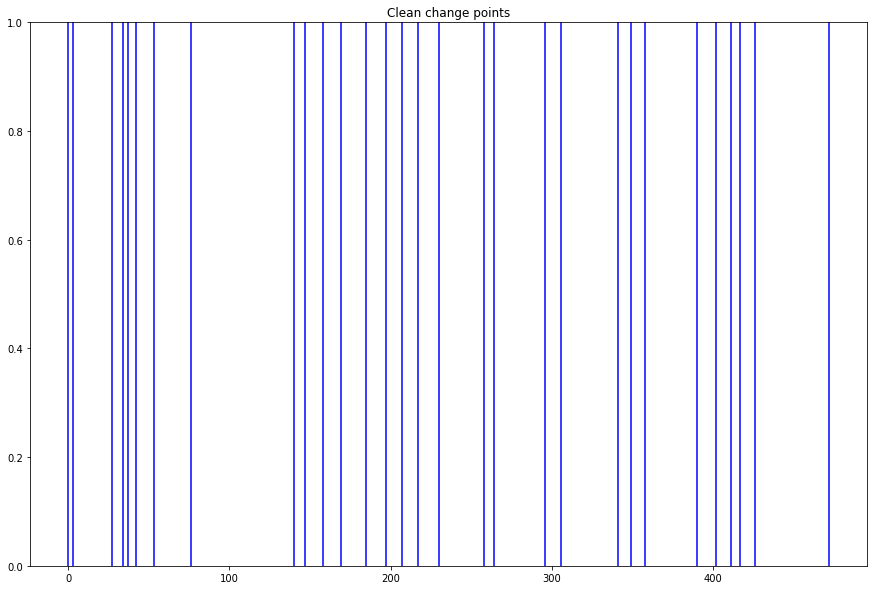

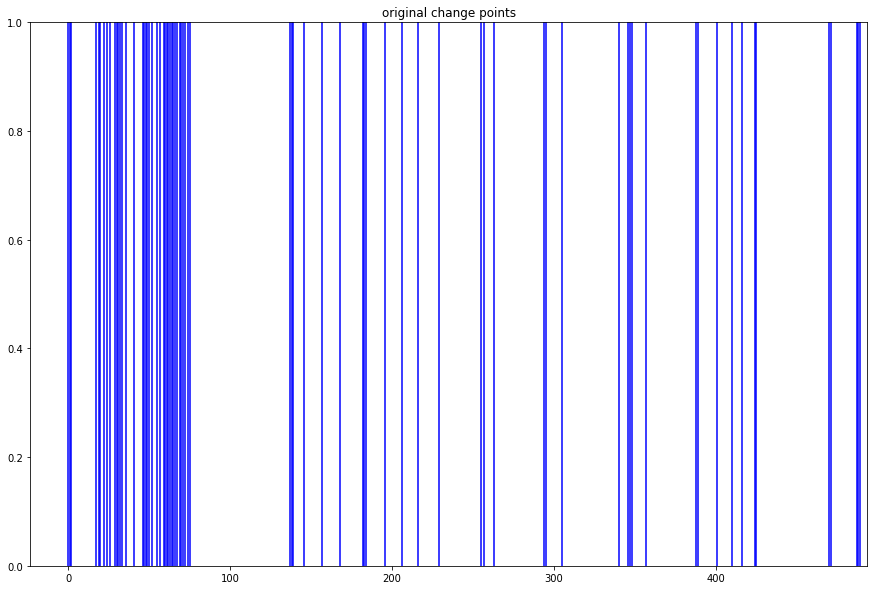

Video -  44


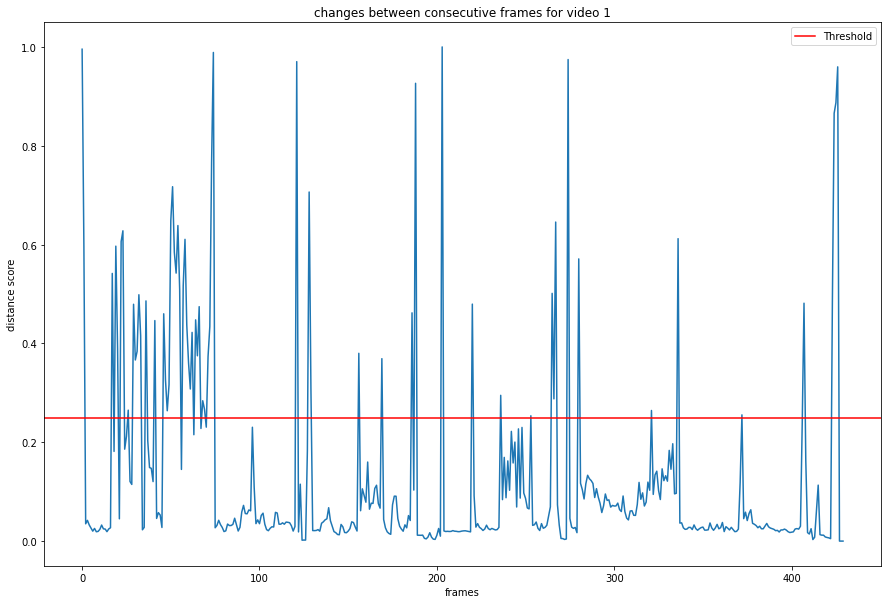

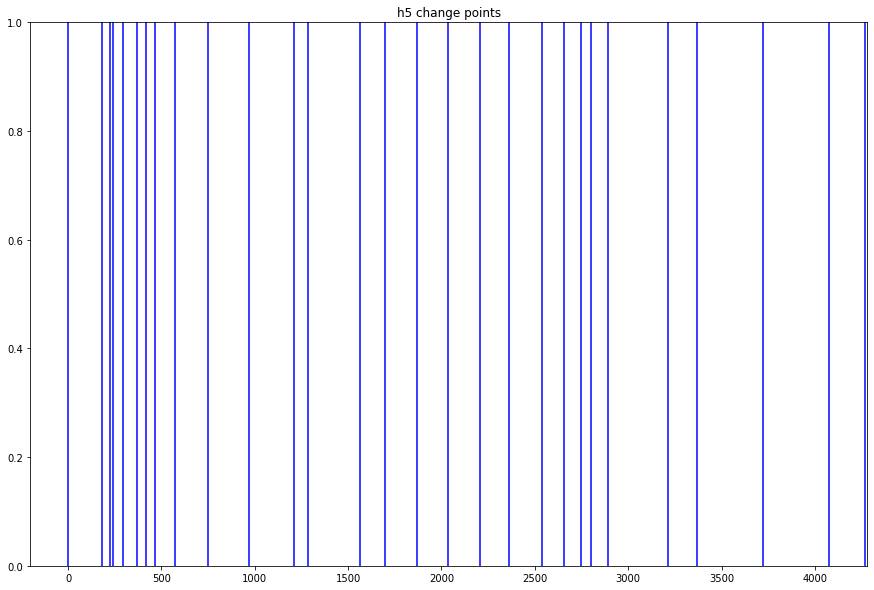

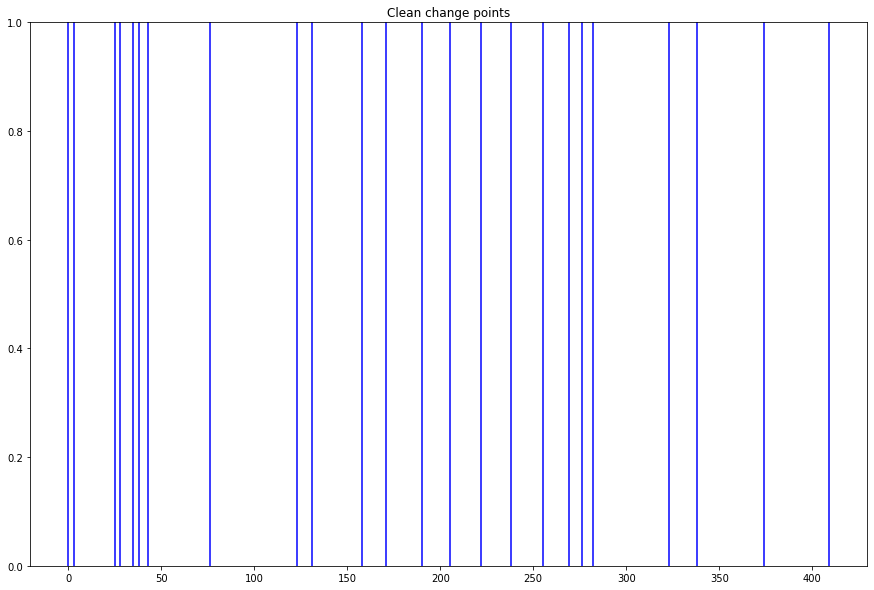

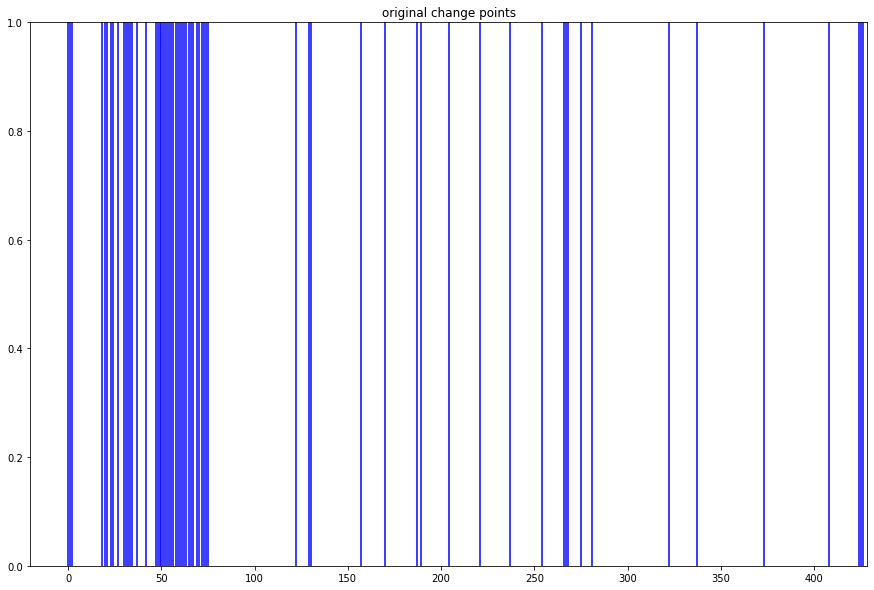

Video -  45


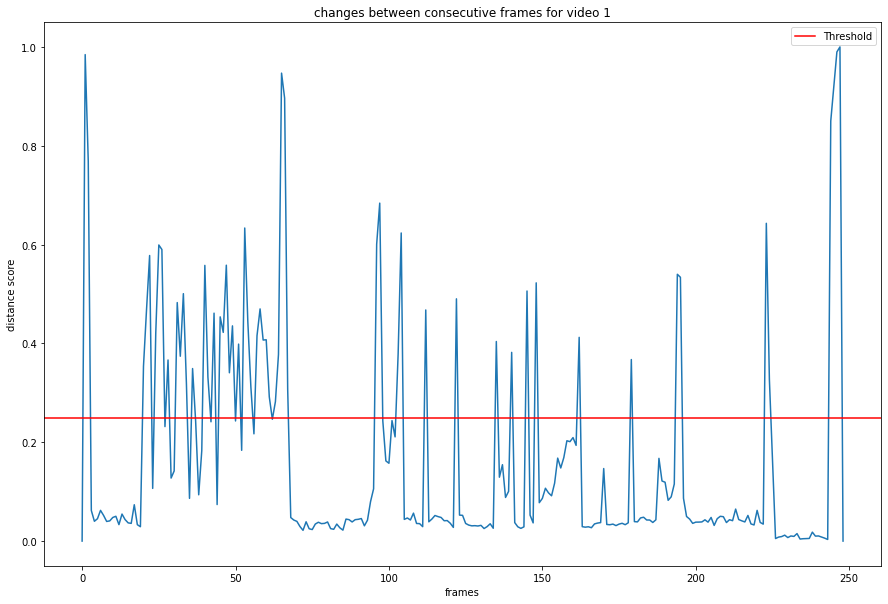

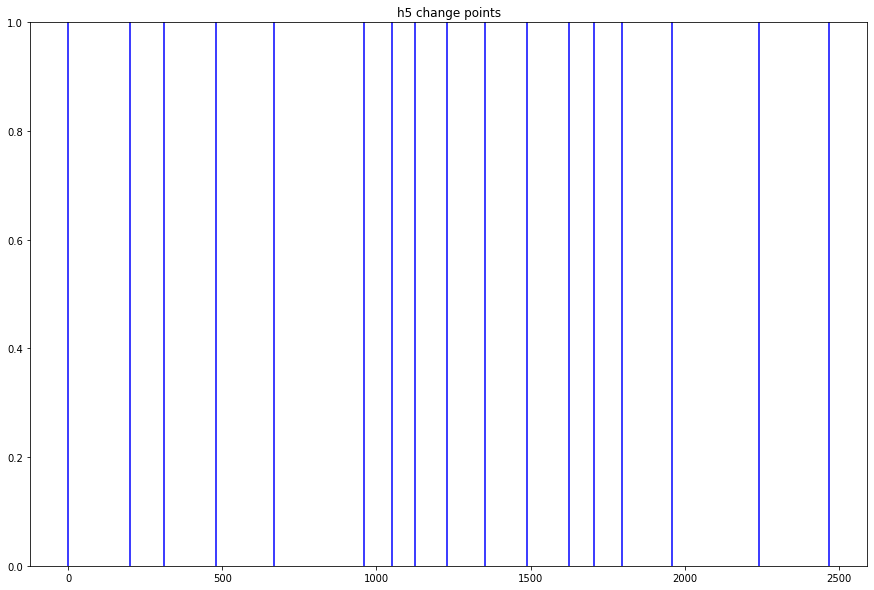

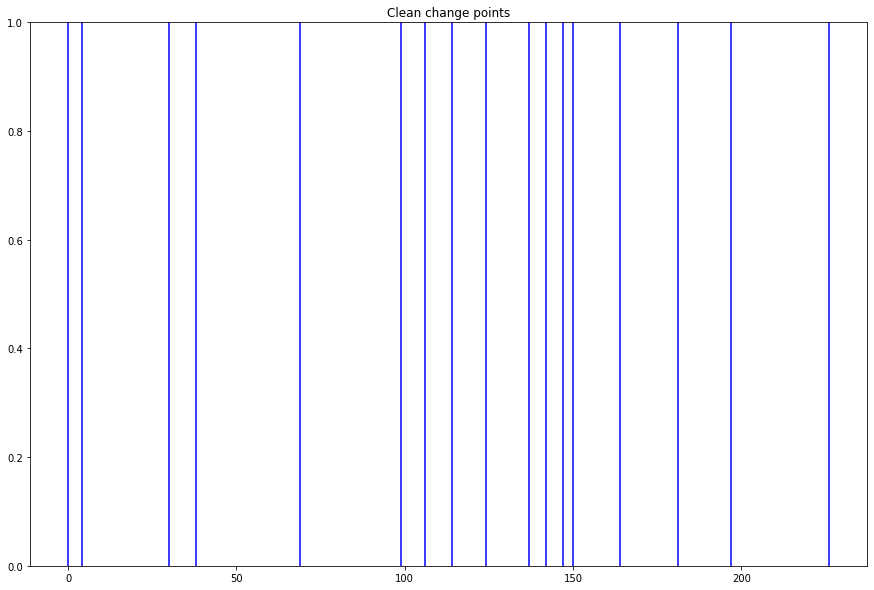

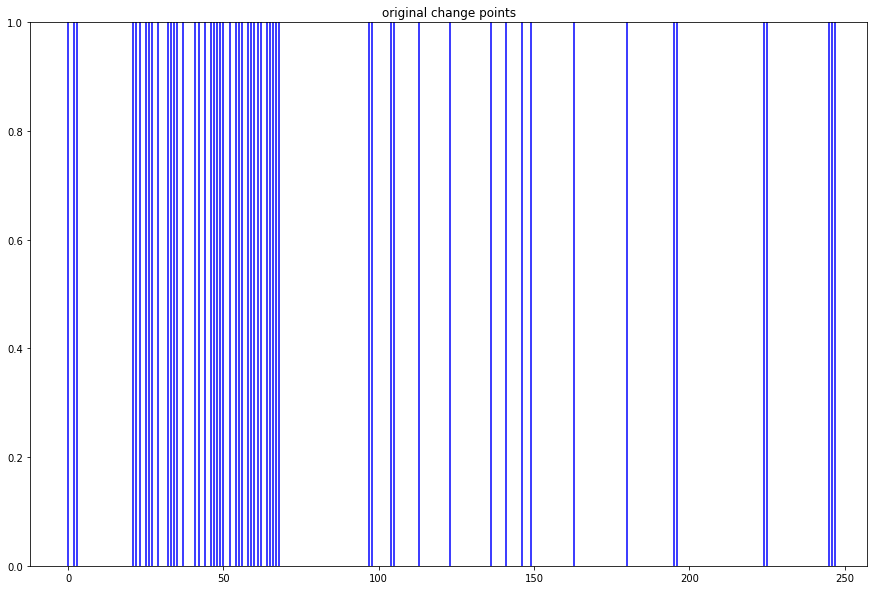

Video -  46


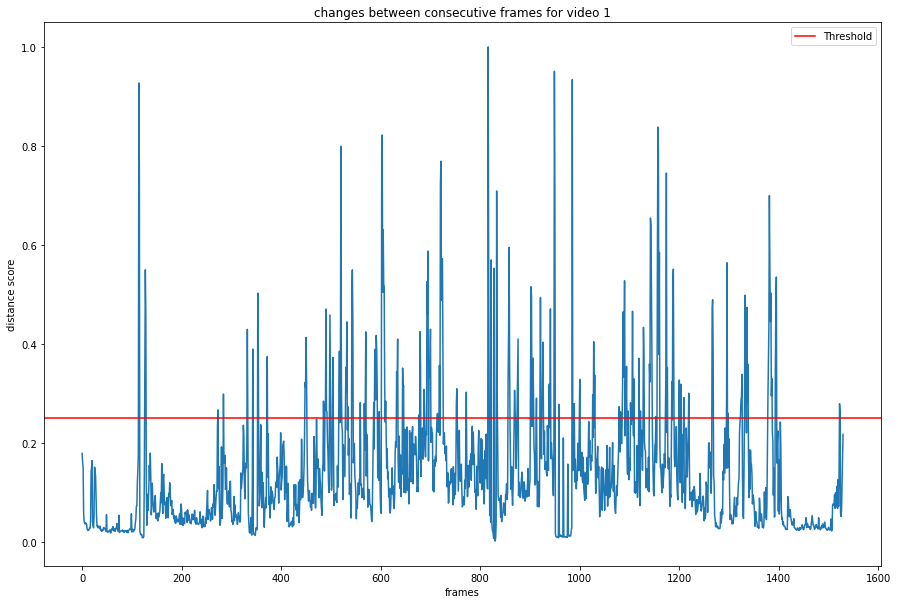

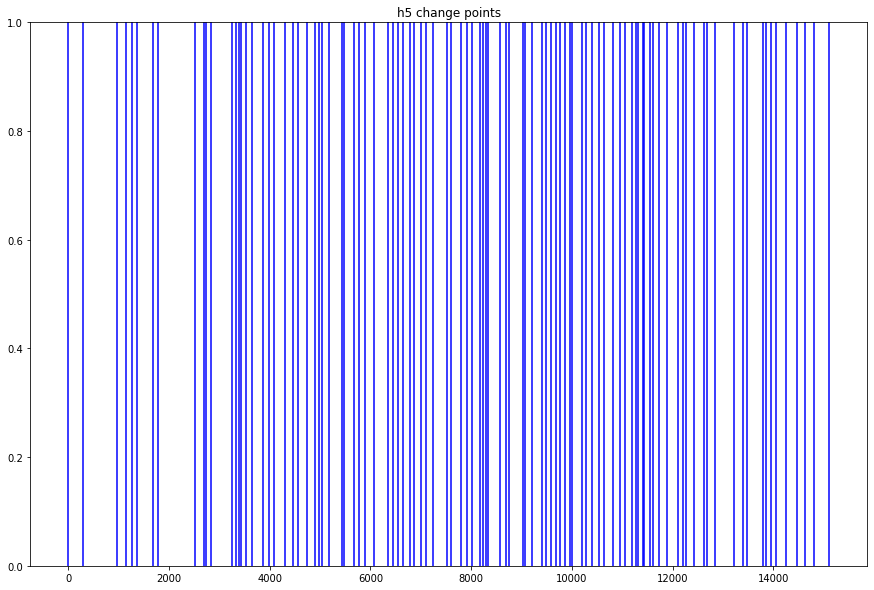

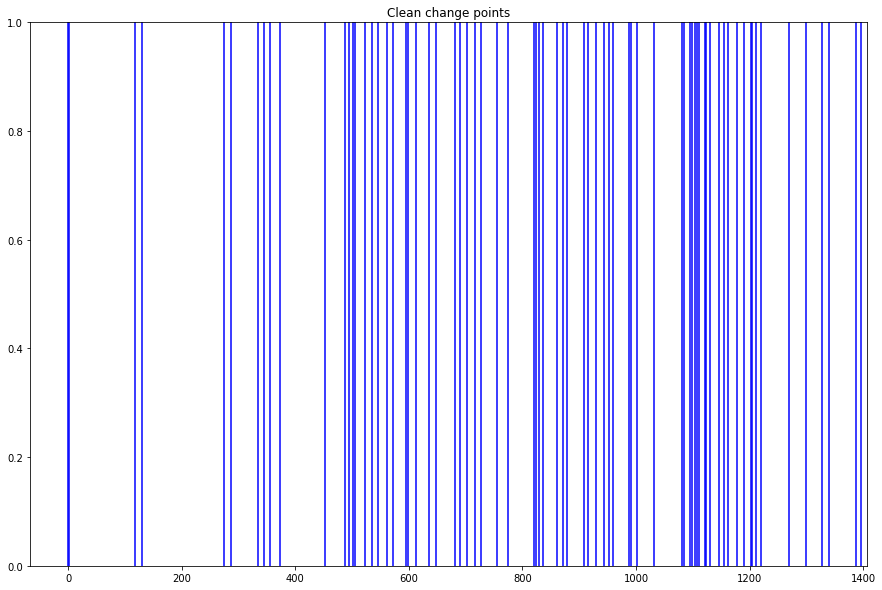

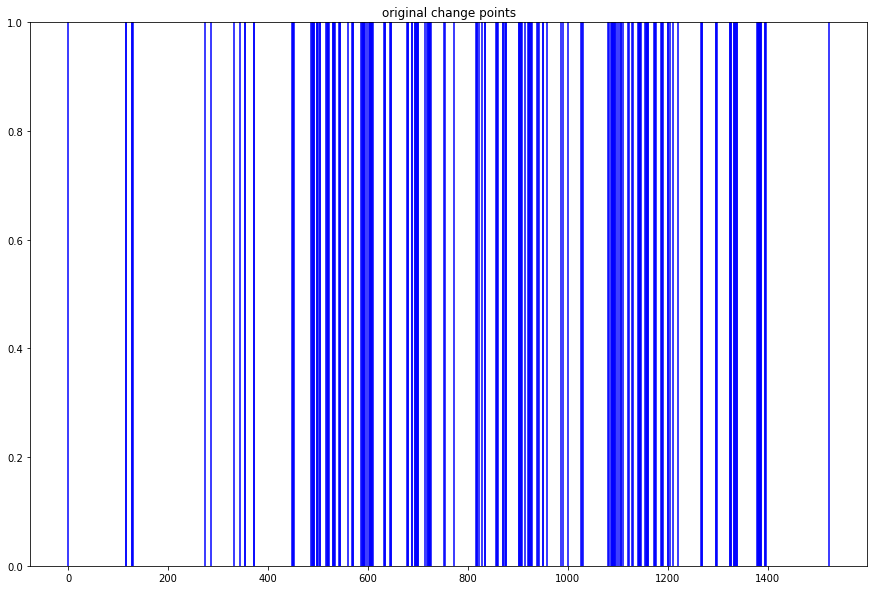

Video -  47


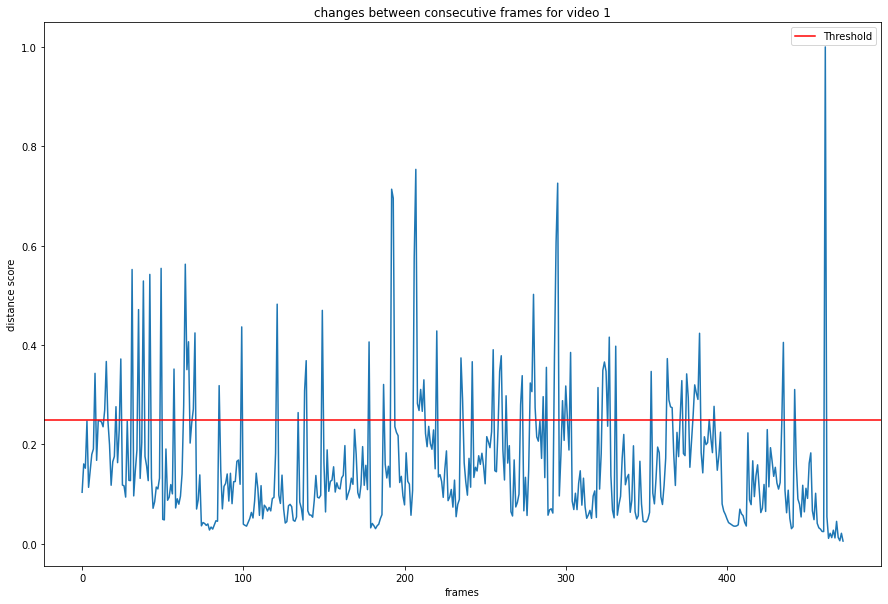

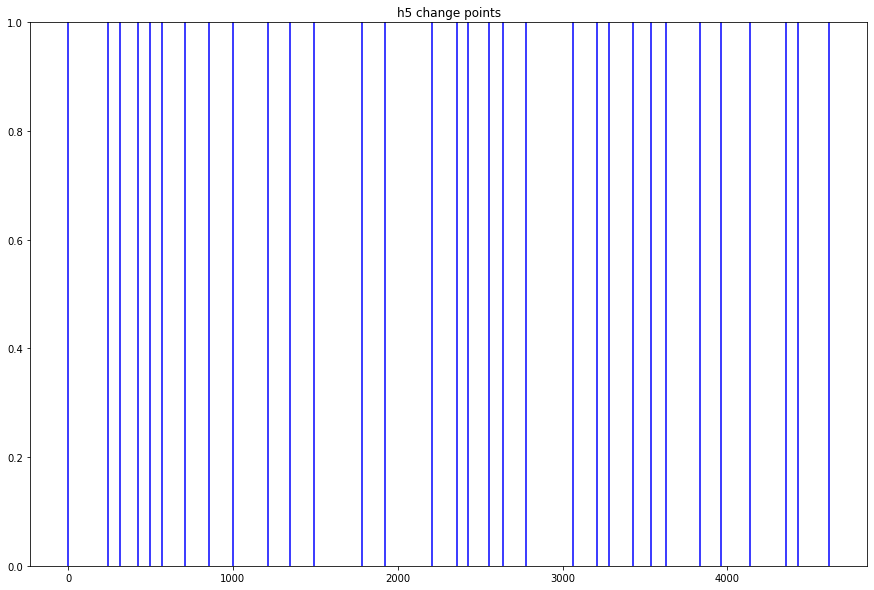

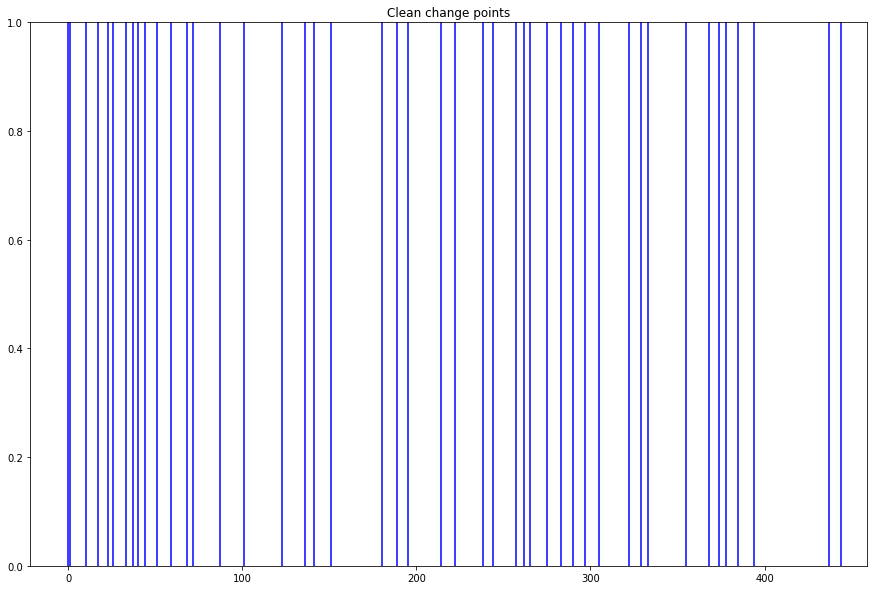

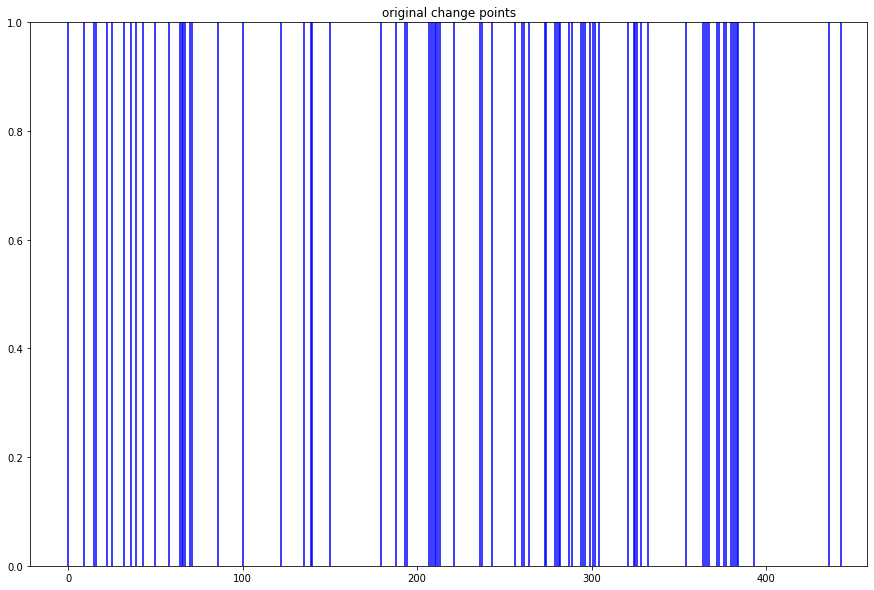

Video -  48


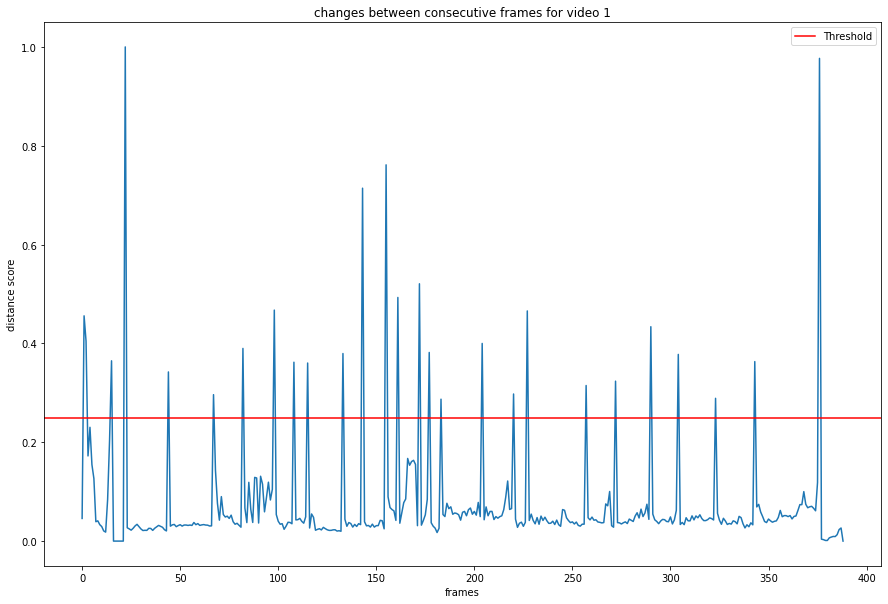

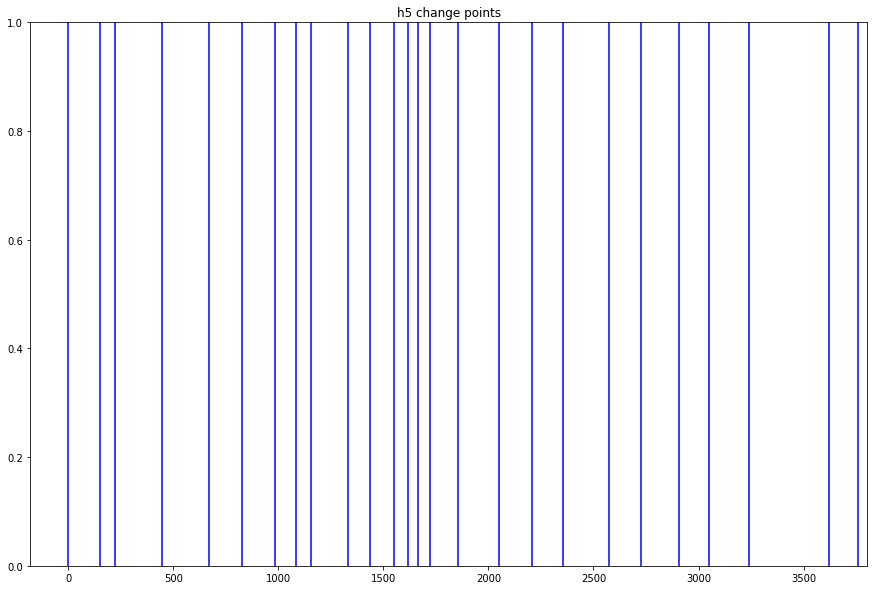

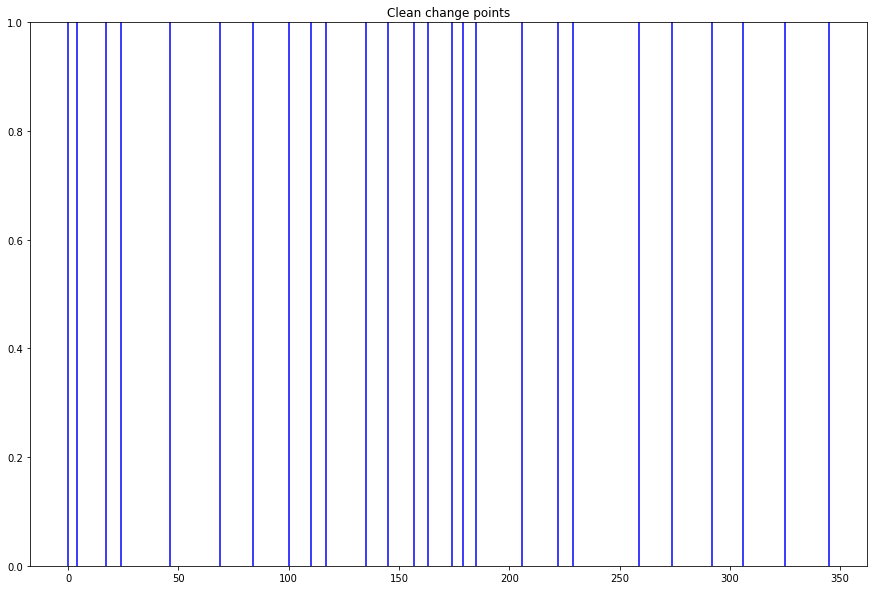

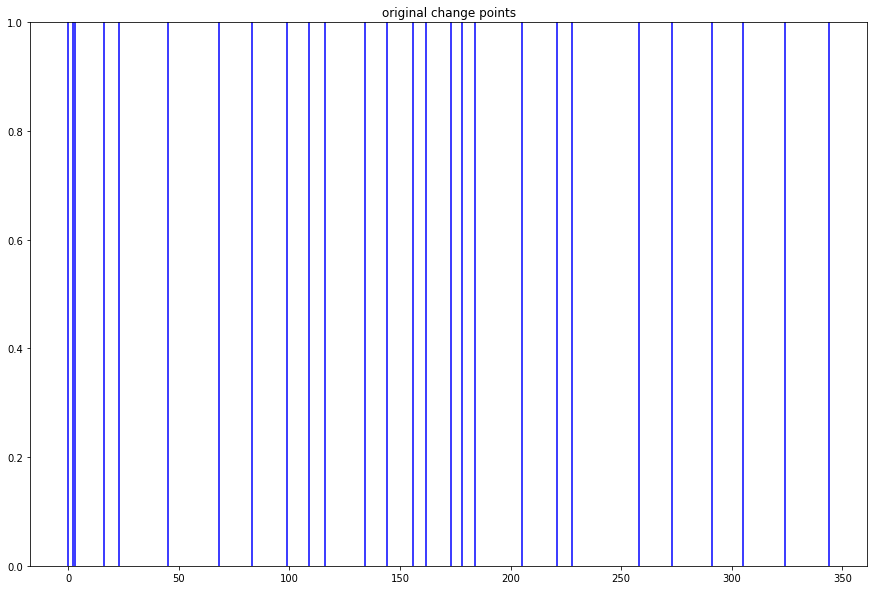

Video -  49


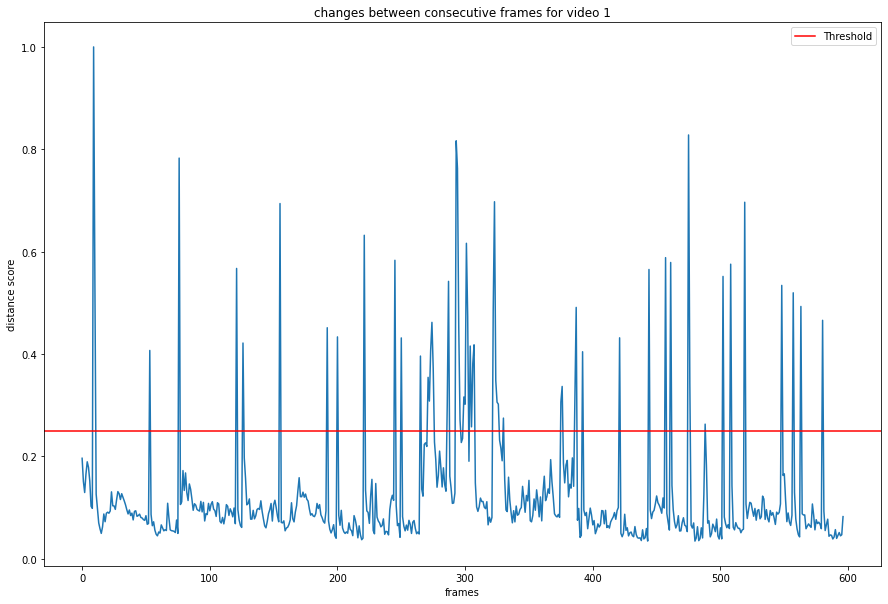

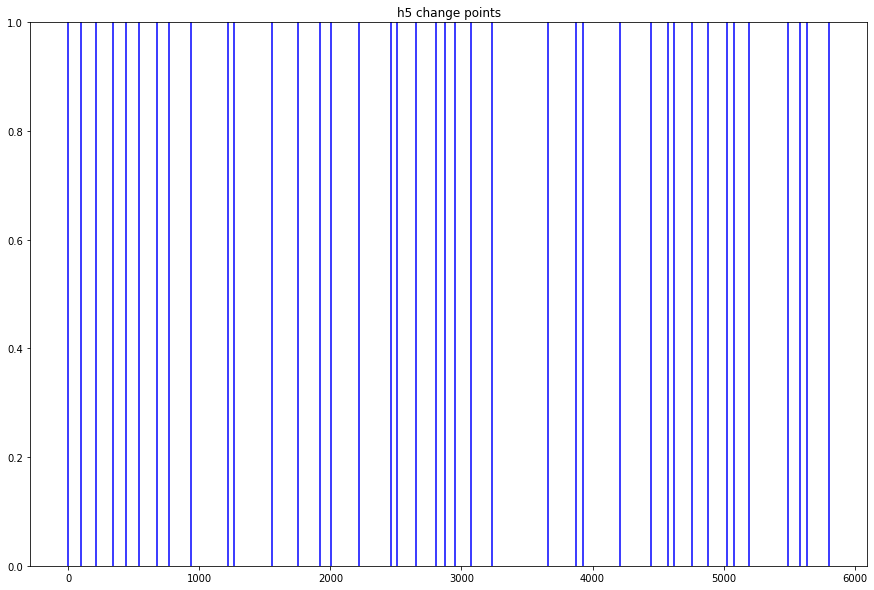

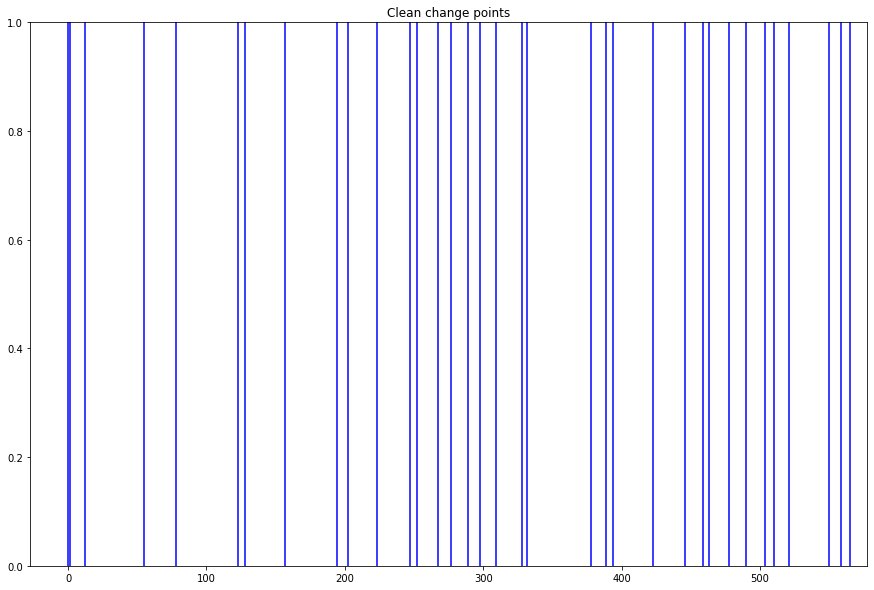

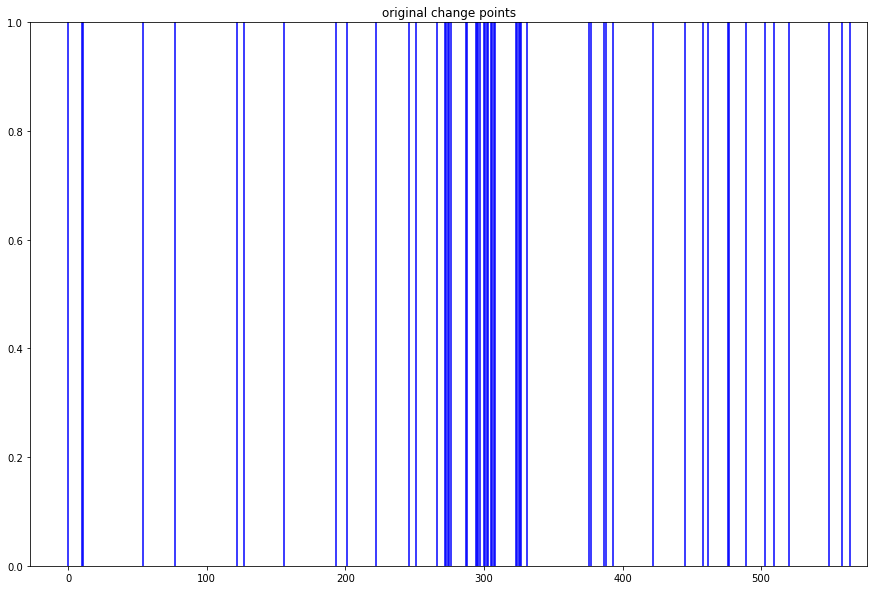

Video -  50


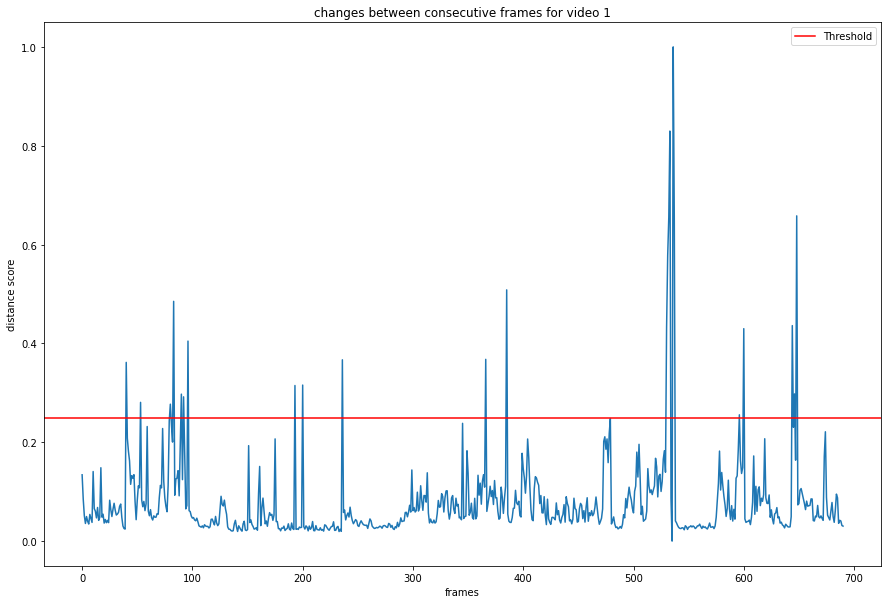

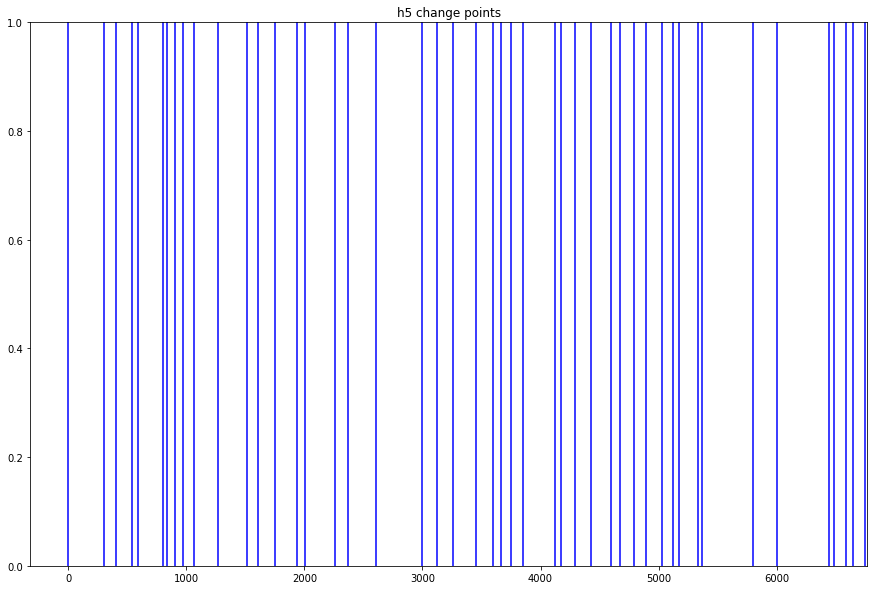

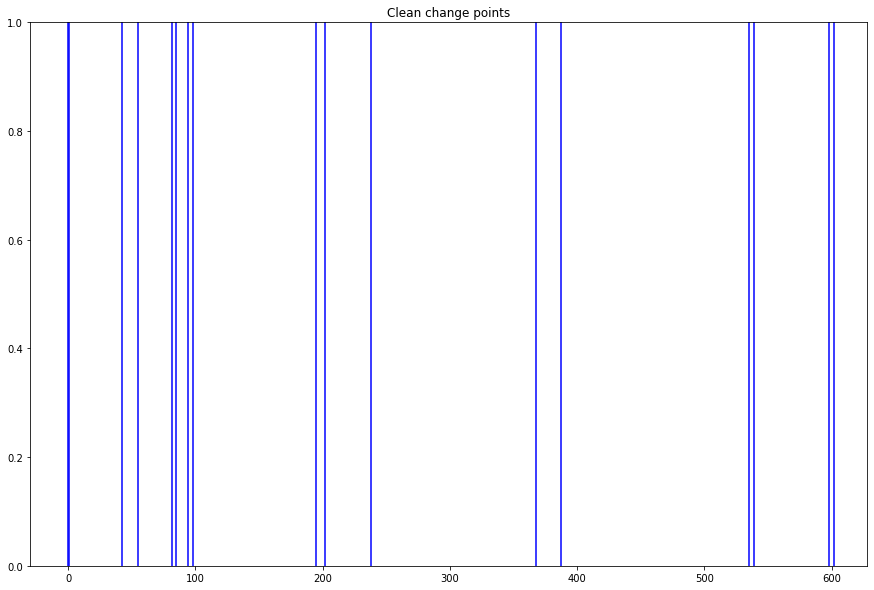

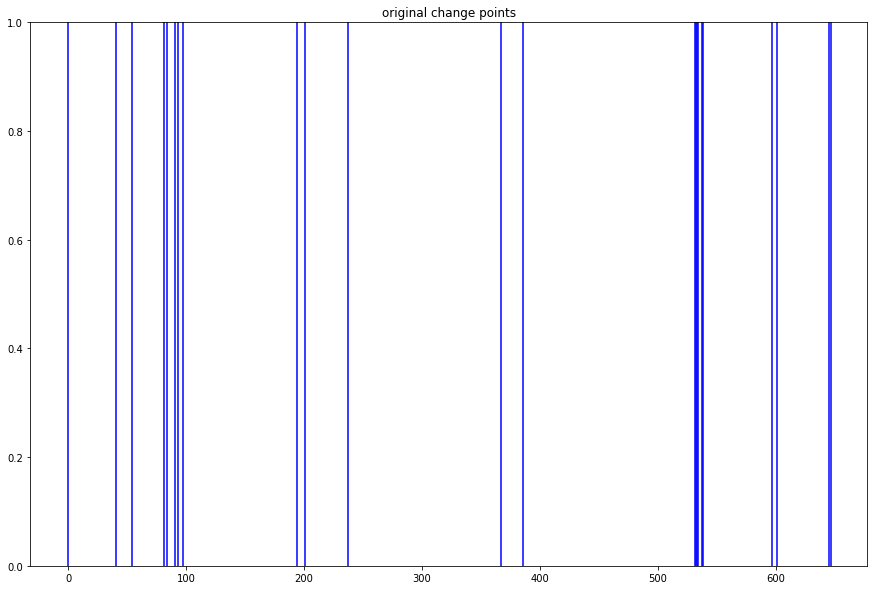

In [ ]:
for i in range(1,51):
  # get change points
  print("Video - ",i)
  metric_vals,segments0 = final(str(i)+'.mp4',frame_rate = 10)
  
  # re-adjusting the change points according to frame_rate
  for w in segments0:
    for j in w:
      j = j*10

  # plotting the original change points from h5 file
  h5_change = change_points[i-1]
  for m in h5_change:
    plt.title("h5 change points")
    plt.rcParams["figure.figsize"] = (15,10)
    plt.axvline(x = m[0], color = 'b')
  plt.show()

  # clean the segments
  z =[]
  for w in segments0:
    for j in w:
      z.append(j)
  n = 0
  while n < len(z)-1:
      if z[n+1] - z[n] <= 1:
        del z[n]
      else:
          n = n+1
  clean_segments = create_segments(z)

  # plot the clean change_points
  for m in clean_segments:
    plt.title("Clean change points")
    plt.rcParams["figure.figsize"] = (15,10)
    plt.axvline(x = m[0], color = 'b')
  plt.show()

  #plot the original change points
  for q in segments0:
    plt.title("original change points")
    plt.rcParams["figure.figsize"] = (15,10)
    plt.axvline(x = q[0], color = 'b')
  plt.show()

  #compare results
  #print("score - clean and h5",evaluate(h5_change,clean_segments))
  #print("score - original and h5",evaluate(h5_change,segments0))

In [ ]:
def plot_change_points(change_points, c = 'b'):
  plt.rcParams["figure.figsize"] = (15,10)
  plt.xlim(0,50)
  for i in change_points:
    plt.axvline(x = i[0], color = c)
  plt.show()

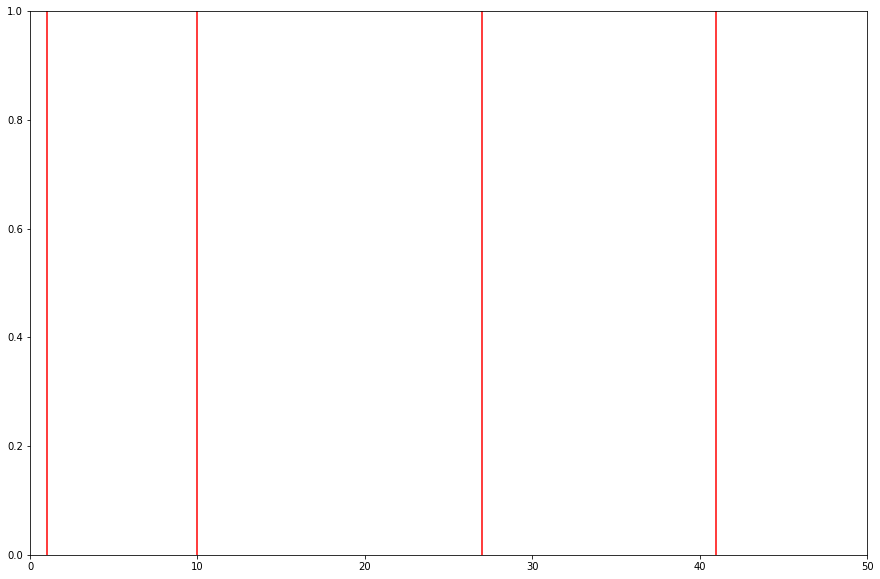

In [ ]:
plot_change_points([[1,9],[10,26],[27,40],[41,49]], c = 'r')

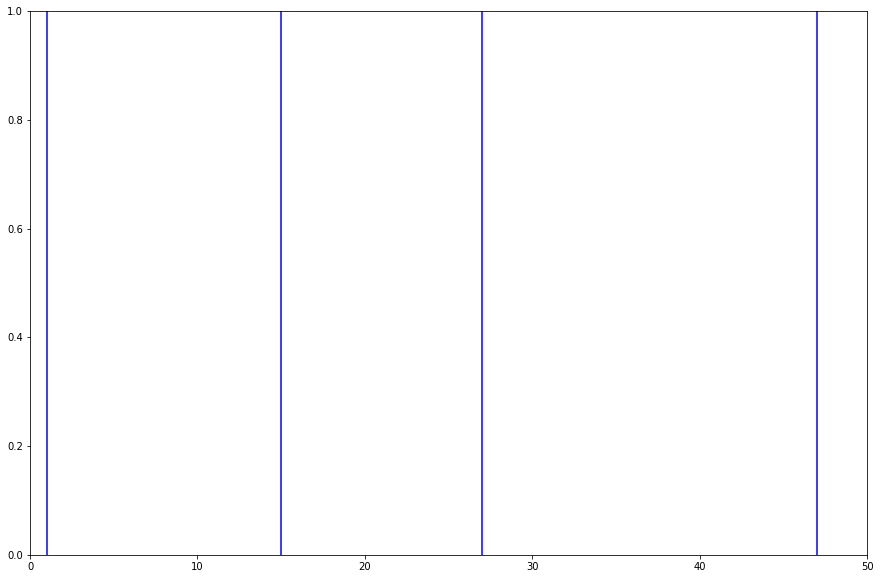

In [ ]:
plot_change_points([[1,14],[15,26],[27,46],[47,49]])

## Final